<h1 align = "center"><b>CHAPSTONE PROJECT III</b></h1><br>
<h1 align = "center"><b>TELCO CUSTOMER CHURN</b></h1><br>

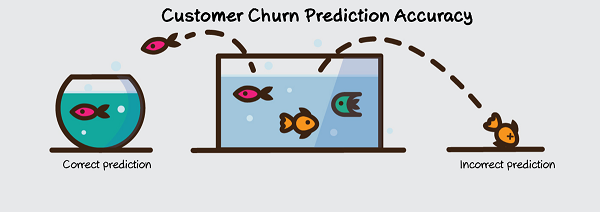

<a id="no_ened"></a>

<h1 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">FOR BETTER EXPERIENCE</h1>

***Please run cell code below***

In [1]:
# relax, this won't hurt
import pandas as pd

# larger cell code
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# show all columns on pandas dataframe
pd.set_option("display.max_columns", None)

# show all value in columns, wider columns
pd.set_option("max_colwidth", 0)

***Notes***
* Hyperlink that I made might not work well with several nbextension like `table of content`
* Others might also causing the issue, but I think uncheck only `table of content` will resolve the issue.

<h1 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">TABLE OF CONTENT</h1>

<a id="toc"></a>

[1. BUSINESS PROBLEM UNDERSTANDING](#1)<br><br>
[2. LIBRARY](#2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1. PYTHON LIBRARY](#2.1)<br><br>
[3. DATA UNDERSTANDING](#3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1. FEATURE CHECK](#3.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.2. FEATURE CORRELATION](#3.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.1. NUMERICAL FEATURE WITH TARGET](#3.2.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.2. CATEGORICAL FEATURE WITH TARGET](#3.2.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.3. ALL FEATURE WITH TARGET](#3.2.3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.4. CURRENT CONCLUSION ABOUT OUR DATA](#3.2.4)<br><br>
[4. MACHINE LEARNING](#4)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.1. DATA PREPARATION](#4.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.2. BASE MODEL EVALUATION](#4.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.3. BASE MODEL WITH OVERSAMPLING - SMOTENC](#4.3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.4. BASE MODEL WITH UNDERSAMPLING - RANDOM UNDER SAMPLING](#4.4)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.5. BASE MODEL OUTPUT RECAP](#4.5)<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.6. HYPERPARAMETER TUNING](#4.6)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.6.1. HYPERPARAMETER TUNING - LOGISTIC REGRESSION](#4.6.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.6.2. HYPERPARAMETER TUNING - GRADIENTBOOSTCLASSIFIER](#4.6.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.6.3. HYPERPARAMETER TUNING OUTPUT RECAP](#4.6.3)<br>

&nbsp;&nbsp;&nbsp;&nbsp;[4.7. FEATURE IMPORTANCE & FEATURE SELECTION](#4.7)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.7.1. BEST MODEL WITH CURRENT FEATURE](#4.7.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.7.2. BEST MODEL WITH SELECTED FEATURE](#4.7.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.7.3. RECAP FOR FEATURE IMPORTANCE & FEATURE SELECTION](#4.7.3)<br><br>
[5. CONCLUSSION](#5)<br>
[6. RECOMMENDATION](#6)<br>
[7. DEPLOYMENT](#7)<br>

<a id="1"></a>
<font color="lightseagreen" size=+3><b>1. BUSINESS PROBLEM UNDERSTANDING</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

**CONTEXT**<br>
>**CHURN & TELCO**<br>
> *TElCO* merupakan perusahaan yang bergerak di bidang penyedia jasa internet dan *OtherServices* (diasumsikan seperti layanan *streaming* dan sejenisnya). *CHURN* disini diartikan dengan customer yang berhenti berlangganan layanan yang disediakan oleh *TELCO*.<br><br>
> Churn pada perusaaan penyedia jasa internet disebabkan oleh beberapa hal sebagai berikut : 
> * *Customer* mendapatkan *better offer* dari *competitor*
> * Kualitas layanan yang diprovide kurun waktu kian memburuk 
> * customer berpindah domisili yang tidak dijangkau oleh provider
> * dan lain sebagainya<br><br>
>
>**DAMPAK *CHURN***<br>
> Berdasarkan informasi yang diberikan dari [source1](https://towardsdatascience.com/machine-learning-powered-churn-analysis-for-modern-day-business-leaders-ad2177e1cb0d) dan [source2](https://www.clientsuccess.com/blog/true-cost-customer-churn-part-1/) : 
> * Kita asumsikan kontrak untuk berlangganan internet tahunan adalah \\$1000 dollar, jika anda kehilangan 100 pelanggan dalam waktu 1 tahun, maka nilai revenue yang hilang adalah sebesar \\$100000
> * Untuk mencari *customer* baru (sebagai pengganti *customer* yang *churn*), biaya yang dibutuhkan 6 - 7 kali lebih besar dari pada biaya untuk mempertahankan *customer* lama.
> * dan lain sebagainya
>
> Setelah mengetahui hal diatas, TELCO sebagai ISP dan *OtherServices* ingin mempelajari customernya lebih lanjut. Dari data customer yang ada, diketahui ada *customer* yang *churn*. Dari penjelasan yang telah diberikan sebelumnya tentu TELCO tidak ingin hal itu terjadi. Oleh karena itu, TELCO ingin mengetahui kenapa *customer* itu *churn*. Dengan mengetahui penyebab *customer* *churn*, ada upaya perbaikan yang dapat dilakukan TELCO untuk mereduksi *customer* yang akan *churn* dikemudian hari, atau bahkan menarik kembali customer yang sudah *churn*.<br><br>
>
>***SPECIAL NOTES***<br>
> * `dengan mengurangi churn sebesar 2% atau keberhasilan mempertahankan 2% customer yang awalnya akan churn, mengurangi biaya yang harus dikeluarkan TELCO sebesar 10%.` [source3](https://towardsdatascience.com/machine-learning-powered-churn-analysis-for-modern-day-business-leaders-ad2177e1cb0d)
> * dengan mempertahankan customer, berarti juga meningkatkan chance customer untuk mempromosikan layanan internet yang diprovide oleh TELCO (*free mouth2mouth marketing*, merupakan teknik marketing yang paling efektif berdasarkan [source4](https://www.semrush.com/blog/word-of-mouth-stats/))
> * mempertahankan customer lebih baik dari pada mencari customer baru.

**PROBLEM STATEMENT**<br>
*Customer churn* itu mahal. Dengan mengetahui customer mana yang akan churn, perusahaan dapat melakukan tindakan untuk mengembalikan *customer* tersebut seperti pemberian promo dan sebagainya. Tapi perusahaan juga harus yakin bahwa *customer* tersebutlah yang benar - benar akan *churn*, jika diberikan ke yang sebenarnya adalah *loyal customer* atau *customer* yang tidak akan *churn*, justru akan merugikan perusahaan. 

Selain itu juga dengan mengetahui jumlah customer yang churn, perusahaan dapat menargetkan jumlah pencarian customer baru untuk menutupi *lost* yang terjadi akibat *customer churn* tersebut

**VARIABLES**<br>
* *Available features are as follows*<br>
["Dependant", "Tenure", "Onlinebackup", "Internetservice", "Deviceprotection", "Techsupport", "Contract", "Paperlessbilling", "MonthlyCharges"]<br><br>

* *Target*<br>
["Churn"]

**OBJECTIVES**<br>
Berdasarkan permasalahan tersebut, TELCO ingin memiliki model *Machine Learning* yang memiliki kemampuan untuk memprediksi kemungkinan *customer* yang akan *churn* atau dengan yang tidak *churn*, sehingga dapat dilakukan tindakan preventif seperti pemberian insentif / promo. Tapi model juga harus dapat memastikan bahwa bahwa *customer* tersebutlah yang benar - benar akan *churn*, jika diberikan ke yang sebenarnya adalah *loyal customer* atau *customer* yang tidak akan *churn*, justru akan merugikan perusahaan. 

Perusahaan juga ingin mengetahui faktor / variabel yang mempengaruhi *customer* itu akan *churn*, sehingga TELCO dapat mempersiapkan strategi *improvement* untuk bisnis mereka.

**ACTION**<br>
Mengetahui customer yang akan churn dan karakteristiknya untuk diberikan sebuah solusi agar *customer* tidak *churn*

**VALUE**<br>
* Mencegah kerugian yang masif akibat *customer churn*
* Dapat menentukan untuk *customer* yang tepat (*customer* yang akan *churn*) untuk diberikan solusi agar *customer* tidak *churn*
* Mengetahui hal hal yang dapat ditingkatkan oleh TELCO agar *customer* dapat lebih nyaman menggunakan layanan TELCO dan mengurangi terjadinya *churn*

<a id="1.confussionmatrix"></a>
***CONFUSSION MATRIX***

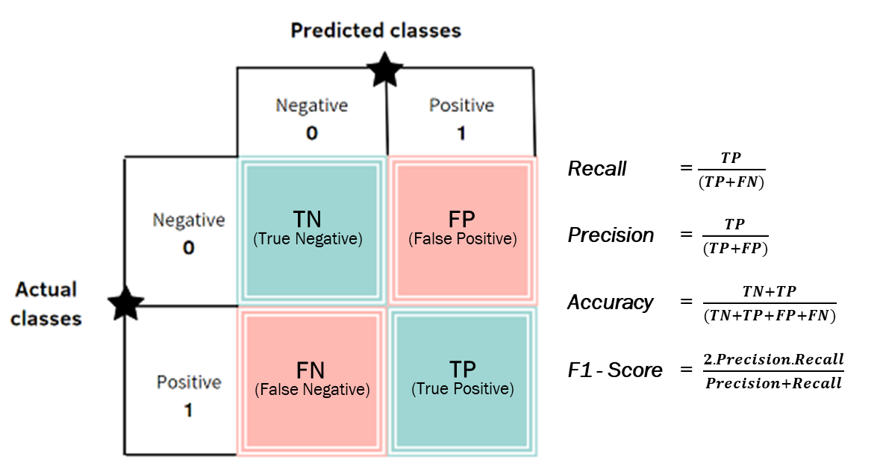

>**TARGET**<br>
> * 1 : customer yang churn
> * 0 : customer yang TIDAK churn
>
><br>***CONFUSSION MATRIX STATEMENT***<br>
> * TP : customer yang secara AKTUAL CHURN (1) dan hasil PREDIKSI menunjukan customer itu CHURN (1)
> * TN : customer yang secara AKTUAL TIDAK churn (0) dan hasil PREDIKSI menunjukan customer itu TIDAK CHURN (0) 
> * FN : customer yang secara AKTUAL churn (1) TETAPI, hasil PREDIKSI menunjukan customer itu TIDAK CHURN (0) 
> * FP : customer yang secara AKTUAL TIDAK CHURN (0) TETAPI, hasil PREDIKSI menunjukan customer itu CHURN (1) 
>
><br>***CONSEQUENCE***<br>
> * FN : Kehilangan customer tanpa adanya tindakan preventif untuk mempertahankan customer tersebut (*less costly than finding new customer to join*). hal ini dikarenakan aktualnya seharusnya *churn*, tapi diprediksi TIDAK *churn*. Pada intinya tidak bisa mendeteksi *customer* yang aktualnya benar akan *churn*.
> * FP : Berpotensi salah memberikan promo kepada *customer* sebenarnya tidak *churn*. Hal ini dikarenakan aktualnya seharusnya TIDAK *churn*, tapi diprediksi *churn*.
>
><br>***METRICS***<br>
> Dari penjelasan diatas, saya merasa FN lebih penting dibandingkan dengan FP, maka saya akan memprioritaskan untuk mereduksi kejadian FN maka dari itu *metric* yang saya gunakan adalah *recalll*. jika case FP terjadi, akan saya anggap sebagi bagian dari program loyalitas pelanggan.

<a id="2"></a>
<font color="lightseagreen" size=+3><b>2. LIBRARY</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

<a id="2.1"></a>
<font color="lightseagreen" size=+2><b>2.1. PYTHON PACKAGE LIBRARY</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

In [2]:
import pandas as pd

# larger cell code
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# show all columns on pandas dataframe
pd.set_option("display.max_columns", None)

# show all value in columns, wider columns
pd.set_option("max_colwidth", 0)

In [3]:
# common dataframe
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
from IPython.display import IFrame
from itertools import chain,cycle

# math & statistic function
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kstest
from scipy.stats import shapiro

# remove all warnings, more robust
import warnings
warnings.filterwarnings("ignore")

# Machine Learning
# preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# metode resampling
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler

# basic model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# ensemble model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# library yang dibutuhkan model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

# metrics
from sklearn.metrics import classification_report, recall_score, precision_score, average_precision_score, accuracy_score

# pipeline, karena nanti kita akan mengatasi imbalance. kita import saja pipeline dari imblearn
from imblearn.pipeline import Pipeline

# pickle for deployment
import pickle

In [4]:
# silahkan fungsi ini di trial. sepertinya masih butuh beberapa penyesuaian
def general_eda(df):
    gen_info = []
    for i in df.columns:
        try : 
            samples = df[i].drop_duplicates(keep = "first").sample(2).values
        except ValueError : 
            samples = df[i].sample().values
            
        gen_info.append([
            i,
            df[i].dtype,
            df[i].isna().sum(),
            round(((df[i].isna().sum()*100) / df.shape[0]),2), # cek bagian ini untuk lebih tepatnya.
            df[i].nunique(),
            samples])

    gen_info_df = pd.DataFrame(
                    data = gen_info,
                    columns = ["features", "type", "n_null", "nullpct", "n_unique", "sampledata"])
    return(gen_info_df)

In [5]:
# check each feature categorical or numerical
def col_info(df, i, figsize = (5, 3)):
    print(f"index kolom : {i}")
    print(f"nama kolom : {df.columns[i]}")
    print("\nUnique item pada kolom")
    print(f"{df[df.columns[i]].unique()}")
    print("\nValue Counts")
    df_col_info = pd.DataFrame(df[df.columns[i]].value_counts())
    df_col_info.rename(columns = {f"{df.columns[i]}" : f"n_{df.columns[i]}"}, inplace = True)
    
    plt.figure(figsize = figsize)
    sns.countplot(data = df, x = df[df.columns[i]], palette = "Set2")
    plt.xticks(rotation = 45)
    plt.show()
    
    return df_col_info

In [6]:
# check feature if too much numerical. 
# then check for distribution and outliers 
def visualize_distribution(df, i) :
    print(f"Stats for {df.columns[i]}:")
    display(df[df.columns[i]].describe())
    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (12,8), 
                                   gridspec_kw={"height_ratios": (.15, .85),
                                               "hspace": 0.05})
    ax1.set_title(f"Distribution of {[df.columns[i]]}", color = "gray")
    sns.boxplot(df[df.columns[i]], ax = ax1)
    ax1.set(xlabel = "")
    sns.distplot(df[df.columns[i]], ax = ax2)
    plt.show()

    print(f"Skewness of {df.columns[i]}:", skew(df[df.columns[i]]))

In [7]:
# categorical features and target in proprortion
def target_n_dependant_categorical(df, feature_list , target, n_col = 4, n_rows = 2, figsize = (22,8)):
    print(f"ada {len(feature_list)} categorical features :", feature_list)
    print("target variables :", target, "\n")
    fig, axes = plt.subplots(n_rows, n_col)
    fig.set_size_inches(figsize)
    for ax, v in zip(axes.flatten(), feature_list):
        pd.crosstab(df[v], df[target]).plot(kind = "bar", ax = ax)
        xlabel = pd.crosstab(df[v], df[target], normalize = True).index
        ax.set_ylim(0, 2500)
        ax.set_title(f"n_Cust - {target} by {v}", size = 14)
        ax.set_ylabel("n_Customer")
        ax.set_xticklabels(xlabel, rotation = 0)
        ax.grid()
    plt.tight_layout()
    plt.show()

In [8]:
# categorical features and target in proprortion
def target_n_dependant_categorical_proportion(df, feature_list , target, n_col = 4, n_rows = 2, figsize = (22,8)):
    print(f"ada {len(feature_list)} categorical features :", feature_list)
    print("target variables :", target, "\n")
    fig, axes = plt.subplots(n_rows, n_col)
    fig.set_size_inches(figsize)
    for ax, v in zip(axes.flatten(), feature_list):
        pd.crosstab(df[v], df[target], normalize = True).plot(kind = "bar", stacked = True, ax = ax)
        xlabel = pd.crosstab(df[v], df[target], normalize = True).index
        ax.set_ylim(0, 0.8)
        ax.set_title(f"Cust.Prop - {target} by {v}", size = 14)
        ax.set_ylabel("n_customer")
        ax.set_xticklabels(xlabel, rotation = 0)
        ax.grid()
    plt.tight_layout()
    plt.show()

In [9]:
# displaying column side by side
def display_side_by_side(*args,titles=cycle([""])):
    html_str = ""
    for df,title in zip(args, chain(titles,cycle(["</br>"])) ):
        html_str += "<th style='text-align:center'><td style = 'vertical-align:top'>"
        html_str += f"<h3>{title}</h3>"
        html_str += df.to_html().replace("table","table style='display:inline'")
        html_str += "</td></th>"
    display_html(html_str,raw=True)

In [10]:
# Visualize Outliers
def outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    below = q1 - 1.5 * iqr
    above = q3 + 1.5 * iqr
    idx_outlier = df[(df[col] > above) | (df[col] < below)].index
    return idx_outlier

def outliers_tabulation(df, col_list):
    df_outlier= pd.DataFrame(columns=["features", "n_outliers", "outliers_pct(%)"])

    for i in col_list:
        df_outlier= df_outlier.append({"features": i, "n_outliers": len(outlier(df, i)),"outliers_pct(%)": f"{round(len(outlier(df, i))/len(df)*100,2)} %"}, ignore_index = True)

    return df_outlier

<a id="3"></a>
<font color="lightseagreen" size=+3><b>3. DATA UNDERSTANDING</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

**NOTE**
* Data imbalance (27% Churn, 73% Not Churn)
* sebagian besar fitur adalah kategorikal
* Baris data merepresentasikan customer TELCO
* Kategori seperti ***No*** dan ***No Internet Services*** akan diganti menjadi ***OtherServices***. Penjelasan lihat [disini](#3.2.2_en)

**ATTRIBUTE INFORMATION**<br>
Data awal yang diberikan seperti terlampir

| feature/target | Attribute | Data Type | Description |Response|
| --- | --- | --- | --- | --- |
| feature | Dependents | Text | Customer tidak tinggal sendiri ? (bisa tinggal dengan keluarga, saudara, dll) | Yes, No |
| feature | Tenure | Int. | total bulan customer telah berlangganan | an integer, instance 9 |
| feature | OnlineSecurity | Text | subscribe untuk layanan tambahan - keamanan ? | Yes, No | 
| feature | OnlineBackup | Text | subscribe untuk layanan tambahan - backup ? | Yes, No |
| feature | InternetService | Text | jenis layanan internet yang dipakai | DSL, Fiber Optic |
| feature | DeviceProtection | Text | subscribe untuk layanan tambahan - perlindungan perangkat ? | Yes, No | 
| feature | TechSupport | Text | subscribe untuk layanan tambahan - technical support ? | Yes, No |
| feature | Contract | Text | jenis kontrak berlangganan | Month-to-Month, One Year, Two Year |
| feature | PaperlessBilling | Text | pelanggan memanfaatkan paparlessbilling ? | Yes, No |
| feature | MonthlyCharges | Float | biaya bulanan yang perlu dibayar customer | a float, instance 72.90 |
| target | Churn | Text | Customer berhenti berlangganan ? | Yes, No | 

**IMPORT THE DATA**

In [11]:
df_0 = pd.read_csv("data_telco_customer_churn.csv")
df = df_0.copy()
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


Dari output diatas, terlihat bahwa kita tidak memiliki missing value. akan saya lanjutkan untuk pemeriksaan di tahap selanjutnya

In [13]:
general_eda(df)

,features,type,n_null,nullpct,n_unique,sampledata
0,Dependents,object,0,0.0,2,"[Yes, No]"
1,tenure,int64,0,0.0,73,"[20, 57]"
2,OnlineSecurity,object,0,0.0,3,"[No internet service, Yes]"
3,OnlineBackup,object,0,0.0,3,"[No, Yes]"
4,InternetService,object,0,0.0,3,"[Fiber optic, DSL]"
5,DeviceProtection,object,0,0.0,3,"[No internet service, No]"
6,TechSupport,object,0,0.0,3,"[No, Yes]"
7,Contract,object,0,0.0,3,"[Two year, Month-to-month]"
8,PaperlessBilling,object,0,0.0,2,"[No, Yes]"
9,MonthlyCharges,float64,0,0.0,1422,"[76.2, 82.7]"


Dari output diatas, dapat dilihat bahwa masing - masing feature telah memiliki tipe data yang tepat ya. Pemeriksaan dapat dilanjutkan ke tahap selanjutnya

***CHECK IF I HAVE DUPLICATE DATA***

In [14]:
# works on the duplicate
dups = df.duplicated()

# how much ?
print("we have ", df[dups].shape[0], "rows of duplicate data")

# Show the duplicates ? 
df[dups]

we have  77 rows of duplicate data


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
624,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
701,No,41,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.65,No
786,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.65,Yes
951,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.15,Yes
1266,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
...,...,...,...,...,...,...,...,...,...,...,...
4759,No,4,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.05,No
4786,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.35,No
4788,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,70.10,Yes
4866,No,1,No,No,DSL,No,No,Month-to-month,Yes,55.00,Yes


Pemeriksaan diatas mengindikasikan bahwa kita memiliki sejumlah data *duplicate*

***DELETE ROWS THAT CONTAIN DUPLICATE DATA***<br>
Pada bagian ini saya akan menghapus data duplikat.

In [15]:
# drop duplicated data
df.drop_duplicates(inplace = True)

# pengecekan julmah value sebelum dan sesudah menghilangkan data duplikat
print("original data size, ", df_0.shape[0])
print("after removing duplicate data, ", df.shape[0])

original data size,  4930
after removing duplicate data,  4853


Disini, saya telah menghandle data duplicate, bisa lanjut ke bagian selanjutnya yaitu pengecekan setiap *feature*

<a id="3.1"></a>
<font color="lightseagreen" size=+2><b>3.1. FEATURE CHECK</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

index kolom : 0
nama kolom : Dependents

Unique item pada kolom
['Yes' 'No']

Value Counts


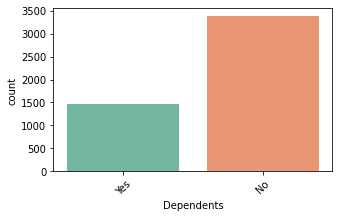

,n_Dependents
No,3380
Yes,1473


In [16]:
col_info(df, 0)

***DEPENDENTS***    
* Feature **dependents** menjelaskan, "apakah customer tidak tinggal sendiri ?" 
* Feature **dependents** tidak menunjukan anomali,
* Dari data ini diketahui bahwa mayoritas pelanggan TELCO (69.89%) tinggal sendiri atau tanpa pendaming (saudara, orang tua, teman dan sebagainya)

index kolom : 1
nama kolom : tenure

Unique item pada kolom
[ 9 14 64 72  3 40 17 11  8 47 18  5  1 48 13 58  7  4 70 34 31 37 15 71
 10 43 22 33 69 54 63 55 66 56 32 26 24  2 51 23 49 28 36 45 42  6 61 59
 67 65  0 16 52 41 25 62 20 50 30 60 19 35 57 27 44 53 12 46 39 29 38 68
 21]

Value Counts


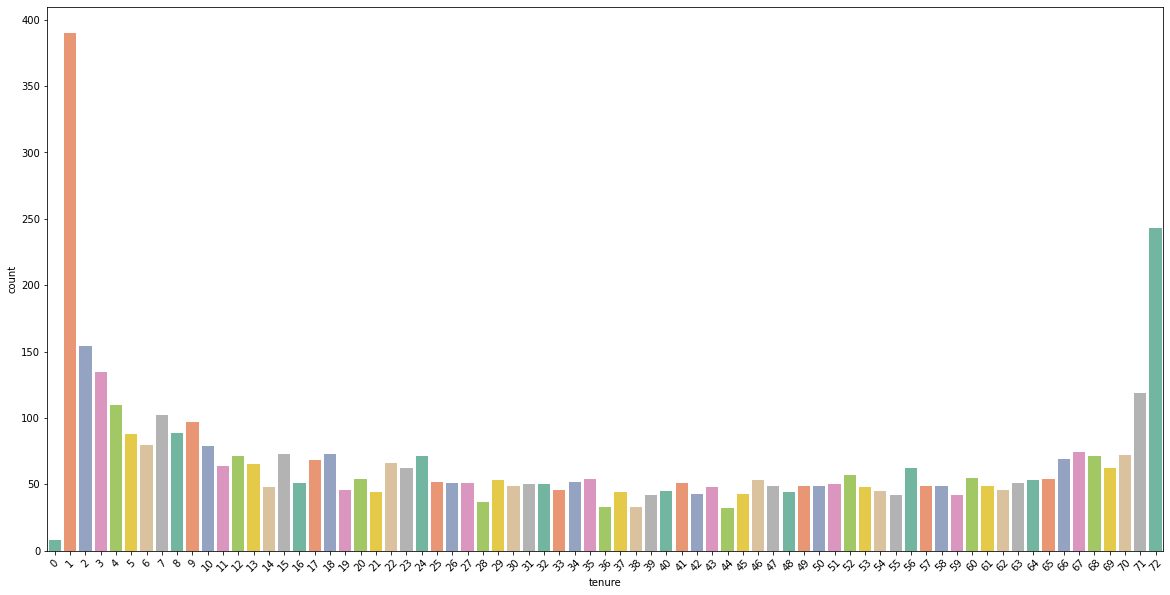

,n_tenure
1,390
72,243
2,154
3,135
71,119
...,...
28,37
36,33
38,33
44,32


In [17]:
col_info(df, 1, (20, 10))

***TENURE***  
* Feature **tenure** menjelaskan lama berlangganan customer (bulan)
* Feature **tenure** tidak menunjukan anomali,
* Dari data ini diketahui bahwa :
    * total data customer : 4930
    * cukup banyak pelanggan yang baru bergabung dangan TELCO (tenure = 0 dan 1, mengindikasikan baru berlangganan 1 bulan) [8,9%]
    * cukup banyak juga pelanggan yang sudah lama menggunakan jasa TELCO (tenure = 72, mengindikasikan sudah berlangganan 72 bulan) [5,1%]
    * customer lainnya [86%] sudah berlangganan selama 2 bulan s.d 71 bulan.

index kolom : 2
nama kolom : OnlineSecurity

Unique item pada kolom
['No' 'Yes' 'No internet service']

Value Counts


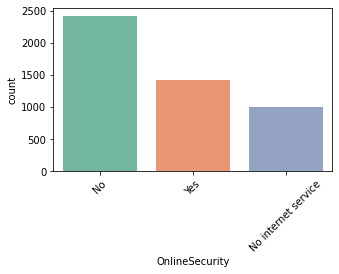

,n_OnlineSecurity
No,2420
Yes,1430
No internet service,1003


In [18]:
col_info(df, 2)

<a id="3.1_onsec"></a>
***ONLINESECURITY***  
* Feature **OnlineSecurity** menjelaskan apakah customer subscribe layanan tambahan - keamanan ?
* Feature **OnlineSecurity** tidak menunjukan anomali,
* Dari data ini diketahui bahwa :
    * mayoritas pelanggan tidak berlangganan layanan tambahan - keamanan [49.5%]
    * sebagian pelanggan tidak berlangganan layanan tambahan - keamanan [29.0%]
    * customer lainnya tidak berlangganan layanan internet [21.5%]<br><br>
    

***PERUBAHAN KATEGORI***    
* Sesuai dengan notes pada [sub bab ini](#3.2.2_en), untuk kategori seperti ***No internet services*** dan ***No*** di beberapa grafik yang dihasilkan dari beberapa *categorical feature* dan target (*churn*), akan diubah menjadi ***OtherServices***

In [19]:
df["OnlineSecurity"].replace("No internet service", "OtherServices", inplace = True)

# Kita confirm perubahan yang dilakukan dibawah ini
df["OnlineSecurity"].unique()

array(['No', 'Yes', 'OtherServices'], dtype=object)

index kolom : 3
nama kolom : OnlineBackup

Unique item pada kolom
['No' 'Yes' 'No internet service']

Value Counts


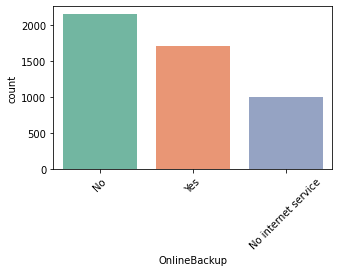

,n_OnlineBackup
No,2148
Yes,1702
No internet service,1003


In [20]:
col_info(df, 3)

<a id="3.1_onbac"></a>
***ONLINEBACKUP***  
* Feature **OnlineBackup** menjelaskan apakah customer subscribe layanan tambahan - backup online ?
* Feature **OnlineBackup** tidak menunjukan anomali,
* Dari data ini diketahui bahwa :
    * mayoritas pelanggan tidak berlangganan layanan tambahan - onlinebackup [44.0%]
    * sebagian pelanggan tidak berlangganan layanan tambahan - onlinebackup [34.6%]
    * customer lainnya tidak berlangganan layanan internet [21.4%]<br><br>
    
***PERUBAHAN KATEGORI***    
* Sesuai dengan notes pada [sub bab ini](#3.2.2_en), untuk kategori seperti ***No internet services*** dan ***No*** di beberapa grafik yang dihasilkan dari beberapa *categorical feature* dan target (*churn*), akan diubah menjadi ***OtherServices***

In [21]:
df["OnlineBackup"].replace("No internet service", "OtherServices", inplace = True)

# Kita confirm perubahan yang dilakukan dibawah ini
df["OnlineBackup"].unique()

array(['No', 'Yes', 'OtherServices'], dtype=object)

index kolom : 4
nama kolom : InternetService

Unique item pada kolom
['DSL' 'Fiber optic' 'No']

Value Counts


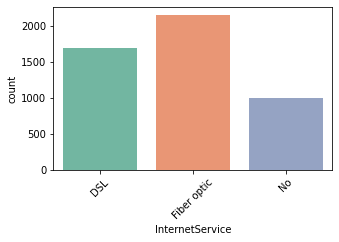

,n_InternetService
Fiber optic,2154
DSL,1696
No,1003


In [22]:
col_info(df, 4)

<a id="3.1_is"></a>
***INTERNETSERVICE***  
* Feature **InternetService** menjelaskan layanan yang digunakan customer
* Feature **InternetService** tidak menunjukan anomali,
* Dari data ini diketahui bahwa :
    * mayoritas pelanggan berlangganan layanan internet - fiber optic [44.0%]
    * sebagian pelanggan berlangganan layanan internet - DSL [34.6%]
    * customer lainnya tidak berlangganan layanan internet [21.4%]


* Disini saya asumsikan bahwa DSL adalah layanan internet yang masih menghubungkan internet dengan bantuan telefon rumah atau internet yang masih menggunaakn kabel tembaga
* dilihat dari data, bahwa memang layanan internet yang lebih populer adalah fiber optic. Selain karena harganya yang memberikan value lebih, fiber optic juga memberikan kecepatan dan kestabilan internet yang lebih baik dibandingkan DSL. 
* Untuk menawarkan jaringan fiber optic kepada customer, tentu ISP harus sudah mengcover wilayah tersebut.
* Dari data ini mungkin jaringan fiber optik bisa diperluas lagi cakupannya, agar customer bisa diberikan opsi layanan yang lebih baik dan proporsi fiber optic bisa lebih ditingkatkan lagi.<br><br>

***PERUBAHAN KATEGORI***    
* Sesuai dengan notes pada [sub bab ini](#3.2.2_en), untuk kategori seperti ***No internet services*** dan ***No*** di beberapa grafik yang dihasilkan dari beberapa *categorical feature* dan target (*churn*), akan diubah menjadi ***OtherServices***

In [23]:
df["InternetService"].replace("No", "OtherServices", inplace = True)

# Kita confirm perubahan yang dilakukan dibawah ini
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'OtherServices'], dtype=object)

index kolom : 5
nama kolom : DeviceProtection

Unique item pada kolom
['Yes' 'No internet service' 'No']

Value Counts


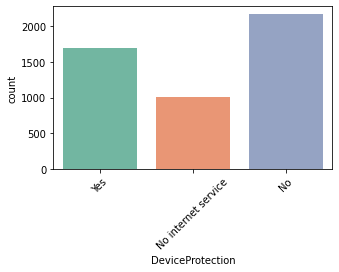

,n_DeviceProtection
No,2162
Yes,1688
No internet service,1003


In [24]:
col_info(df, 5)

<a id="3.1_dp"></a>
***DEVICEPROTECTION***  
* Feature **DeviceProtection** menjelaskan apakah customer subscribe untuk layanan tambahan - perlindungan perangkat ?	
* Feature **DeviceProtection** tidak menunjukan anomali,
* Dari data ini diketahui bahwa :
    * mayoritas pelanggan tidak subscribe layanan tambahan - perlindungan perangkat [44.3%]
    * sebagian pelanggan subscribe layanan tambahan - perlindungan perangkat [34.3%]
    * customer lainnya tidak berlangganan layanan internet [21.4%]<br><br>
    
***PERUBAHAN KATEGORI***    
* Sesuai dengan notes pada [sub bab ini](#3.2.2_en), untuk kategori seperti ***No internet services*** dan ***No*** di beberapa grafik yang dihasilkan dari beberapa *categorical feature* dan target (*churn*), akan diubah menjadi ***OtherServices***

In [25]:
df["DeviceProtection"].replace("No internet service", "OtherServices", inplace = True)

# Kita confirm perubahan yang dilakukan dibawah ini
df["DeviceProtection"].unique()

array(['Yes', 'OtherServices', 'No'], dtype=object)

index kolom : 6
nama kolom : TechSupport

Unique item pada kolom
['Yes' 'No' 'No internet service']

Value Counts


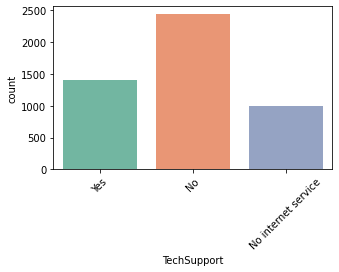

,n_TechSupport
No,2442
Yes,1408
No internet service,1003


In [26]:
col_info(df, 6)

<a id="3.1_ts"></a>
***TECHSUPPORT***  
* Feature **TechSupport** menjelaskan apakah customer subscribe untuk layanan tambahan - technical support ?
* Feature **TechSupport** tidak menunjukan anomali,
* Dari data ini diketahui bahwa :
    * mayoritas pelanggan tidak subscribe layanan tambahan - technical support [50%]
    * sebagian pelanggan subscribe layanan tambahan - technical support [28.6%]
    * customer lainnya tidak berlangganan layanan internet [21.4%]<br><br>
    
***PERUBAHAN KATEGORI***    
* Sesuai dengan notes pada [sub bab ini](#3.2.2_en), untuk kategori seperti ***No internet services*** dan ***No*** di beberapa grafik yang dihasilkan dari beberapa *categorical feature* dan target (*churn*), akan diubah menjadi ***OtherServices***

In [27]:
df["TechSupport"].replace("No internet service", "OtherServices", inplace = True)

# Kita confirm perubahan yang dilakukan dibawah ini
df["TechSupport"].unique()

array(['Yes', 'No', 'OtherServices'], dtype=object)

index kolom : 7
nama kolom : Contract

Unique item pada kolom
['Month-to-month' 'Two year' 'One year']

Value Counts


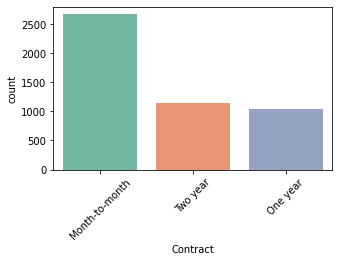

,n_Contract
Month-to-month,2665
Two year,1143
One year,1045


In [28]:
col_info(df, 7)

***CONTRACT***
* Feature **Contract** menjelaskan jenis kontrak berlangganan
* Feature **Contract** tidak menunjukan anomali,
* Dari data ini diketahui bahwa :
    * mayoritas pelanggan masih menggunakan kontrak pembayaran bulan per bulan [55.2%]
    * sebagian pelanggan menggunakan kontrak 2 tahunan [23.4%] dan
    * sebagian pelanggan lainnya menggunakan kontrak tahunan [21.4%]

index kolom : 8
nama kolom : PaperlessBilling

Unique item pada kolom
['Yes' 'No']

Value Counts


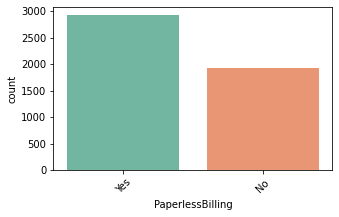

,n_PaperlessBilling
Yes,2925
No,1928


In [29]:
col_info(df, 8)

***PAPERLESSBILLING***
* Feature **PaperlessBilling** menjelaskan apakah customer memanfaatkan fitur *paperless billing* ?
* Feature **PaperlessBilling** tidak menunjukan anomali,
* Dari data ini diketahui bahwa :
    * mayoritas pelanggan telah memanfaatkan *paperless billing* [59.9%]
    * sebagian lainnya belum memanfaatkan fitur ini. [40.1%]


* fitur ini memberikan kemudahan bagi customer maupun perusahaan TELCO.
* benefit untuk customer : 
    * mencegah hilangnya tagihan fisik
    * waktu pengiriman yang sama setiap bulannya, sehingga dapat menjadi rutinitas
    * kepraktisan
* hal hal tersebut tentu menjadi nilai tambah bagi TELCO


* benefit untuk TELCO : 
    * karena *paparless billing*, pekerjaannya dilakukan secara automation, sehingga dapat mengalokasikan sumber daya ke pekerjaan yang lebih krusial atau penting
    * mengurangi resiko kesalahan yang diakibatkan manusia (apabila masih dilakukan secara manual)
    * mempercepat arus kas (karena tagihan pasti masuk ke customer tepat waktu, dan diharapkan pembayaran dilakukan tepat waktu juga)
    * mengurangi biaya operasional seperti kertas dan kebutuhan administrasi lainnya karena billing sudah dikerjakan secara elektronik
    
    
* Untuk kedepannya, customer yang belum menggunakan fitur *paperless billing* ini bisa diarahkan untuk menggunakan fitur tersebut. Ada beberapa penyebab kenapa customer belum menerapkan fitur tersebut yang salah satunya mungkin ketidaktahuan customer akan fitur tersebut. 

Stats for MonthlyCharges:


count    4853.000000
mean     65.321543  
std      29.783655  
min      18.800000  
25%      40.050000  
50%      70.600000  
75%      90.050000  
max      118.650000 
Name: MonthlyCharges, dtype: float64

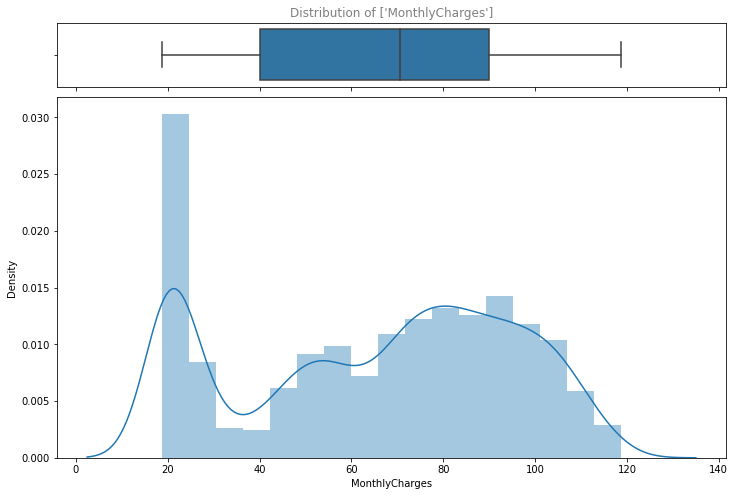

Skewness of MonthlyCharges: -0.24362379068682466


In [30]:
visualize_distribution(df, 9)

***MONTHLYCHARGES***
* Feature **MonthlyCharges** menjelaskan berapa biaya perbulan yang harus dibayarkan customer untuk tetap menikmati layanan dari TELCO
* Feature **MonthlyCharges** tidak menunjukan anomali,
* Dari distribusi datanya, ada 2 kelompok monthly payment yaitu pada range \\$20, dan range \\$40 - \\$120 

index kolom : 10
nama kolom : Churn

Unique item pada kolom
['Yes' 'No']

Value Counts


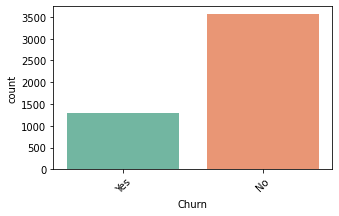

,n_Churn
No,3565
Yes,1288


In [31]:
col_info(df, 10)

***CHURN***
* **Churn** adalah target untuk diprediksi
* **Churn** tidak menunjukan anomali,
* Agar target ini dapat diolah ketahap selanjutnya, Target kategorikal "Yes" dan "No" akan diubah menjadi sebagai berikut : 
    * 1 : customer yang *churn*
    * 0 : customer yang tidak "churn*

* Sesuai dengan yang telah dijelaskan pada bagian sebelumnya

In [32]:
df["Churn"].replace("Yes", 1, inplace = True)
df["Churn"].replace("No", 0, inplace = True)

In [33]:
# pastikan value telah berubah sesuai yang telah ditetapkan
df["Churn"].unique()

array([1, 0], dtype=int64)

<a id="3.2"></a>
<font color="lightseagreen" size=+2><b>3.2. FEATURE CORRELATION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

Pada bagian ini saya ingin membagi feature yang numerical dan categorical

In [34]:
numerical_f = ["tenure", "MonthlyCharges"]
categorical_f = ["Dependents", "OnlineSecurity", "OnlineBackup", "InternetService", "DeviceProtection", "TechSupport", "Contract", "PaperlessBilling"]
target = ["Churn"]

<a id="3.2.1"></a>
<font color="lightseagreen" size=+2><b>3.2.1. NUMERICAL FEATURE WITH TARGET</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

Sebelum masuk ke langkah selanjutnya, saya ingin mengecek dulu normalitas data dari numerical feature yang ada

In [35]:
numerical_f

['tenure', 'MonthlyCharges']

In [36]:
# pengujian distribusi normal dengan metode grafis & frequentist
ks_p_value_comp = []
shapiro_comp = []
feature_comp = []
category = numerical_f # yang akan diuji normalitasnya hanya numerical feature saja

for num_feat in category :   
    # feature compilation
    feature_comp.append(num_feat)
    
    # uji statistik dengan kolmogorofsmirnov
    ks_statistic, ks_pvalue = kstest(df[num_feat], "norm")
    # hasilnya pengujian KS disimpan pada sebuah list yang kita buat sebelumnya
    ks_p_value_comp.append(ks_pvalue)
    
    # uji statistik dengan shapirowilk
    sw_statistic, sw_pvalue = shapiro(df[num_feat])
    # hasilnya pengujian shapiro wilk disimpan pada sebuah list yang kita buat sebelumnya
    shapiro_comp.append(sw_pvalue)

# hasil pengujian statistik dikompilasi ke dalam suatu dataframe
pd.DataFrame({
    "ks_test_pval" : ks_p_value_comp,
    "shapiro_test_pval" : shapiro_comp},
    index = feature_comp)

,ks_test_pval,shapiro_test_pval
tenure,0.0,0.000000e+00
MonthlyCharges,0.0,4.344025e-44


***NORMALITY CHECK***<br>
Berdasarkan pemeriksaan normalitas yang dilakukan dengan metode *frequentist* diatas (*Kolmogorof Smirnof & Shapiro Wilk Test*), nilai *pvalue* - nya tidak ada yang lebih besar dari 0.05 maka untuk *feature tenure* dan *feature MonhtlyCharges* tidak terdistribusi normal. Maka metode korelasi yang digunakan adalah metode *Spearman*

In [37]:
# calculate correlation using spearman
numeric_corr = df[numerical_f + target].corr(method = "spearman")
numeric_corr

,tenure,MonthlyCharges,Churn
tenure,1.000000,0.259220,-0.375362
MonthlyCharges,0.259220,1.000000,0.185835
Churn,-0.375362,0.185835,1.000000


**HEATMAP**<br>
Kuat korelasi antar feature numerical dengan target *Churn* diberikan dibawah ini

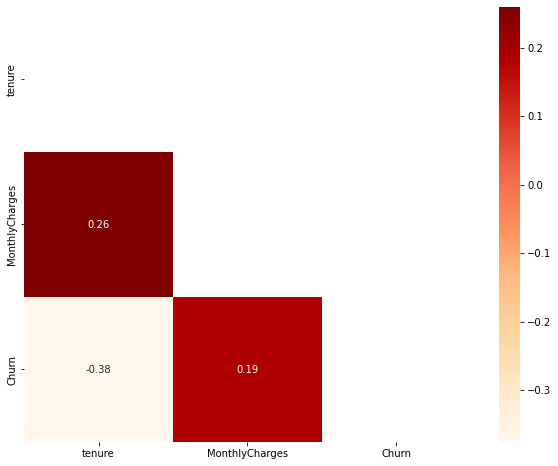

In [38]:
# rules untuk membuat heatmap menjadi tidak kotak
mask = np.triu(np.ones_like(numeric_corr))

# membuat heatmap
plt.figure(figsize = (10,8))
sns.heatmap(numeric_corr, cmap="OrRd", annot = True, mask=mask)
plt.show()

***INSIGHT ABOUT CORRELATION***
* Dari besarnya nilai korelasi yang diberikan, *tenure* dan *MonthlyCharge* tidak berpengaruh besar terhadap *Churn* nya seorang customer. Nilai korelasi untuk masing *feature* adalah sebagai berikut :
    * *Tenure* terhadap *Churn* berkorelasi negatif sebesar -0.38 yang artinya semakin lama berlangganan, maka semakin kecil kemungkinan untuk *churn*. Tapi kuat korelasi antara *tenure* dan *churn* terbilang sedang (range 0.3 - 0.7)
    * *MonthlyCharges* terhadap *Churn* berkorelasi positif sebesar 0.18 yang artinya semakin besar *MonthlyCharges* atau biaya bulanan, maka semakin meningkat kemungkinan customer untuk *churn*. Tapi kuat korelasi antara *MonthlyCharges* dan *Churn* terbilang lemah (range 0.0 - 0.3)
    

* *feature tenure & MonthlyCharges* juga tidak memperlihatkan hubungan yang kuat (cenderung lemah di nilai korelasi 0.27), yang artinya semakin lama berlangganan maka MonthlyCharges ada kecenderungan meningkat.

***PLOT NUMERICAL FEATURE DATA ON HISTPLOT & BOXPLOT***
<a id="3.2.1.numeric_hist_boxplot"></a>

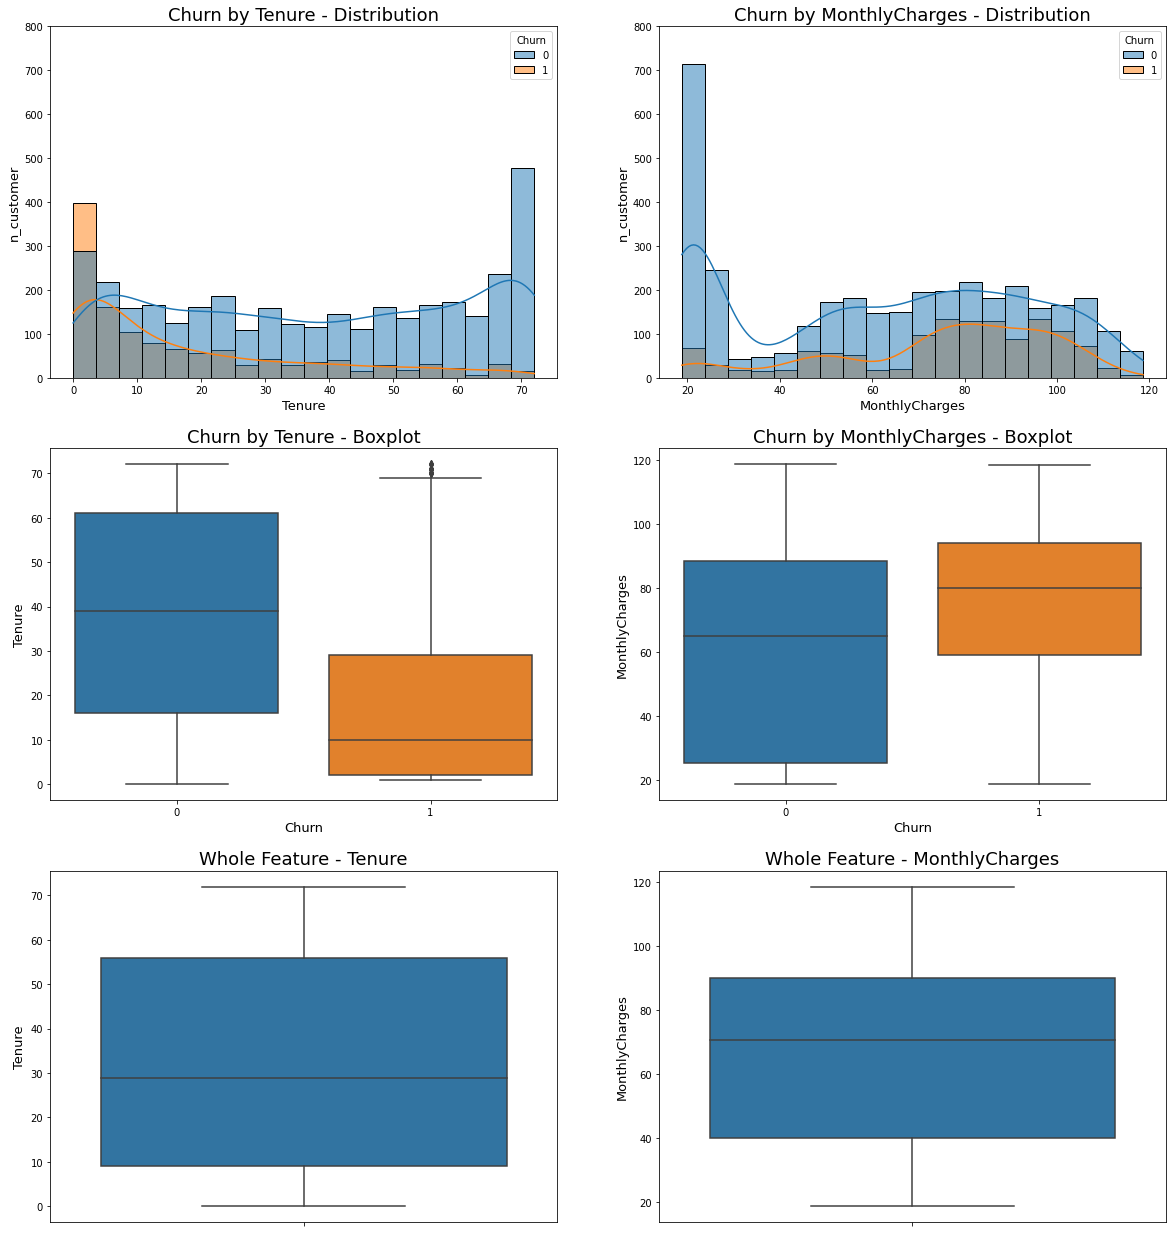

In [39]:
plt.figure(figsize=(20,22))

plt.subplot(321)
sns.histplot(data = df,x = "tenure", hue = "Churn", kde = True, bins = 20)
plt.ylim(0,800)
plt.title("Churn by Tenure - Distribution", fontsize = 18)
plt.xlabel("Tenure",size = 13)
plt.ylabel("n_customer",size = 13)

plt.subplot(322)
sns.histplot(data = df, x = "MonthlyCharges", hue = "Churn", kde=True, bins = 20)
plt.ylim(0,800)
plt.title("Churn by MonthlyCharges - Distribution", fontsize = 18)
plt.xlabel("MonthlyCharges",size = 13)
plt.ylabel("n_customer",size = 13)

plt.subplot(323)
sns.boxplot(data = df, y ="tenure", x = "Churn")
plt.title("Churn by Tenure - Boxplot",size = 18)
plt.xlabel("Churn",size = 13)
plt.ylabel("Tenure",size = 13)

plt.subplot(324)
sns.boxplot(data = df, y = "MonthlyCharges", x = "Churn")
plt.title("Churn by MonthlyCharges - Boxplot",size = 18)
plt.xlabel("Churn",size = 13)
plt.ylabel("MonthlyCharges",size = 13)

plt.subplot(325)
sns.boxplot(data = df, y = "tenure")
plt.title("Whole Feature - Tenure",size = 18)
plt.ylabel("Tenure",size = 13)

plt.subplot(326)
sns.boxplot(data = df, y = "MonthlyCharges")
plt.title("Whole Feature - MonthlyCharges",size = 18)
plt.ylabel("MonthlyCharges",size = 13)
plt.show()

  ***INSIGHT ABOUT TENURE & MONTHLYCHARGES***
* Dari grafik yang diberikan diatas, uji *frequentist* yang dilakukan *inline* dengan distribusi yang ditampilan. data pada *feature tenure & MonthlyCharges* tidak menunjukan pola distribusi normal (distribusi tidak berbentuk *bell shapped*).
* Untuk *feature tenure & MonthlyCharges* tidak ada *outliers*, ini dapat menjadi pertimbangan untuk pemilihan metode *scaling* pada bagian pemodelan.


* Untuk ***feature tenure*** jika dilihat dari grafik *histplot* dan *boxplot* diatas:
    * Terlihat pola bahwa mayoritas customer yang ***churn*** adalah customer yang berlangganan kurang dari 25 bulan.
    * Dapat diamati pada grafik jika customer sudah berlangganan lebih dari 25 bulan, rasio antara customer yang *churn* dengan yang tidak *churn* semakin kecil.
    * Untuk customer yang sudah berlangganan lama (diindikasikan dengan nilai tenure yang semakin besar) saya asumsikan puas dengan layanan yang diberikan TELCO baik dari segi value dan layanan yang diberikan
    * Untuk customer baru yang berlangganan kurang dari 25 bulan, saya asumsikan tidak puas dengan layanan yang diberikan TELCO karena waktu berlangganan yang relatif singkat dibandingkan dengan customer yang tidak *churn*. Saya asumsikan juga ada perbedaan *treatment* antara customer terdahulu dengan customer yang baru mendaftar, karena *churn* kebanyakan terjadi pada customer baru, customer lama cenderung tidak *churn*.<br><br>
    
* Untuk ***feature MonthlyCharges*** jika dilihat dari grafik *histplot* dan *boxplot* diatas:
    * terlihat pola bahwa mayoritas customer yang ***churn*** adalah customer dengan *MonthlyCharge* yang relatif tinggi (\\$70 - \\$100). Meskipun dari grafik dapat diliaht bahwa untuk jumlah yang tidak *churn* masih lebih banyak dari pada yang *churn*. tapi rasio antara yang *churn* dengan yang tidak *churn* paling tinggi ada di *price range* tersebut.
    * Untuk *price range* di angka \\$20 - \\$70 dan \\$110 - \\$120 rasio antara customer *churn* dengan yang tidak dapat terbilang relatif sedikit.
    * Disini saya asumsikan bahwa untuk rentang harga \\$20 - \\$70 dan \\$110 - \\$120 TELCO memberikan value yang lebih baik dibandingkan dengan rentang harga (\\$70 - \\$100)<br><br>

In [40]:
df[["tenure", "MonthlyCharges"]].describe()

,tenure,MonthlyCharges
count,4853.000000,4853.000000
mean,32.679992,65.321543
std,24.395554,29.783655
min,0.000000,18.800000
25%,9.000000,40.050000
50%,29.000000,70.600000
75%,56.000000,90.050000
max,72.000000,118.650000


[***RETURN TO CURRENT CONCLUSSION***](#3.2.4)<br><br>
<a id="3.2.1.scatterplot_numerical"></a>
***SCATTERPLOT ANTARA TENURE DENGAN MONTHLY CHARGES***<br>
Saya ingin melihat hubungan antara *Tenure* dengan *MonhtlyCharges* menggunakan *Scatterplot*

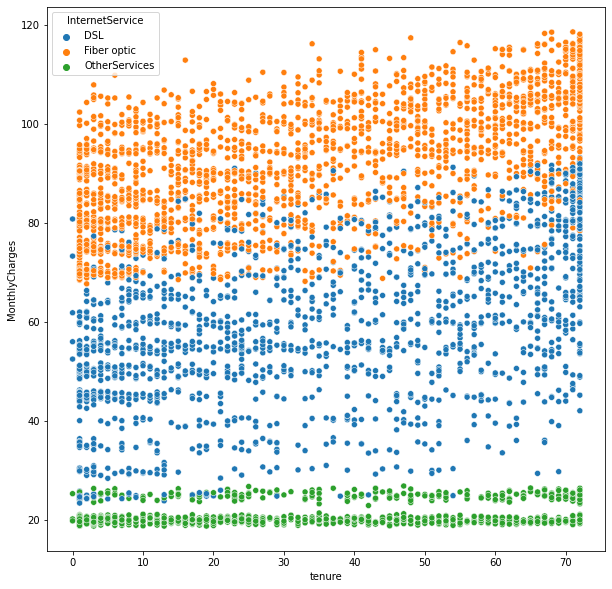

In [41]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = df["tenure"], y = df["MonthlyCharges"], hue = df["InternetService"])
plt.show()

[***INSIGHT CHURN BY INTERNETSERVICES & MONTHLYCHARGES***](#insight_churn_by_internetservices&monthlycharges)<br><br>
***INSIGHT ABOUT TENURE & MONTHLYCHARGES CONT***
* Dari *scatterplot* diatas bisa diketahui bahwa untuk produk *Fiber Optic* adalah produk dengan *MonthlyCharges* tertinggi dibandingkan 2 produk lainnya yaitu DSL dan *OtherServices*
* Produk *OtherServices* merupakan produk dengan *MonthlyCharges* termurah, dan DSL ada diantara *fiber optic* dan *OtherServices*
* Untuk harga *OtherServices* cenderung flat, tidak ada peningkatan harga dari waktu ke waktu. ditandai dengan *tenure* yang rendah maupun tinggi, *MonthlyCharges* relatif sama.
* Untuk harga *DSL* & *FiberOptic* ada trend peningkatan harga dari waktu ke waktunya meskipun peningkatan terbilang cukup landai.

<a id="3.2.2"></a>
<font color="lightseagreen" size=+2><b>3.2.2. CATEGORICAL FEATURE WITH TARGET</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>
<a id="3.2.2_en"></a>

***EARLY NOTES***<br>
Analisis ini telah dilakukan sebelumnya, dan dari grafik yang dihasilkan dari beberapa plot dibawah : 
- countplot onlinesecurity by churn
- countplot onlinebackup by churn
- countplot internetservice by churn
- countplot deviceprotection by churn
- countplot techsupport by churn<br>

Menghasilkan sebuah kategori seperti ***No Internet Service*** dan ***No***, hal ini mengindikasikan bahwa  customer dapat berlangganan ***services lain*** selain Internet dari TELCO seperti misalnya layanan TV kabel dan sebagainya. Sehingga untuk kategori tersebut akan dijadikan 1 kategori saja yaitu ***Other services***


Perubahan tersebut akan diaplikasikan pada bagian ***feature check***. perubahan untuk tiap feature akan didokumentasikan dibawah ini : 
- [***feature OnlineSecurity***](#3.1_onsec)
- [***feature OnlineBackup***](#3.1_onbac)
- [***feature InternetService***](#3.1_is)
- [***feature DeviceProtection***](#3.1_dp)
- [***feature TechSupport***](#3.1_ts)

<h3 align = "center"><b>TARGET WITH CATEGORICAL FEATURE</b></h3><br>

ada 8 categorical features : ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']
target variables : Churn 



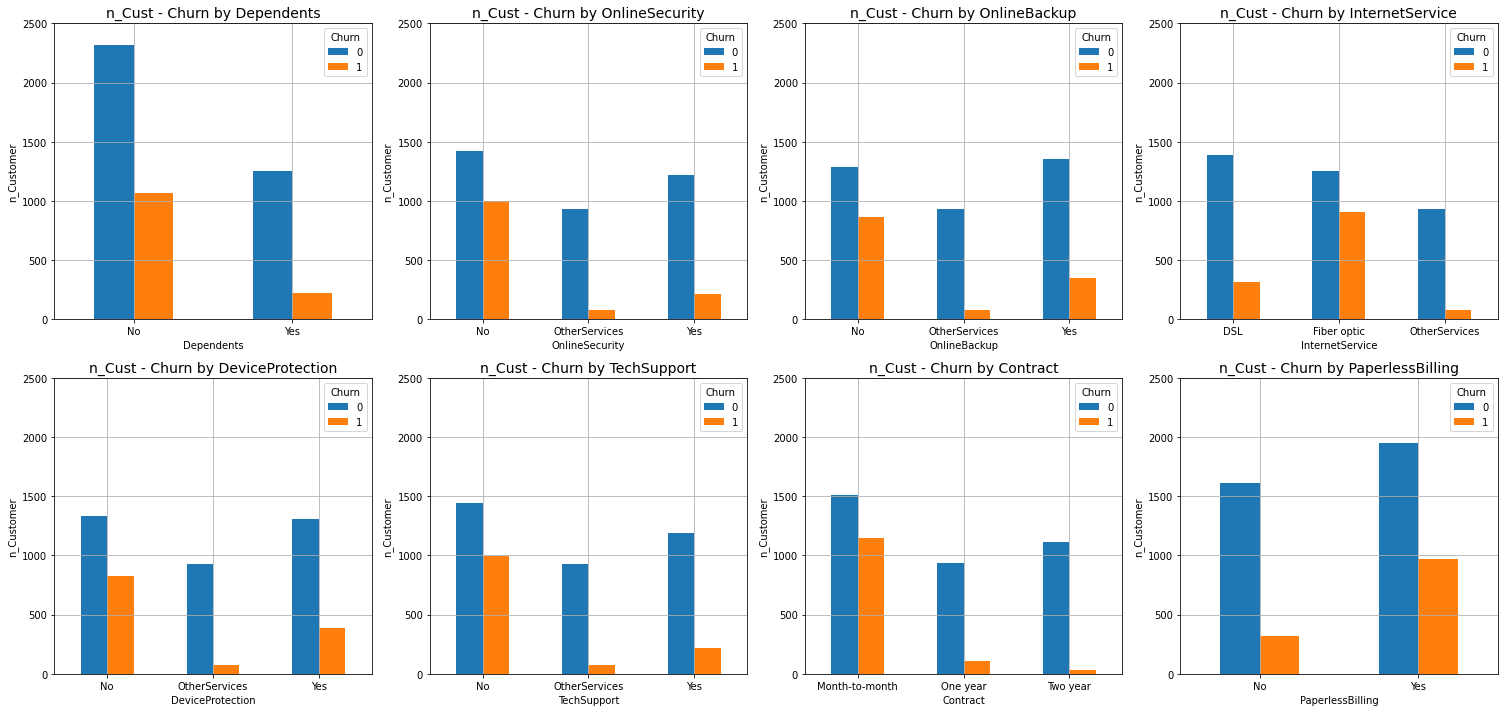

In [42]:
target_n_dependant_categorical(df, categorical_f, "Churn", 4, 2, figsize = (21,10))

In [43]:
list_ct = []
for cat_feat in categorical_f:
    ct_df = pd.crosstab(df[cat_feat], df["Churn"])
    list_ct.append(ct_df)

churnby_dep, churnby_ol_sec, churnby_ol_bu, churnby_is, churnby_dp, churnby_ts, churnby_contract, churnby_ppbil = list_ct

display_side_by_side(churnby_dep, churnby_ol_sec, churnby_ol_bu, churnby_is, titles = ["Churn by Dependents", "Churn by OnlineSec.", "Churn by OnlineBackup", "Churn by InternetService"])
display_side_by_side(churnby_dp, churnby_ts, churnby_contract, churnby_ppbil, titles = ["Churn by DeviceProtection", "Churn by TechSupport.", "Churn by Contract", "Churn by PaperlessBilling"])

Churn,0,1
Dependents,,
No,2316,1064
Yes,1249,224
Churn,0,1
OnlineSecurity,,
No,1419,1001
OtherServices,928,75
Yes,1218,212
Churn,0,1
OnlineBackup,,


Churn,0,1
DeviceProtection,,
No,1332,830
OtherServices,928,75
Yes,1305,383
Churn,0,1
TechSupport,,
No,1443,999
OtherServices,928,75
Yes,1194,214
Churn,0,1


<h3 align = "center"><b>TARGET WITH CATEGORICAL FEATURE IN PROPORTION</b></h3><br>

ada 8 categorical features : ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']
target variables : Churn 



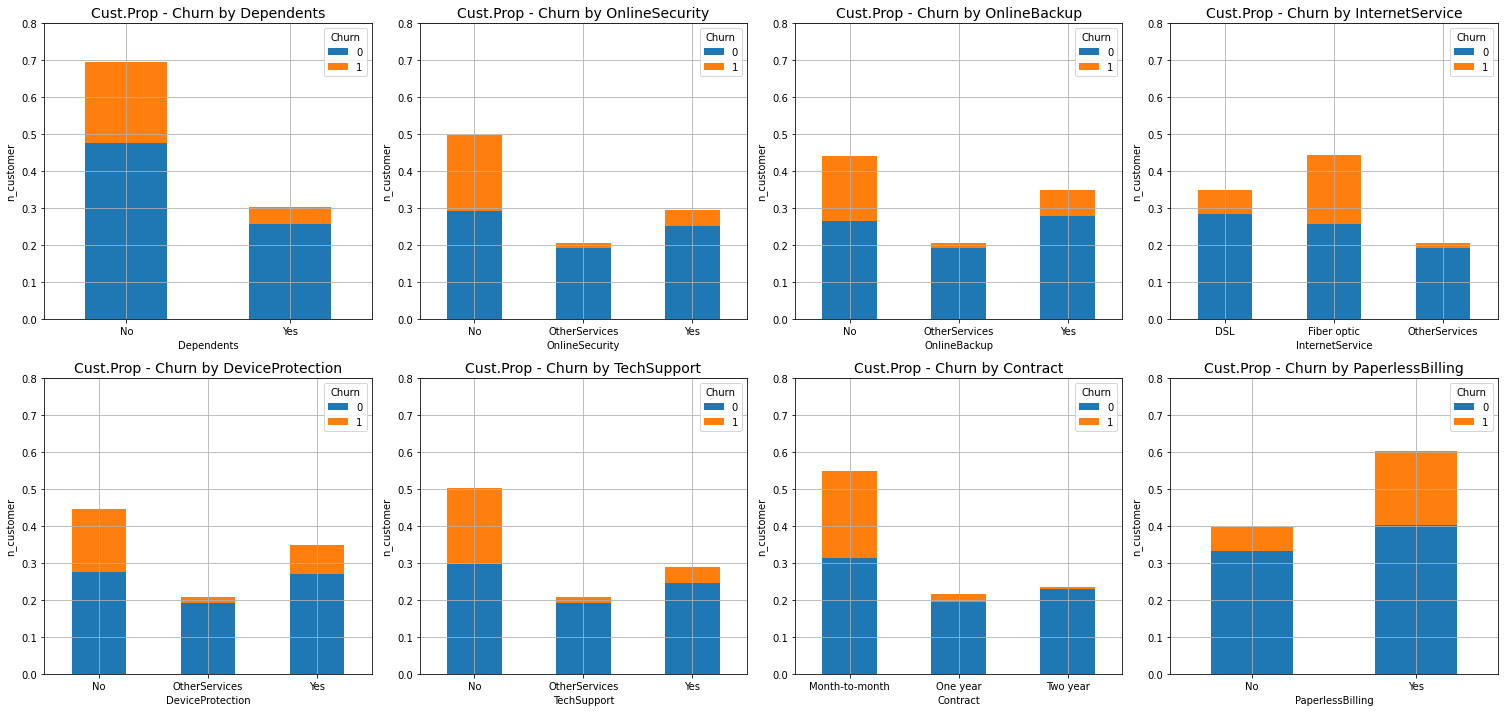

In [44]:
target_n_dependant_categorical_proportion(df, categorical_f, "Churn", 4, 2, figsize = (21,10))

In [45]:
list_ct = []
for cat_feat in categorical_f:
    ct_df = pd.crosstab(df[cat_feat], df["Churn"], normalize = True).round(5)*100
    list_ct.append(ct_df)

churnby_dep, churnby_ol_sec, churnby_ol_bu, churnby_is, churnby_dp, churnby_ts, churnby_contract, churnby_ppbil = list_ct

display_side_by_side(churnby_dep, churnby_ol_sec, churnby_ol_bu, churnby_is, titles = ["%Churn by Dependents", "%Churn by OnlineSec.", "%Churn by OnlineBackup", "%Churn by InternetService"])
display_side_by_side(churnby_dp, churnby_ts, churnby_contract, churnby_ppbil, titles = ["%Churn by DeviceProtection", "%Churn by TechSupport.", "%Churn by Contract", "%Churn by PaperlessBilling"])

Churn,0,1
Dependents,,
No,47.723,21.925
Yes,25.737,4.616
Churn,0,1
OnlineSecurity,,
No,29.240,20.626
OtherServices,19.122,1.545
Yes,25.098,4.368
Churn,0,1
OnlineBackup,,


Churn,0,1
DeviceProtection,,
No,27.447,17.103
OtherServices,19.122,1.545
Yes,26.891,7.892
Churn,0,1
TechSupport,,
No,29.734,20.585
OtherServices,19.122,1.545
Yes,24.603,4.410
Churn,0,1


***INSIGHT ABOUT THE CATEGORICAL FEATURES***<br>
Dari grafik yang diberikan diatas, saya mencoba melihat beberapa perspektif dari *feature* yang ada bila dihubungkan dengan targetnya yaitu *churn*. Dari beberapa perspektif ini, diharapkan nanti kita bisa mengetahui faktor apa yang sebenarnya yang mempengaruhi *customer* untuk *churn*<br><br>

***DEPENDENTS***
* Dari grafik *churn by dependents* diatas, mayoritas customer adalah yang tinggal sendiri sebesar kurang lebih 70%. Perbedaannya cukup signifikan bila dibandingkan dengan yang tinggal bersama (bisa bersama keluarga, saudara, atau rekan kerja) di angka kurang lebih 30%.
* Tapi dari 70% *customer* yang tiggal sendiri, hampir 1/3 *customer* nya *churn*. *churn* ratenya cukup tinggi bila dibandingkan dengan *customer* yang tinggal bersama.
* Disini saya ambil hipotesa sementara bahwa untuk *customer* yang tinggal sendiri, ada kecenderungan lebih mudah untuk memutus layanan karena ya tidak ada ketergantungan dengan pihak manapun. 
* Dilain sisi untuk customer yang tinggal dengan orang lain, sebelum memutus layanan, customer harus berdiskusi dulu dengan orang yang tinggal bersama itu. dan mungkin setelah berdiskusi dan berbagai pertimbangan, banyak customer yang kemudian memilih untuk mempertahankan layanan yang diberikan. 
* Dengan diskusi ini, mungkin customer melihat dari beberapa perspektif dan sadar bahwa layanan yang diberikan sebenarnya sudah baik dan tidak jadi untuk *churn*.<br><br>

***ONLINESECURITY***
* Dari grafik *churn by onlinesecurity* diatas, 50% *customer* TELCO TIDAK berlangganan fitur tambahan *onlinesecurity*, 29% *customer* TELCO berlangganan fitur tambahan *onlinesecurity*, dan 21% *customer* lainnya saya asumsikan tidak ada layanan tambahan *onlinesecurity* karena berlangganan layanan lain (non internet).
* Dari 50% *customer* TELCO yang TIDAK berlangganan fitur tambahan *onlinesecurity*, hampir setengahnya *churn*. rasio *churn* ini cukup tinggi bila dibandingkan dengan kategori lainnya pada *feature online security*.
* Hal ini bisa mengindikasikan ada kompetitor yang bisa memberikan fitur tambahan berupa *onlinesecurity*, dengan harga yang lebih menarik dari TELCO atau ada deal menarik yang berkaitan dengan *onlinesecurity* yang bisa ditawarkan kompetitor lain kepada customer TELCO, sehingga customer *churn*
* Dari yang telah dijelaskan pada point point sebelumnya, mungkin langkah yang dapat dilakukan untuk mengurangi jumlah *churn* adalah menawarkan promo bundling dengan fitur tambahan *onlinesecurity* kepada customer (terutama dari yang belum subscribe fitur *OnlineSecurity*, dengan harapan ada beberapa customer yang akan *churn* menjadi TIDAK *churn*. Dari grafik tersebut untuk customer yang berlangganan fitur tambahan *onlinesecurity*, rasio *churn* nya relatif sedikit.
* Ingat dari sub bab [***business problem***](#1) yang kita bahas sebelumnya ? biaya customer yang *churn* akan lebih mahal 6 - 7x dibandingkan dengan mencari customer baru. Strategi yang disebutkan sebelumnya dapat dipertimbangkan.
* Untuk jumlah *churn* pada kategori *OtherServices* sudah relatif sedikit, bisa ditelusuri lebih lanjut lagi kenapa customer itu *churn*. Dengan mengetahui kenapa *customer churn*, diharapkan ada langkah perbaikan yang bisa diambil untuk meningkatkan *services* yang diberikan TELCO

***ONLINEBACKUP***
* Dari grafik *churn by onlinebackup* diatas, 44% *customer* TELCO TIDAK berlangganan fitur tambahan *onlinebackup*, 35% *customer* TELCO berlangganan fitur tambahan *onlinebackup*, dan 21% *customer* lainnya saya asumsikan tidak ada layanan tambahan *onlinebackup* karena berlangganan layanan lain (non internet).
* Dari 44% *customer* TELCO TIDAK berlangganan fitur tambahan *onlinebackup*, hampir setengahnya *churn*. rasio *churn* ini cukup tinggi bila dibandingkan dengan kategori lainnya pada *feature onlinebackup*.
* Hal ini bisa mengindikasikan ada kompetitor yang bisa memberikan fitur tambahan berupa *onlinebackup*, dengan harga yang lebih menarik dari TELCO atau ada deal menarik yang berkaitan dengan *onlinebackup* yang bisa ditawarkan kompetitor lain kepada customer TELCO, sehingga customer *churn*.
* Dari yang telah dijelaskan pada point point sebelumnya, mungkin langkah yang dapat dilakukan untuk mengurangi jumlah *churn* adalah menawarkan promo bundling dengan fitur tambahan *onlinebackup* kepada customer (terutama dari yang belum subscribe fitur *onlinebackup*, dengan harapan ada beberapa customer yang akan *churn* menjadi TIDAK *churn*. Dari grafik tersebut untuk customer yang berlangganan fitur tambahan *onlinebackup*, rasio *churn* nya relatif lebih sedikit.
* Ingat dari sub bab [***business problem***](#1) yang kita bahas sebelumnya ? biaya customer yang *churn* akan lebih mahal 6 - 7x dibandingkan dengan mencari customer baru. Strategi yang disebutkan sebelumnya dapat dipertimbangkan.
* Untuk jumlah *churn* pada kategori *OtherServices* sudah relatif sedikit, bisa ditelusuri lebih lanjut lagi kenapa customer itu *churn*. Dengan mengetahui kenapa *customer churn*, diharapkan ada langkah perbaikan yang bisa diambil untuk meningkatkan *services* yang diberikan TELCO

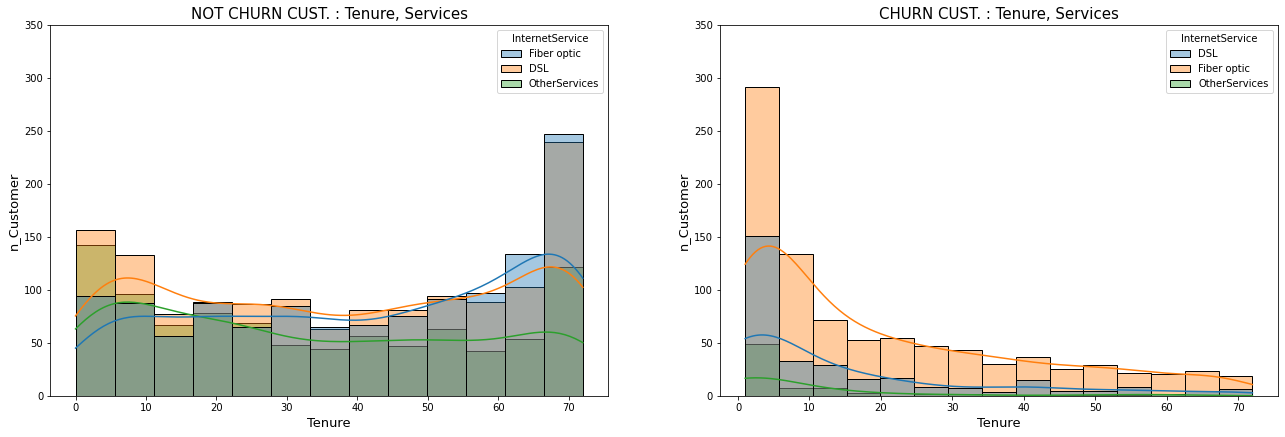

In [46]:
plt.figure(figsize = (22,15))
plt.subplot(221)
sns.histplot(data = df[df["Churn"] == 0], x = "tenure" ,hue = "InternetService", kde=True, alpha = 0.4)
plt.ylim(0, 350)
plt.title("NOT CHURN CUST. : Tenure, Services", fontsize = 15)
plt.xlabel("Tenure", size = 13)
plt.ylabel("n_Customer", size = 13)

plt.subplot(222)
sns.histplot(data = df[df["Churn"] == 1], x = "tenure" ,hue = "InternetService", kde=True, alpha = 0.4)
plt.ylim(0, 350)
plt.title("CHURN CUST. : Tenure, Services", fontsize = 15)
plt.xlabel("Tenure", size = 13)
plt.ylabel("n_Customer", size = 13)

plt.show()

<a id="3.2.2_internetservices"></a>
[***RETURN TO INSIGHT CUSTOMER BY CONTRACT & INTERNET SERVICES***](#insight_customer_by_contract_&_internet_services)<br><br>

***INTERNETSERVICES***
* Dari grafik *churn by internetservice*, 44% *customer* TELCO menggunakan layanan *Fiber optic*, 44% *customer* TELCO menggunakan layanan DSL, dan 21% *customer* TELCO lainnya berlangganan *OtherServices* (diasumsikan layanan *streaming* dan lain sejenisnya)
* Dari 44% *customer* TELCO yang menggunakan *Fiber optic*, hampir setengahnya *churn*. rasio *churn* ini cukup tinggi bila dibandingkan dengan kategori lainnya pada DSL dan *OtherServices*<br><br>

* Untuk melihat perihal *InternetServices* lebih dalam, saya membuat satu grafik lagi yang memperlihatkan hubungan antara lama customer berlangganan (*tenure*), jenis services yang diberikan, dan status *churn*.
* Dari grafik tersebut, terlihat bahwa untuk customer yang sudah lama berlangganan untuk internet via *Fiber Optic* (ditandai dengan *tenure* yang besar), banyak yang *Churn* bila dibandingkan dengan 2 kategori lain yaitu DSL dan *OtherServices*<br><br>
* Dapat diamati pula bahwa pada 5 bulan pertama (tenure <= 5) pelanggan baru TELCO sangat banyak yang *churn* untuk layanan *service Internet Fiber Optik & DSL*. ini harus ditelusuri lebih lanjut penyebabnya. Untuk *OtherServices* relatif lebih sedikit dari kedua kategori tersebut, tapi jumlahnya tetap signifikan di 5 bulan pertama.
* Disini saya asumsikan bahwa, banyak *customer* TELCO yang baru bergabung menggunakan layanan *service Internet Fiber Optik & DSL & Otherservices* sering mengalami kendala di awal bulan (terutama untuk *Fiber Optic dan DSL*). Layanan yang kurang baik itu diikuti dengan *after services* yang kurang baik pula, sehingga menyebabkan *customer churn* di bulan ke 5.<br><br>
* Untuk layanan kategori *Fiber Optic* perlu diberikan perhatian khusus karena jumlah customer *churn* baik yang customer baru maupun lama jumlahnya cukup signifikan dan konsisten.
* Point diatas menandakan bahwa permasalahan *Fiber Optic* ini sudah berlangsung cukup lama dan belum ada solusi yang signifikan yang mengakibatkan *customer loyal* (nilai *tenure* besar) pengguna layanan *fiber optic* untuk *churn*
* Untuk kendala internet *fiber optik* seperti jaringan yang tidak stabil, speed yang tidak sesuai dengan yang layanan yang dipesan, atau mungkin juga layanan servis yang lambat dan lain sebagainya.
* ada kemungkinan produk *fiber optic* PT TELCO ada masalah dari sisi infrastruktur sehingga tidak memberikan services yang tidak optimal dan berkepanjangan bagi *customer*
* Tentu hal ini harus digali lebih dalam lagi dan segera lakukan perbaikan untuk layanan *fiber optic*

***DEVICEPROTECTION***
* Dari grafik *churn by DeviceProtection* diatas, 44% *customer* TELCO TIDAK berlangganan fitur tambahan *DeviceProtection*, 35% *customer* TELCO berlangganan fitur tambahan *DeviceProtection*, dan 21% *customer* lainnya saya asumsikan tidak ada layanan tambahan *DeviceProtection* karena berlangganan layanan lain (non internet).
* Dari 44% *customer* TELCO TIDAK berlangganan fitur tambahan *DeviceProtection*, hampir setengahnya *churn*. rasio *churn* ini cukup tinggi bila dibandingkan dengan kategori lainnya pada *feature onlinebackup*.
* Hal ini bisa mengindikasikan ada kompetitor yang bisa memberikan fitur tambahan berupa *DeviceProtection*, dengan harga yang lebih menarik dari TELCO atau ada deal menarik yang berkaitan dengan *DeviceProtection* yang bisa ditawarkan kompetitor lain kepada customer TELCO, sehingga customer *churn*
* Dari yang telah dijelaskan pada point point sebelumnya, mungkin langkah yang dapat dilakukan untuk mengurangi jumlah *churn* adalah menawarkan promo bundling dengan fitur tambahan *DeviceProtection* kepada customer (terutama dari yang belum subscribe fitur *DeviceProtection*, dengan harapan ada beberapa customer yang akan *churn* menjadi TIDAK *churn*. Dari grafik tersebut untuk customer yang berlangganan fitur tambahan *DeviceProtection*, rasio *churn* nya relatif lebih sedikit.
* Ingat dari sub bab [***business problem***](#1) yang kita bahas sebelumnya ? biaya customer yang *churn* akan lebih mahal 6 - 7x dibandingkan dengan mencari customer baru. Strategi yang disebutkan sebelumnya dapat dipertimbangkan.
* Untuk jumlah *churn* pada kategori *OtherServices* sudah relatif sedikit, bisa ditelusuri lebih lanjut lagi kenapa customer itu *churn*. Dengan mengetahui kenapa *customer churn*, diharapkan ada langkah perbaikan yang bisa diambil untuk meningkatkan *services* yang diberikan TELCO<br><br>

***TECHSUPPORT***
* Dari grafik *churn by techsupport* diatas, 50% *customer* TELCO TIDAK berlangganan fitur tambahan *TechSupport*, 29% *customer* TELCO berlangganan fitur tambahan *TechSupport*, dan 21% *customer* lainnya saya asumsikan tidak ada layanan tambahan *TechSupport* karena berlangganan layanan lain (non internet).
* Dari 50% *customer* TELCO TIDAK berlangganan fitur tambahan *DeviceProtection*, hampir setengahnya *churn*. rasio *churn* ini cukup tinggi bila dibandingkan dengan kategori lainnya pada *feature TechSupport*.
* Hal ini bisa mengindikasikan ada kompetitor yang bisa memberikan fitur tambahan berupa *Techsupport*, dengan harga yang lebih menarik dari TELCO atau ada deal menarik yang berkaitan dengan *Techsupport* yang bisa ditawarkan kompetitor lain kepada customer TELCO, sehingga customer *churn*
* Dari yang telah dijelaskan pada point point sebelumnya, mungkin langkah yang dapat dilakukan untuk mengurangi jumlah *churn* adalah menawarkan promo bundling dengan fitur tambahan *Techsupport* kepada customer (terutama dari yang belum subscribe fitur *Techsupport*, dengan harapan ada beberapa customer yang akan *churn* menjadi TIDAK *churn*. Dari grafik tersebut untuk customer yang berlangganan fitur tambahan *Techsupport*, rasio *churn* nya relatif lebih sedikit.
* Ingat dari sub bab [***business problem***](#1) yang kita bahas sebelumnya ? biaya customer yang *churn* akan lebih mahal 6 - 7x dibandingkan dengan mencari customer baru. Strategi yang disebutkan sebelumnya dapat dipertimbangkan.
* Untuk jumlah *churn* pada kategori *OtherServices* sudah relatif sedikit, bisa ditelusuri lebih lanjut lagi kenapa customer itu *churn*. Dengan mengetahui kenapa *customer churn*, diharapkan ada langkah perbaikan yang bisa diambil untuk meningkatkan *services* yang diberikan TELCO<br><br>
<a id="churn_by_contract_&tenure"></a>

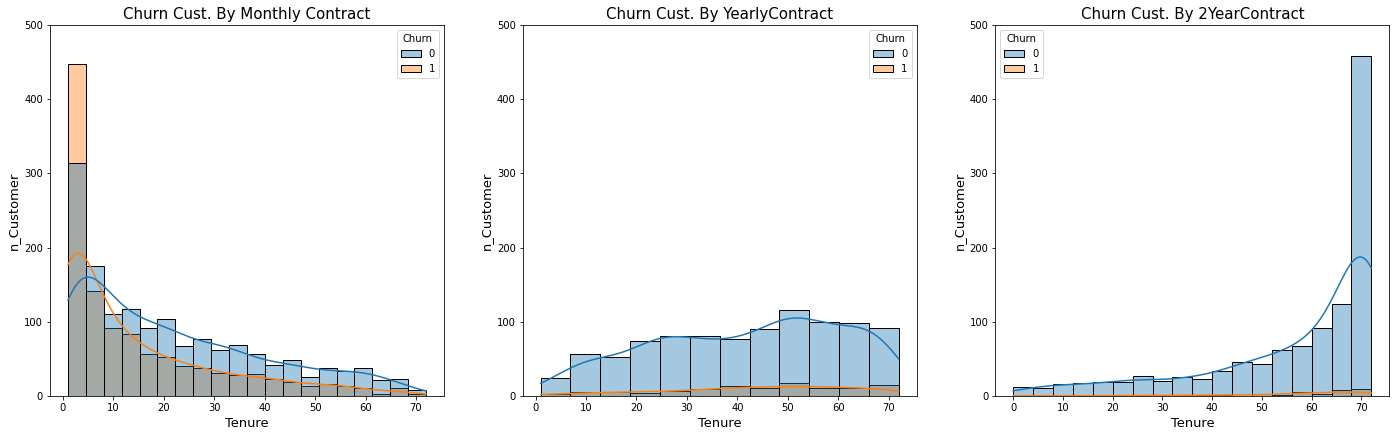

In [47]:
plt.figure(figsize = (24,15))
plt.subplot(231)
sns.histplot(data = df[df["Contract"] == "Month-to-month"], x = "tenure" ,hue = "Churn", kde = True, alpha = 0.4)
plt.ylim(0, 500)
plt.title("Churn Cust. By Monthly Contract", fontsize = 15)
plt.xlabel("Tenure", size = 13)
plt.ylabel("n_Customer", size = 13)

plt.subplot(232)
sns.histplot(data = df[df["Contract"] == "One year"], x = "tenure" ,hue = "Churn", kde = True, alpha = 0.4)
plt.ylim(0, 500)
plt.title("Churn Cust. By YearlyContract", fontsize = 15)
plt.xlabel("Tenure", size = 13)
plt.ylabel("n_Customer", size = 13)

plt.subplot(233)
sns.histplot(data = df[df["Contract"] == "Two year"], x = "tenure" ,hue = "Churn", kde = True, alpha = 0.4)
plt.ylim(0, 500)
plt.title("Churn Cust. By 2YearContract", fontsize = 15)
plt.xlabel("Tenure", size = 13)
plt.ylabel("n_Customer", size = 13)

plt.show()

[***RETURN TO ALL FEATURE HEATMAP INSIGHT***](#3.2.3.heatmap)<br>

***CONTRACT***
* Dari grafik *churn by contract*, 55% *customer* TELCO menggunakan kontrak bulanan (*MonthlyContract*), 23% *customer* TELCO menggunakan kontrak 2 tahunan (*two years contract*), 21% *customer* TELCO menggunaakn kontrak 1 tahunan (*one year contract*).
* Jadi bisa disimpulkan bahwa pelanggan paling tertarik dengan kontrak bulanan (*MonthlyContract*). Kontrak 1 tahunan dan 2 tahunan tidak menunjukan perbedaan yang signifikan.
* Dari point sebelumnya kita ketahui bahwa *MonthlyContract* adalah yang paling laris, tapi dari kategori (*MonthlyContract*) ini banyak juga yang *churn*. 
* Rasio *churn* untuk kontrak bulanan ada di angka 40 - 45%. Angka ini sangat signifikan bila dibandingkan dengan *churn* rate untuk *customer* dengan kontrak tahunan maupun 2 tahunan.<br><br>

* Saya rasa wajar - wajar saja bila *customer* yang menggunakan *MonthlyContract* banyak yang *churn*, karena kesempatan untuk berhenti berlangganan juga lebih besar dibandingkan dengan kontrak tahunan maupun kontrak 2 tahunan. 
* Jadi ketika *customer* menemukan kompetitor yang memberikan *value* lebih atau menemukan preferensi yang lebih cocok atau dengan alasan lain, mereka akan dengan mudah *churn*.
* Berbeda dengan *customer* yang menggunakan kontrak tahunan maupun 2 tahunan. Karena sudah terikat kontrak tahunan, tentu kesempatan untuk *churn* menjadi lebih kecil dibandingkan dengan kontrak bulanan. Selain itu *customer* dengan kontrak ini juga pasti akan berpikir 2 kali jika ingin *churn* karena sudah membayar penuh untuk 1 atau 2 tahun atau bisa juga terkena pinalti bila membatalkan kontrak.<br><br>
* Kontrak tahunan ataupun2 tahunan bisa diasumsikan juga salah satu strategi yang disediakan TELCO untuk menjaga *customer*. Dengan pembayaran dimuka untuk 1 tahun atau 2 tahun, memberikan *value* yang lebih baik dibandingkan dengan pembayaran bulanan. 
* Tapi tidak semua *customer* memanfaatkan fitur kontrak tahunan tersebut, harus menyesuaikan *cashflow customer* karena pembayarannya besar di awal. Untuk *customer* yang dapat memanfaatkan fitur kontrak tahunan ini terlihat puas dengan layanan TELCO. Hal tersebut ditandai dengan *Churn* rate yang relatif rendah untuk *customer* *2 years contract* dan *Yearly contract* dengan *churn rate* paling rendah ada pada *customer* dengan kontrak 2 tahunan.
* Untuk *customer churn* yang menggunakan kontrak tahunan dan 2 tahunan, meskipun rasio *churn* nya relatif kecil. ada trend peningkatan jumlah *churn* (semakin lama *customer* berlangganan, semakin banyak jumlah yang *churn*)<br><br>

* Memang sistem pembayaran *("Month - to - Month")* memberikan keflexiblean pembayaran dan juga lebih ***friendly*** terhadap *cashflow* (arus kas) dari *customer*. 
* Tapi jika kita lihat dari TELCO, justru cenderung merugikan karena *customer* bisa saja *churn* di bulan itu juga atau di bulan selanjutnya. Tentu ini memberikan ketidakpastian terhadap proyeksi cashflow perusahaan.<br><br>

* Dari penjelasan diatas, *Churn* pada customer dengan kontrak bulanan perlu diketahui penyebabnya karena jumlahnya cukup signifikan. 
* Untuk *customer* dengan kontrak tahunan dan 2 tahunan juga dapat ditelusuri kenapa *customer churn*. tapi prioritas tetap ke yang *customer* bulanan.
* Mencari penyebab kenapa *customer churn* bisa dengan pengisian survey dan lain sebagainya. Diharapkan ada hal hal yang bisa dimanfaatkan TELCO untuk mengembangkan bisnisnya.<br><br>

* Saya asumsikan tidak mungkin untuk menghilangkan sistem kontrak *("Month - to - Month")* karena itu memang yang pada umumnya digunakan untuk servis berbasis langganan / *subscribtion*
* Alternatifnya solusinya tentu adalah mengimprove pelayanan yang dapat diberikan TELCO. baik dari segi stabiiitas dan *performance* layanan. dengan *value* dan pelayanan yang lebih baik diharapkan jumlah *churn* pada *customer* terutama dengan kontrak bulanan bisa direduksi.
* Selain itu juga hal hal detil seperti memberikan informasi pendahuluan h-1 sebelum dilakukan perbaikan jaringan, Promo cashback di hari ulang tahun *customer* dan lain sebagainya. Pelayanan yang baik dan *attention to detail* yang diberikan TELCO kepada *customer* dapat menjadi point plus tersendiri untuk me *retain customer*. Sehingga baik kontrak bulanan maupun tahunan, jumlah *churn* dapat direduksi.
* Jika layanan TELCO baik dari bulan ke bulannya, mungkin *customer* dapat mempertimbangkan untuk meningkatkan kontrak mereka menjadi  *("One Year")* atau bahkan *("Two Year")* tergantung dari kemampuan finansial *customer* dan tentu tingkat kepuasan yang didapatkan *customer* terhadap pelayanan TELCO.<br><br>

***PAPERLESSBILLING***
* Dari grafik *churn by Paperlessbilling*, mayoritas *customer* yang telah memanfaatkan fitur *paperlessbilling* adalah sebesar 60%. 40% sisanya belum memanfaatkan fitur ini.
* Mungkin ada strategi dari TELCO untuk memberikan promo diskon atau promo lain seperti potongan biaya administrasi dan lains sebagainya, bagi pengguna yang sudah menggunakan *paperlessbilling* untuk tagihan mereka.
* Hal seperti ini bisa dimanfaatkan perusahaan untuk menarik minat *customer* yang masih menggunakan tagihan fisik untuk beralih. 
* Dengan mengganti metode penagihan *customer* dengan *paperless billing* memberikan beberapa manfaat sebagai berikut :
    * keterlambatan pembayaran tagihan oleh karena tagihan fisik hilang.
    * mengurangi alokasi sumber daya untuk kegiatan administrasi (karena *paperlessbilling*, diasumsikan semua tagihan dikirimkan via elektronik)
    * terhadap point diatas tentu mengurangi biaya untuk ATK kantor seperti pulpen kertas dan lain sebagainya, dan sumber daya manusia bisa dialokasikan ke pekerjaan lain yang lebih penting atau membutuhkan sumber daya lebih.
    * Diharapkan dengan tagihan yang dikirimkan tepat waktu dan terjadwal via elektronik, pembayaran yang dilakukan oleh *customer* bisa tepat waktu juga. Yang bila dibandingkan dengan konvensional ada resiko keterlambatan pembayaran akibat tagihan fisik hilang
    * Bisa mempromosikan diri bahwa TELCO sebagai perusahaan di bidang teknologi yang mendukung gerakan *Earth Day*, salah satunya dengan menerapkan *paperlessbilling* (hal ini tentu menonjolkan citra positif TELCO di mata *customer*).
    * Selain itu sebenarnya *paperlessbilling* ini lebih *convinient* dibandingkan dengan tagihan fisik, mungkin TELCO perlu memberikan informasi ke customer untuk penerapan *paperlessbilling* (bagi customer yang belum menerapkan sistem tagihan *paperless*)

<a id="3.2.2.mappingchurncustomer"></a>
**MAPPING CHURN CUSTOMER BASED ON MONTH - MONTH CONTRACT**
* Pada bagian ini, saya ingin memetakan customer yang *churn* untuk kontrak *Month - to - Month*.
* Kenapa hanya pada customer dengan kontrak tersebut saja ? karena jumlah *customer churn* nya paling besar untuk tipe kontrak tersebut. (Pada kategori lain saya asumsikan *churn* wajar di rasio tersebut dan agar ditelusuri lebih lanjut kenapa *churn* itu terjadi untuk improvement TELCO kedepanya)
* Dan disini saya mengasumsikan bahwa customer *churn* bukan karena tidak mendapatkan fitur tambahan seperti *OnlineSecurity, OnlineBackup, InternetServices, DeviceProtectionTechSupport dan paperlessbilling* ataupun *dependents* (yang saya asumsikan ada faktor external, yang dapat mempengaruhi keputusan *churn* atau tidak)
* point diatas terjadi karena *customer* dapat dengan bebas memutuskan kapan mereka *churn* di tiap bulannya (entah karena mendapatkan *better offer* atau pindah domisili atau karena layanannya buruk dsb). Permasalahannya ada pada kontrak dengan *customer* dengan basis bulanan.
* Jika hasil plot menunjukan kemiripan, bisa diasumsikan bahwa hipotesa saya mungkin tepat bahwa untuk kejadian *customer* yang *churn* adalah dikarenakan basis kontrak bulanan.

* Untuk melakukan hal tersebut, saya harus mendapatkan index customer yang churn untuk ke 6 scenario sebagai berikut : 
> * ***index customer churn berdasarkan *feature Contract terkhusus Month - to Month*** ***(BASELINE)***
> * index customer churn berdasarkan *feature Dependents*
> * index customer churn berdasarkan *feature OnlineSecurity*
> * index customer churn berdasarkan *feature OnlineBackup*
> * index customer churn berdasarkan *feature InternetService*
> * index customer churn berdasarkan *feature DeviceProtection*
> * index customer churn berdasarkan *feature TechSupport*
> * index customer churn berdasarkan *feature PaperlessBilling*

In [48]:
# mendapatkan index customer dengan kontrak month - month
idx_contract_m2m_churn = df[(df["Contract"] == "Month-to-month") & (df["Churn"] == 1)].index

# mendapatkan index customer dengan churn dari feature dependents
idx_dependent_churn = df[(df["Dependents"].isin(["Yes", "No"])) & (df["Churn"] == 1)].index

# index customer churn berdasarkan churn dari feature OnlineSecurity
idx_os_churn = df[(df["OnlineSecurity"].isin(["Yes", "No", "OtherServices"])) & (df["Churn"] == 1)].index

# index customer churn berdasarkan churn dari feature OnlineBackup
idx_ob_churn = df[(df["OnlineBackup"].isin(["Yes", "No", "OtherServices"])) & (df["Churn"] == 1)].index

# index customer churn berdasarkan churn dari feature InternetService
idx_is_churn = df[(df["InternetService"].isin(["DSL", "Fiber optic", "OtherServices"])) & (df["Churn"] == 1)].index

# index customer churn berdasarkan churn dari feature DeviceProtection
idx_dp_churn = df[(df["DeviceProtection"].isin(["Yes", "No", "OtherServices"])) & (df["Churn"] == 1)].index

# index customer churn berdasarkan churn dari feature TechSupport
idx_ts_churn = df[(df["TechSupport"].isin(["Yes", "No", "OtherServices"])) & (df["Churn"] == 1)].index

# index customer churn berdasarkan churn dari feature Paperless Billing
idx_ppbil_churn = df[(df["TechSupport"].isin(["Yes", "No", "OtherServices"])) & (df["Churn"] == 1)].index

feature_churn_index = [idx_contract_m2m_churn, idx_dependent_churn, idx_os_churn, idx_ob_churn, idx_is_churn, idx_dp_churn, idx_ts_churn, idx_ppbil_churn]
feature_churn_index_name = ["churn_bym2m_contract", "churn_bydependant", "churn_by_onlinesupport", "churn_by_onlinebackup", "churn_by_internetservices", "churn_by_deviceprotection", "churn_by_technicalsupp", "churn_by_paperbill"]

Agar *scatterplot* yang dihasilkan tidak saling tumpang tindih, untuk tiap *scatterplot* yang akan dibuat selanjutnya diberikan y + 100 untuk *scatterplot 1*, kemudian y + 200 untuk *scatterplot 2* dan seterusnya.

Dengan bantuan *scatterplot*, diharapkan dapat terlihat perbedaan *churn* berdasarkan kontrak bulanan dan *churn* berdasarkan *feature* untuk melihat apabila ada kemiripan 

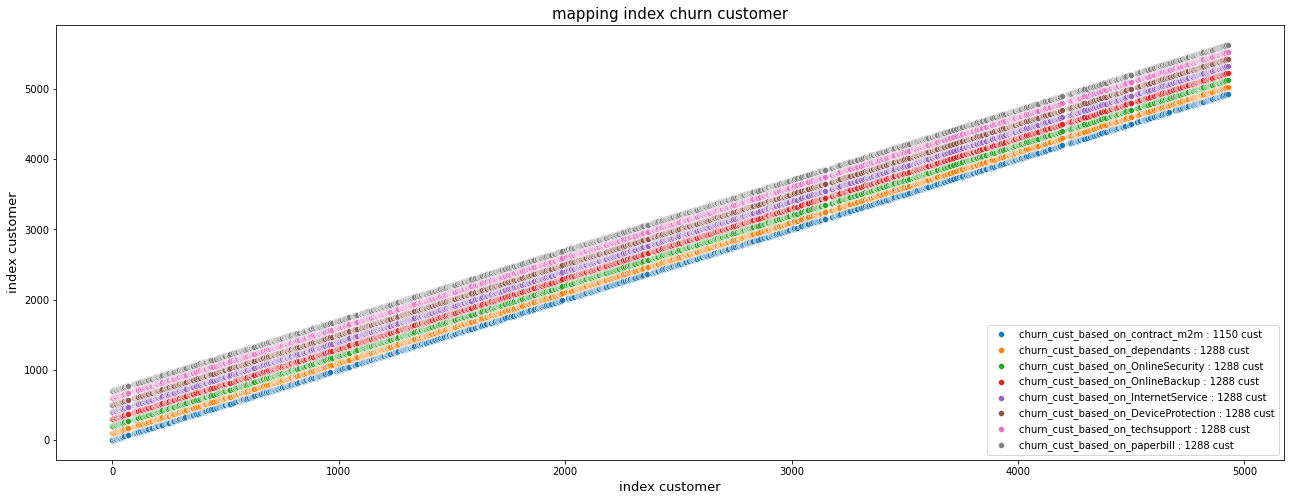

In [49]:
plt.figure(figsize = (22,8))
# baseline, index customer kontrak bulanan
sns.scatterplot(x = idx_contract_m2m_churn, y = idx_contract_m2m_churn, label = f"churn_cust_based_on_contract_m2m : {len(idx_contract_m2m_churn)} cust")

# scatterplot untuk customer churn berdasarkan feature dependants 
sns.scatterplot(x = idx_dependent_churn, y = idx_dependent_churn + 100, label = f"churn_cust_based_on_dependants : {len(idx_dependent_churn)} cust")

# scatterplot untuk  customer churn berdasarkan churn dari feature OnlineSecurity
sns.scatterplot(x = idx_os_churn, y = idx_os_churn + 200, label = f"churn_cust_based_on_OnlineSecurity : {len(idx_os_churn)} cust")

# scatterplot untuk  customer churn berdasarkan churn dari feature OnlineBackup
sns.scatterplot(x = idx_ob_churn, y = idx_ob_churn + 300, label = f"churn_cust_based_on_OnlineBackup : {len(idx_ob_churn)} cust")

# scatterplot untuk  customer churn berdasarkan churn dari feature InternetService
sns.scatterplot(x = idx_is_churn, y = idx_is_churn + 400, label = f"churn_cust_based_on_InternetService : {len(idx_is_churn)} cust")

# scatterplot untuk  customer churn berdasarkan churn dari feature DeviceProtection
sns.scatterplot(x = idx_dp_churn, y = idx_dp_churn + 500, label = f"churn_cust_based_on_DeviceProtection : {len(idx_dp_churn)} cust")

# scatterplot untuk  customer churn berdasarkan churn dari feature TechSupport
sns.scatterplot(x = idx_ts_churn, y = idx_ts_churn + 600, label = f"churn_cust_based_on_techsupport : {len(idx_ts_churn)} cust")

# scatterplot untuk  customer churn berdasarkan churn dari feature Paperless Billing
sns.scatterplot(x = idx_ppbil_churn, y = idx_ppbil_churn + 700, label = f"churn_cust_based_on_paperbill : {len(idx_ppbil_churn)} cust")

plt.title("mapping index churn customer", size = 15)
plt.ylabel("index customer", size = 13)
plt.xlabel("index customer", size = 13)
plt.legend(loc = "lower right")
plt.show()

Dari *scatterplot* yang dihasilkan diatas, terlihat bahwa ***baseline*** kita yaitu *churn customer* berdasarkan kontrak bulanan memiliki kemiripan dengan : 
* customer churn berdasarkan *feature Dependents*
* customer churn berdasarkan *feature OnlineSecurity*
* customer churn berdasarkan *feature OnlineBackup*
* customer churn berdasarkan *feature InternetService*
* customer churn berdasarkan *feature DeviceProtection*
* customer churn berdasarkan *feature TechSupport*
* customer churn berdasarkan *feature PaperlessBilling*

Disini akan saya pertajam analisa grafis ini dengan memperlihatkan persentase kemiripan *churn customer* berdasarkan kontrak bulanan dengan *churn customer* berdasarkan *feature* yang telah disebutkan diatas.

Diawali dengan membuat dataframe yang berisikan jumlah customer yang *churn* dengan berbagai kondisi dan *baseline* (berdasarkan kontrak bulanan). Untuk hasil dataframe awal dapat dilihat pada output dibawah ini. Dataframe dibawah ini berisikan :
* pembagian *churn customer* berdasarkan *baseline* dan *feature* 
* index customer yang churn berdasarkan *baseline* dan *feature* 
* n_customer yang churn berdasarkan *baseline* dan *feature* 

In [50]:
compile_result = pd.DataFrame()
compile_result.insert(0, "churn_cust_by", feature_churn_index_name)
compile_result.insert(1, "churn_cust_index", feature_churn_index)
compile_result.insert(2, "n_cust_churn_by..", [len(i) for i in feature_churn_index])
display_side_by_side(compile_result, titles = ["Irisan customer churn berdasarkan feature ..."])

,churn_cust_by,churn_cust_index,n_cust_churn_by..
0,churn_bym2m_contract,"Int64Index([ 0, 7, 11, 16, 19, 23, 24, 28, 29, 34, ... 4888, 4894, 4895, 4896, 4901, 4903, 4907, 4914, 4920, 4928], dtype='int64', length=1150)",1150
1,churn_bydependant,"Int64Index([ 0, 2, 7, 11, 16, 19, 23, 24, 28, 29, ... 4894, 4895, 4896, 4901, 4903, 4907, 4909, 4914, 4920, 4928], dtype='int64', length=1288)",1288
2,churn_by_onlinesupport,"Int64Index([ 0, 2, 7, 11, 16, 19, 23, 24, 28, 29, ... 4894, 4895, 4896, 4901, 4903, 4907, 4909, 4914, 4920, 4928], dtype='int64', length=1288)",1288
3,churn_by_onlinebackup,"Int64Index([ 0, 2, 7, 11, 16, 19, 23, 24, 28, 29, ... 4894, 4895, 4896, 4901, 4903, 4907, 4909, 4914, 4920, 4928], dtype='int64', length=1288)",1288
4,churn_by_internetservices,"Int64Index([ 0, 2, 7, 11, 16, 19, 23, 24, 28, 29, ... 4894, 4895, 4896, 4901, 4903, 4907, 4909, 4914, 4920, 4928], dtype='int64', length=1288)",1288
5,churn_by_deviceprotection,"Int64Index([ 0, 2, 7, 11, 16, 19, 23, 24, 28, 29, ... 4894, 4895, 4896, 4901, 4903, 4907, 4909, 4914, 4920, 4928], dtype='int64', length=1288)",1288
6,churn_by_technicalsupp,"Int64Index([ 0, 2, 7, 11, 16, 19, 23, 24, 28, 29, ... 4894, 4895, 4896, 4901, 4903, 4907, 4909, 4914, 4920, 4928], dtype='int64', length=1288)",1288
7,churn_by_paperbill,"Int64Index([ 0, 2, 7, 11, 16, 19, 23, 24, 28, 29, ... 4894, 4895, 4896, 4901, 4903, 4907, 4909, 4914, 4920, 4928], dtype='int64', length=1288)",1288


Dengan menggunakan *forloop*, untuk mempermudah penjelasan saya berikan sebuah contoh.
* jadi saya ingin mengecek apakah index customer yang ada pada churn_bydependant, ada juga pada churn_bym2m_contract.
* saya menghitung jumlah index yang sama dengan menggunakan count_index
* saya menampung daftar index customer yang sama pada problem_index
* kemudian count_index akan ditampung pada list_count_index, untuk same_index akan ditampung pada list_same_index
* proses diatas merupakan 1 iterasi, jadi kita sudah mendapatkan irisan jumlah customer yang churn berdasarkan churn_bydependant dan churn_bym2m_contract (juga mendapatkan *which* *customer* berdsarkan *index* nya)
* proses akan dilakukan berulang sesuai dengan jumlah kelompok *customer churn by feature* yang ada.
* Tentu untuk *baseline* yaitu churn_bym2m_contract akan 100% kemiripan karena pembandingnya adalah *baseline* itu sendiri.

In [51]:
# mencari irisan antara customer churn berdasrkan kontrak bulanan dan cust churn berdasarkan feature sebagai berikut
# ["dependants", "OnlineSecurity", "OnlineBackup", "InternetService", "DeviceProtection", "TechSupport", "Paperless Billing"]

# menyimpan hasil perhitungan jumlah index yang mirip
list_count_index = []

# menyimpan index yang mirip 
list_same_index = []

for item in feature_churn_index:
    count_index = 0
    same_index = []
    for index in item:
        if index in idx_contract_m2m_churn: # disini dibandingkan dengan baseline
            count_index += 1
            same_index.append(index)
    else:
        list_count_index.append(count_index)
        list_same_index.append(same_index)

# diberikan contoh output
print(list_count_index)
print(list_same_index)

[1150, 1150, 1150, 1150, 1150, 1150, 1150, 1150]
[[0, 7, 11, 16, 19, 23, 24, 28, 29, 34, 36, 38, 41, 42, 45, 46, 53, 54, 65, 67, 70, 71, 97, 98, 100, 105, 106, 107, 108, 110, 114, 115, 121, 122, 130, 132, 139, 140, 147, 149, 155, 157, 159, 171, 174, 188, 190, 191, 193, 197, 198, 201, 213, 214, 216, 221, 232, 236, 243, 245, 248, 249, 263, 264, 269, 271, 274, 282, 286, 291, 296, 297, 302, 310, 313, 316, 318, 321, 338, 345, 349, 350, 354, 355, 356, 357, 358, 367, 370, 377, 389, 390, 396, 400, 405, 406, 407, 408, 411, 414, 422, 424, 425, 432, 438, 444, 458, 460, 469, 473, 478, 479, 486, 490, 492, 493, 495, 497, 506, 511, 512, 513, 514, 516, 517, 519, 533, 542, 552, 557, 563, 564, 565, 568, 569, 570, 573, 577, 578, 580, 585, 588, 590, 596, 604, 613, 615, 619, 620, 621, 622, 628, 640, 649, 651, 655, 658, 667, 668, 674, 678, 680, 681, 688, 689, 690, 696, 698, 704, 707, 710, 715, 716, 719, 722, 724, 729, 730, 731, 739, 740, 744, 749, 752, 760, 761, 767, 772, 773, 774, 775, 781, 783, 784, 785, 

In [52]:
compile_result.insert(3, "customer_index_sliced*", list_count_index)
compile_result["percentage**"] = round((compile_result["customer_index_sliced*"]*100 / compile_result["n_cust_churn_by.."]),5)
compile_result.insert(5, "same_index_with_MonthlyContract***", list_same_index)
display_side_by_side(compile_result, titles = ["Irisan customer churn berdasarkan kontrak bulanan dengan customer churn berdasarkan feature ..."])

,churn_cust_by,churn_cust_index,n_cust_churn_by..,customer_index_sliced*,percentage**,same_index_with_MonthlyContract***
0,churn_bym2m_contract,"Int64Index([ 0, 7, 11, 16, 19, 23, 24, 28, 29, 34, ... 4888, 4894, 4895, 4896, 4901, 4903, 4907, 4914, 4920, 4928], dtype='int64', length=1150)",1150,1150,100.00000,"[0, 7, 11, 16, 19, 23, 24, 28, 29, 34, 36, 38, 41, 42, 45, 46, 53, 54, 65, 67, 70, 71, 97, 98, 100, 105, 106, 107, 108, 110, 114, 115, 121, 122, 130, 132, 139, 140, 147, 149, 155, 157, 159, 171, 174, 188, 190, 191, 193, 197, 198, 201, 213, 214, 216, 221, 232, 236, 243, 245, 248, 249, 263, 264, 269, 271, 274, 282, 286, 291, 296, 297, 302, 310, 313, 316, 318, 321, 338, 345, 349, 350, 354, 355, 356, 357, 358, 367, 370, 377, 389, 390, 396, 400, 405, 406, 407, 408, 411, 414, ...]"
1,churn_bydependant,"Int64Index([ 0, 2, 7, 11, 16, 19, 23, 24, 28, 29, ... 4894, 4895, 4896, 4901, 4903, 4907, 4909, 4914, 4920, 4928], dtype='int64', length=1288)",1288,1150,89.28571,"[0, 7, 11, 16, 19, 23, 24, 28, 29, 34, 36, 38, 41, 42, 45, 46, 53, 54, 65, 67, 70, 71, 97, 98, 100, 105, 106, 107, 108, 110, 114, 115, 121, 122, 130, 132, 139, 140, 147, 149, 155, 157, 159, 171, 174, 188, 190, 191, 193, 197, 198, 201, 213, 214, 216, 221, 232, 236, 243, 245, 248, 249, 263, 264, 269, 271, 274, 282, 286, 291, 296, 297, 302, 310, 313, 316, 318, 321, 338, 345, 349, 350, 354, 355, 356, 357, 358, 367, 370, 377, 389, 390, 396, 400, 405, 406, 407, 408, 411, 414, ...]"
2,churn_by_onlinesupport,"Int64Index([ 0, 2, 7, 11, 16, 19, 23, 24, 28, 29, ... 4894, 4895, 4896, 4901, 4903, 4907, 4909, 4914, 4920, 4928], dtype='int64', length=1288)",1288,1150,89.28571,"[0, 7, 11, 16, 19, 23, 24, 28, 29, 34, 36, 38, 41, 42, 45, 46, 53, 54, 65, 67, 70, 71, 97, 98, 100, 105, 106, 107, 108, 110, 114, 115, 121, 122, 130, 132, 139, 140, 147, 149, 155, 157, 159, 171, 174, 188, 190, 191, 193, 197, 198, 201, 213, 214, 216, 221, 232, 236, 243, 245, 248, 249, 263, 264, 269, 271, 274, 282, 286, 291, 296, 297, 302, 310, 313, 316, 318, 321, 338, 345, 349, 350, 354, 355, 356, 357, 358, 367, 370, 377, 389, 390, 396, 400, 405, 406, 407, 408, 411, 414, ...]"
3,churn_by_onlinebackup,"Int64Index([ 0, 2, 7, 11, 16, 19, 23, 24, 28, 29, ... 4894, 4895, 4896, 4901, 4903, 4907, 4909, 4914, 4920, 4928], dtype='int64', length=1288)",1288,1150,89.28571,"[0, 7, 11, 16, 19, 23, 24, 28, 29, 34, 36, 38, 41, 42, 45, 46, 53, 54, 65, 67, 70, 71, 97, 98, 100, 105, 106, 107, 108, 110, 114, 115, 121, 122, 130, 132, 139, 140, 147, 149, 155, 157, 159, 171, 174, 188, 190, 191, 193, 197, 198, 201, 213, 214, 216, 221, 232, 236, 243, 245, 248, 249, 263, 264, 269, 271, 274, 282, 286, 291, 296, 297, 302, 310, 313, 316, 318, 321, 338, 345, 349, 350, 354, 355, 356, 357, 358, 367, 370, 377, 389, 390, 396, 400, 405, 406, 407, 408, 411, 414, ...]"
4,churn_by_internetservices,"Int64Index([ 0, 2, 7, 11, 16, 19, 23, 24, 28, 29, ... 4894, 4895, 4896, 4901, 4903, 4907, 4909, 4914, 4920, 4928], dtype='int64', length=1288)",1288,1150,89.28571,"[0, 7, 11, 16, 19, 23, 24, 28, 29, 34, 36, 38, 41, 42, 45, 46, 53, 54, 65, 67, 70, 71, 97, 98, 100, 105, 106, 107, 108, 110, 114, 115, 121, 122, 130, 132, 139, 140, 147, 149, 155, 157, 159, 171, 174, 188, 190, 191, 193, 197, 198, 201, 213, 214, 216, 221, 232, 236, 243, 245, 248, 249, 263, 264, 269, 271, 274, 282, 286, 291, 296, 297, 302, 310, 313, 316, 318, 321, 338, 345, 349, 350, 354, 355, 356, 357, 358, 367, 370, 377, 389, 390, 396, 400, 405, 406, 407, 408, 411, 414, ...]"
5,churn_by_deviceprotection,"Int64Index([ 0, 2, 7, 11, 16, 19, 23, 24, 28, 29, ... 4894, 4895, 4896, 4901, 4903, 4907, 4909, 4914, 4920, 4928], dtype='int64', length=1288)",1288,1150,89.28571,"[0, 7, 11, 16, 19, 23, 24, 28, 29, 34, 36, 38, 41, 42, 45, 46, 53, 54, 65, 67, 70, 71, 97, 98, 100, 105, 106, 107, 108, 110, 114, 115, 121, 122, 130, 132, 139, 140, 147, 149, 155, 157, 159, 171, 174, 188, 190, 191, 193, 197, 198, 201, 213, 214, 216, 221, 232, 236, 243, 245, 248, 249, 263, 264, 269, 271, 274, 282, 286, 291, 296, 297,

**KETERANGAN**<br>
(baris index ke - 0 adalah *baseline*)

| kolom index ke - | Nama Kolom | Penjelasan |
| --- | --- | --- |
| 0 | churn_cust_by | memberikan informasi customer *churn* berdasarkan ... (*feature*) |
| 1 | churn_cust_index | memberikan seluruh index customer yang *churn* berdasarkan ...(*feature*) |
| 2 | n_cust_churn_by | memberikan jumlah customer (n_customer) yang *churn* berdasarkan ... (*feature*)|
| 3 | customer_index_sliced* |***jumlah irisan customer churn antara baseline dengan ... (feature)***|
| 4 | percentage**	 |***persentase kemiripan customer churn antara baseline dengan ... (feature)***|
| 5 | same_index_with_MonthlyContract*** |***seluruh index customer yang beririsan antara baseline dengan ... (feature)***|


Dari output diatas, saya dapat katakan bahwa hipotesa saya tepat. Mengapa demikian ?<br>

* Karena index customer yang *churn* berdasarkan kontrak bulanan (*Monthly Contract*) dapat menjelaskan **HAMPIR** 90% (89.51%) *churn* yang terjadi berdasarkan :
    * *feature dependent*
    * *feature OnlineSupport*
    * *feature OnlineBackup*
    * *feature InternetService*
    * *feature DeviceProtection*
    * *feature TechnicalSupport*
    * *feature Paperbill* 
* Ingat baseline tidak dihitung, karena *baseline* dibandingkan dengan *baseline*, pasti 100%.
* Untuk validasi data grafis (*scatterplot*), sudah dibuat daftar index customer churn yang beririsan antara *baseline* dengan *feature* yang dapat dilihat pada kolom index ke - 5 yaitu same_index_with_MonthlyContract***
* Informasi ini akan coba kita bandingkan dengan coef_ atau feature_importances_ dari mdoel yang kita pilih nanti. apakah *inline* atau tidak dengan hipotesis saya.

<a id="3.2.3"></a>
<font color="lightseagreen" size=+2><b>3.2.3. CORRELATION ALL FEATURE</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>
<a id="3.2.2_en"></a>

* Pada bagian sebelumnya kita telah mengamati *numerical & categorical feature* secara parsial. 
* Untuk *categorical feature* akan saya ubah menjadi format numerical agar dapat kita lihat korelasinya. Untuk melakukan itu saya akan menggunakan ColumnTransformer dan OneHotEncoder
* jumlah *categorical value* pada tiap *feature* masih relevan untuk di *One Hot Encoder* (jumlah value kategori tidak terlalu banyak)
* setelahnya kita akan melihat korelasi antar *feature* dengan menggunakan *heatmap* untuk memperkuat analisa yang telah dilakukan sebelumnya dan mungkin ada hal - hal yang luput dari pengamatan sebelumnya

In [53]:
# untunk masuk bagian ini membutuhkan library ColumnTransformer dan OneHotEncoder

# mendefinisikan variabel yang akan di OneHotEncoder
ohe_dummy_var = ['Dependents', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'Churn']

# membuat transformer untuk preprocess data dummy
dummy_transformer = ColumnTransformer([
    ("onehot", OneHotEncoder(), ohe_dummy_var)
    ], remainder = "passthrough")

# melakukan transformasi data df_0. simpan dalam variabel baru df_dummies
df_dummies = dummy_transformer.fit_transform(df_0)

# df_dummies baru berupa array. belum dalam bentuk dataframe

In [54]:
# melihat nama fitur yang digenerate oleh onehot encoder
dummy_feature_name = dummy_transformer.get_feature_names()
dummy_feature_name

['onehot__x0_No',
 'onehot__x0_Yes',
 'onehot__x1_No',
 'onehot__x1_No internet service',
 'onehot__x1_Yes',
 'onehot__x2_No',
 'onehot__x2_No internet service',
 'onehot__x2_Yes',
 'onehot__x3_DSL',
 'onehot__x3_Fiber optic',
 'onehot__x3_No',
 'onehot__x4_No',
 'onehot__x4_No internet service',
 'onehot__x4_Yes',
 'onehot__x5_No',
 'onehot__x5_No internet service',
 'onehot__x5_Yes',
 'onehot__x6_Month-to-month',
 'onehot__x6_One year',
 'onehot__x6_Two year',
 'onehot__x7_No',
 'onehot__x7_Yes',
 'onehot__x8_No',
 'onehot__x8_Yes',
 'tenure',
 'MonthlyCharges']

In [55]:
# merubah nama feature agar mudah diintepretasi pada dataframe dan heatmap untuk melihat korelasi
dummy_feature_name[0] = "dependents_onehot__x0_No"
dummy_feature_name[1] = "dependents_onehot__x0_Yes"

dummy_feature_name[2] = "OnlineSecurity_onehot__x1_No"
dummy_feature_name[3] = "OnlineSecurity_onehot__x1_OtherServices"
dummy_feature_name[4] = "OnlineSecurity_onehot__x1_Yes"

dummy_feature_name[5] = "OnlineBackup_onehot__x2_No"
dummy_feature_name[6] = "OnlineBackup_onehot__x2_OtherServices"
dummy_feature_name[7] = "OnlineBackup_onehot__x2_Yes"

dummy_feature_name[8] = "InternetService_onehot__x3_DSL"
dummy_feature_name[9] = "InternetService_onehot__x3_Fiber optic"
dummy_feature_name[10] = "InternetService_onehot__x3_OtherServices"

dummy_feature_name[11] = "DeviceProtection_onehot__x4_No"
dummy_feature_name[12] = "DeviceProtection_onehot__x4_OtherServices"
dummy_feature_name[13] = "DeviceProtection_onehot__x4_Yes"

dummy_feature_name[14] = "TechSupport_onehot__x5_No"
dummy_feature_name[15] = "TechSupport_onehot__x5_OtherServices"
dummy_feature_name[16] = "TechSupport_onehot__x5_Yes"

dummy_feature_name[17] = "Contract_onehot__x6_Month-to-month"
dummy_feature_name[18] = "Contract_onehot__x6_One year"
dummy_feature_name[19] = "Contract_onehot__x6_Two year"

dummy_feature_name[20] = "PaperlessBilling_onehot__x7_No"
dummy_feature_name[21] = "PaperlessBilling_onehot__x7_Yes"

dummy_feature_name[22] = "Churn_onehot__x8_No"
dummy_feature_name[23] = "Churn_onehot__x8_Yes"

# memastikan perubahan sudah dilakukan
dummy_feature_name

['dependents_onehot__x0_No',
 'dependents_onehot__x0_Yes',
 'OnlineSecurity_onehot__x1_No',
 'OnlineSecurity_onehot__x1_OtherServices',
 'OnlineSecurity_onehot__x1_Yes',
 'OnlineBackup_onehot__x2_No',
 'OnlineBackup_onehot__x2_OtherServices',
 'OnlineBackup_onehot__x2_Yes',
 'InternetService_onehot__x3_DSL',
 'InternetService_onehot__x3_Fiber optic',
 'InternetService_onehot__x3_OtherServices',
 'DeviceProtection_onehot__x4_No',
 'DeviceProtection_onehot__x4_OtherServices',
 'DeviceProtection_onehot__x4_Yes',
 'TechSupport_onehot__x5_No',
 'TechSupport_onehot__x5_OtherServices',
 'TechSupport_onehot__x5_Yes',
 'Contract_onehot__x6_Month-to-month',
 'Contract_onehot__x6_One year',
 'Contract_onehot__x6_Two year',
 'PaperlessBilling_onehot__x7_No',
 'PaperlessBilling_onehot__x7_Yes',
 'Churn_onehot__x8_No',
 'Churn_onehot__x8_Yes',
 'tenure',
 'MonthlyCharges']

In [56]:
# membuat dataframe hasil transform
df_dummies = pd.DataFrame(df_dummies, columns = dummy_feature_name)
df_dummies.head(5)

,dependents_onehot__x0_No,dependents_onehot__x0_Yes,OnlineSecurity_onehot__x1_No,OnlineSecurity_onehot__x1_OtherServices,OnlineSecurity_onehot__x1_Yes,OnlineBackup_onehot__x2_No,OnlineBackup_onehot__x2_OtherServices,OnlineBackup_onehot__x2_Yes,InternetService_onehot__x3_DSL,InternetService_onehot__x3_Fiber optic,InternetService_onehot__x3_OtherServices,DeviceProtection_onehot__x4_No,DeviceProtection_onehot__x4_OtherServices,DeviceProtection_onehot__x4_Yes,TechSupport_onehot__x5_No,TechSupport_onehot__x5_OtherServices,TechSupport_onehot__x5_Yes,Contract_onehot__x6_Month-to-month,Contract_onehot__x6_One year,Contract_onehot__x6_Two year,PaperlessBilling_onehot__x7_No,PaperlessBilling_onehot__x7_Yes,Churn_onehot__x8_No,Churn_onehot__x8_Yes,tenure,MonthlyCharges
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,9.0,72.90
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,14.0,82.65
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,64.0,47.85
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,72.0,69.65
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,23.60


Untuk kemudahan, saya asumsikan bahwa data tidak terdistribusi normal untuk perhitungan korelasi. sehingga metode korelasi yang digunakan adalah *spearman*
<a id="3.2.3.heatmap"></a>

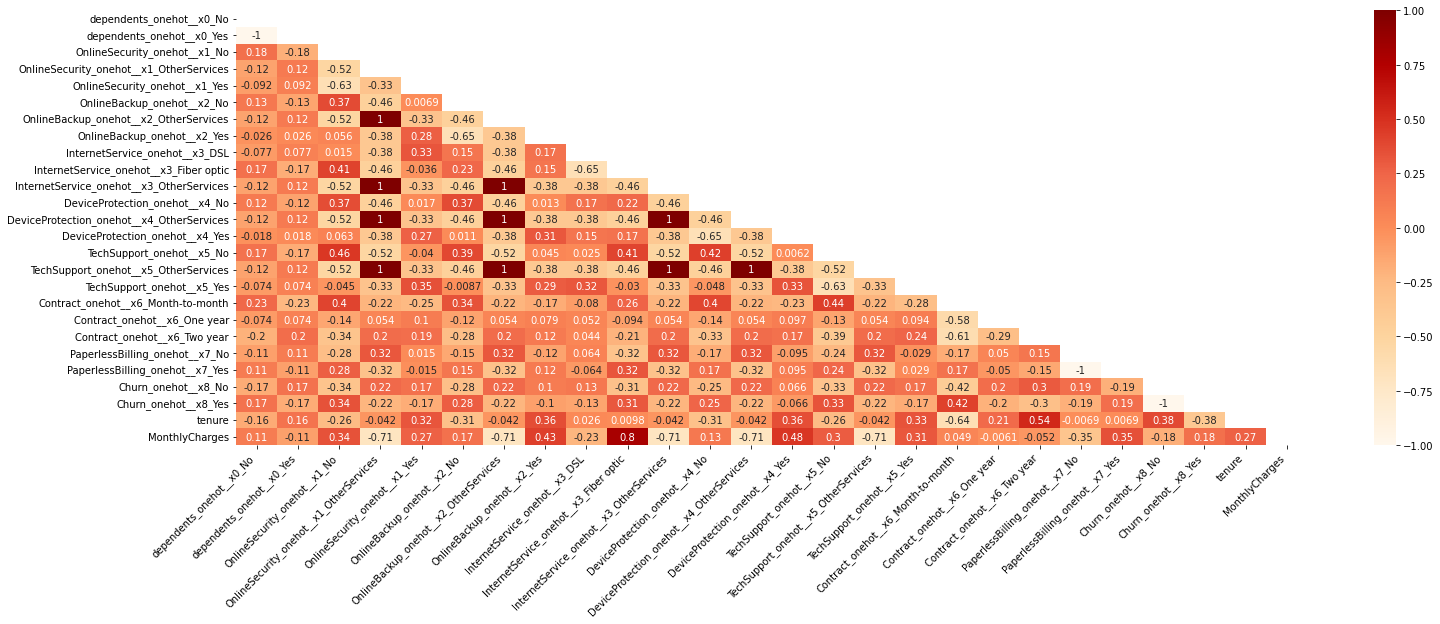

In [57]:
# calculate correlation using spearman
dummies_corr = df_dummies.corr(method = "spearman")

# rules untuk membuat heatmap menjadi tidak kotak
mask = np.triu(np.ones_like(dummies_corr))

# membuat heatmap
plt.figure(figsize = (24,8))
sns.heatmap(dummies_corr, cmap="OrRd", annot = True, mask = mask)
plt.xticks(rotation = 45, ha = "right")
plt.show()

<a id="insight_all_feature_heatmap"></a>
***ALL FEATURE HEATMAP INSIGHT***<br>
Dari *heatmap* ini ada beberapa hal yang bisa didapat diantaranya:
* Value kategorikal *OtherServices* pada *feature OnlineBackup, InternetServices, DeviceProtection, TechSuppor dan OnlineSecurity* memiliki korelasi absolut (kuat korelasi = 1). Jadi korelasi *OtherServices* dari tiap *feature* adalah sama
* variabel yang paling berkorelasi terhadap *feature tenure* (lamanya *customer* berlangganan) adalah contract_onehot_x6_Two year. Hal ini cukup *make sense*. untuk *customer* yang menerapkan kontrak 2 tahunan sudah berlangganan cukup lama dan untuk perpanjangan tetap menggunakan kontrak 2 tahunan. Hal ini telah dijelaskan juga pada bagian *feature contract*. Untuk melihat penjelasan *feature contract* dan hubungan antara jenis kontrak dan *tenure* dapat melihat pada [***bagian ini***](#contract65456)<br><br>

* Jika kita lihat pada *heatmap*, *feature InternetServices_onehot_x3_fiber_optic* & *feature InternetServices_onehot_x3_OtherServices* berkorelasi paling kuat dengan *MonthlyCharges*. 
* tapi arah korelasinya untuk *feature InternetServices_onehot_x3_fiber_optic* adalah positif dengan besar korelasi di angka 0.8, yang berarti nilai *MonthlyCharges* akan semakin tinggi bila menggunakan *fiber optic* 
* tapi arah korelasinya untuk *feature InternetServices_onehot_x3_OtherServices* adalah negatif dengan besar korelasi di angka 0.7, yang berarti nilai *MonthlyCharges* akan semakin rendah bila menggunakan *other services*

***CHURN BY INTERNETSERVICES & MONTHLYCHARGES***
<a id="insight_churn_by_internetservices&monthlycharges"></a>

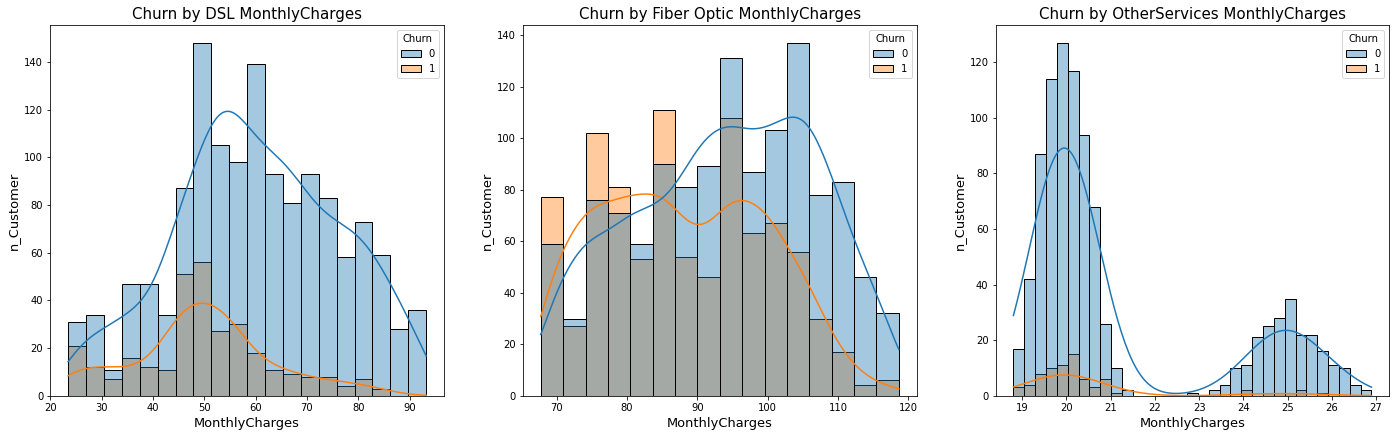

Median MonthlyCharges for DSL : 56.15
Median MonthlyCharges for DSL : 91.775
Median MonthlyCharges for DSL : 20.15


In [58]:
plt.figure(figsize = (24,15))
plt.subplot(231)
sns.histplot(data = df[df["InternetService"] == "DSL"], x = "MonthlyCharges", hue = "Churn", kde = True, alpha = 0.4)
plt.title("Churn by DSL MonthlyCharges", fontsize = 15)
plt.xlabel("MonthlyCharges", size = 13)
plt.ylabel("n_Customer", size = 13)

plt.subplot(232)
sns.histplot(data = df[df["InternetService"] == "Fiber optic"], x = "MonthlyCharges", hue = "Churn", kde = True, alpha = 0.4)
plt.title("Churn by Fiber Optic MonthlyCharges", fontsize = 15)
plt.xlabel("MonthlyCharges", size = 13)
plt.ylabel("n_Customer", size = 13)

plt.subplot(233)
sns.histplot(data = df[df["InternetService"] == "OtherServices"], x = "MonthlyCharges", hue = "Churn", kde = True, alpha = 0.4)
plt.title("Churn by OtherServices MonthlyCharges", fontsize = 15)
plt.xlabel("MonthlyCharges", size = 13)
plt.ylabel("n_Customer", size = 13)

plt.show()

print("Median MonthlyCharges for DSL :", df[df["InternetService"] == "DSL"]["MonthlyCharges"].median())
print("Median MonthlyCharges for DSL :", df[df["InternetService"] == "Fiber optic"]["MonthlyCharges"].median())
print("Median MonthlyCharges for DSL :", df[df["InternetService"] == "OtherServices"]["MonthlyCharges"].median())

***INSIGHT CHURN BY INTERNET SERVICES & MONTHLYCHARGES***<br>
* Grafik diatas memperlihatkan range harga untuk produk DSL, *fiber optic* dan *OtherServices* yang disediakan oleh TELCO. 
* Hal ini *inline* dengan korelasi yang ditampilkan pada *heatmap* sebelumnya. Untuk penggunaan produk *fiber optik* menyebabkan nilai *MonthlyCharges* semakin besar. dan untuk produk *OtherServices* menyebabkan nilai *MonthlyCharges* semakin kecil.
* produk *fiber optic* memiliki harga yang signifikan lebih tinggi dibandingkan produk DSL (\\$35 lebih rendah) dan *OtherServices* (\\$71 lebih rendah). 
* Hal yang dijelaskan diatas *inline* dengan *scatterplot* antara *feature tenure & MonthlyCharges* yang ditunjukan [***disini***](#3.2.1.scatterplot_numerical)<br><br>
<a id="churnbyinternetservicestenure"></a>

<a id="3.2.4"></a>
<font color="lightseagreen" size=+2><b>3.2.4. CURRENT CONCLUSION ABOUT OUR DATA</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>
<a id="3.2.2_en"></a>

* Berdasarkan [***boxplot yang ada***](#3.2.1.numeric_hist_boxplot) untuk *numerical feature tenure dan MonthlyCharges* tidak ada *outliers*
* *Numerical feature* yang ada (*tenure & monthlyCharges*) menunjukan korelasi yang lemah. Tapi berdasrkan [***scatterplot  yang ada***](#3.2.1.scatterplot_numerical) untuk *productline* *fiber optic* dan DSL menunjukan trend peningkatan MonthlyCharges (peningkatan cukup landai, tidak signifikan). untuk *OtherServices* cenderung flat.
* *Numerical feature* yang ada (*tenure & monthlyCharges*) menunjukan korelasi yang lemah dengan target *variable churn*
* Untuk *product line* DSL dan *Fiber Optic* ada trend kenaikan *MonthlyCharges* walaupun cukup landai [***cek scatterplot ini***](#3.2.1.scatterplot_numerical)<br><br>

* Dari keseluruhan analisa yang telah dilakukan sebelumnya. Kuat dugaan bahwa *customer churn* disebabkan beberapa hal sebagai berikut :
    * *Customer Churn* didominasi oleh *customer* pengguna layanan *fiber optic*. (Untuk layanan DSL dan *OtherServices* relative lebih sedikit, maka dari itu saya hanya fokus men *state* *customer* yang menggunakan layanan *fiber optic* saja).
    * Untuk *customer* yang menggunakan layanan *fiber optic* saya asumsikan ada hal hal yang menyebabkan *customer* pengguna layanan *fiber optic* itu *churn* seperti tidak menerima *services* sesuai dengan harapan mereka atau tidak sesuai dengan preferensi mereka ditambah dengan harga yang tinggi seperti yang kita temukan pada analisis sebelumnya, Mungkin ada kompetitor lain yang memberikan layanan *fiber optic* yang lebih baik dan sebagainya. Faktor faktor lain sudah dijelaskan dibeberapa bagian pada notebook ini. Tapi prinsipnya demikian.
    * *Churn* ini terjadi baik pada *customer* baru maupun *customer* lama (dilihat dari *tenure* nya)dan jumlahnya seperti yang disebutkan diatas cukup signifikan dan konsisten. Dengan jumlah *churn* terbanyak pada *customer* baru dan *churn* terlihat konsisten untuk *customer* lama.
    * Beberapa grafik yang telah dimunculkan diatas [***grafik1***](#churn_by_contract_&tenure) [***grafik2***](#3.2.1.numeric_hist_boxplot), untuk 5 bulan awal (*tenure = 5*), jumlah *customer* yang *churn* relatif banyak dari *customer* dengan layanan *fiber optic*, DSL, dan *Otherservices*. harus ada evaluasi untuk menjelaskan kenapa cukup banyak *customer churn* pada waktu tersebut. kemudian rencana tindak lanjut perbaikan.
    * Lalu kita lihat dari jenis kontraknya. *customer* dominanasi dengan pengguna kontrak bulanan. Hal ini dapat memperkuat dugaan diatas. Jadi jika ada hal hal yang tidak sesuai dengan keinginan *customer*, maka *customer* dapat *churn* pada bulan itu juga. 
    * Hal ini dapat mengindikasikan bahwa pelayanan TELCO terutama di layanan *fiber optic* kurang begitu memuaskan karena tingkat *churn* nya relative tinggi dan konsisten.<br><br>

* Tapi jika dilihat dari *customer* yang TIDAK *churn*, ada perubahan kontrak *customer* yang awalnya bulanan menjadi tahunan, lalu menjadi 2 tahunan.
* Ini berarti ada juga *customer* yang cocok dengan layanan yang diberikan TELCO.<br><br>

* Dari hasil uji hipotesa yang saya lakukan pada [***bagian ini***](#3.2.2.mappingchurncustomer), Kontrak bulanan (*feature - Contract - Monthtomonth) dapat menjelaskan **HAMPIR 90%** *churn* yang terjadi berdasarkan kategorikal *feature* lain yang ada.<br><br>
* *PaperlessBilling* saya asumsikan BUKAN sebagai salah satu feature yang tidak menentukan *customer churn* atau tidak. Karena *paperless* atau tidak, tidak memberikan *benefit* apapun kepada *customer* (benefit ada dari *convenient* saja, bukan alasan utama untuk menggunakan layanan TELCO)
* *feature* kategorikal lain (selain 'Contract') seperti 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport' masih saya pertimbangkan untuk dianalisa pada tahap selanjutnya.

<a id="4"></a>
<font color="lightseagreen" size=+3><b>4. MACHINE LEARNING</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

<a id="4.1"></a>
<font color="lightseagreen" size=+2><b>4.1. DATA PREPARATION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

Dari yang telah kita pelajari dari data kita sebelumnya :
* Berdasarkan penjelasan yang telah diberikan pada bagian [***BusinessUnderstanding - Confussion Matrix***](#1.confussionmatrix) Dari kasus yang kita hadapi yaitu *customer churn*, Metric yang menjadi perhatian utama adalah adalah *recall*.

* Proses *data cleaning* dan *data interpretation* telah kita lakukan pada tahapan sebelumnya. Data dapat digunakan untuk masuk ke pemodelan.
* Data yang sudah ada saya susun kolomnya sedemikian rupa untuk memudahkan pengolahan data.<br><br>

* *feature numerical tenure & MonthlyCharges* tidak ada *outliers*. saya akan menggunakan *MinMaxScaler* pada model ini.
* Data *customer churn* TELCO adalah imbalance (*Churn : Not Churn* adalah 27% : 73%), jadi kita perlu *handling imbalance* 
* Jumlah kategori dari *feature* yang ada tidak terlalu banyak sehingga cukup di *OneHotEncoding*<br><br>

* *PaperlessBilling* saya asumsikan tidak menyebabkan customer *churn*. *feature paperless billing* akan saya drop.
* Selebihnya akan dijelaskan sambil berproses

In [59]:
# menyusun kolom untuk memudahkan analisis
df = df[categorical_f + numerical_f + target]

# drop feature paperlessbilling
df.drop("PaperlessBilling", axis = 1, inplace = True)
df.head(5)

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,tenure,MonthlyCharges,Churn
0,Yes,No,No,DSL,Yes,Yes,Month-to-month,9,72.90,1
1,No,No,Yes,Fiber optic,Yes,No,Month-to-month,14,82.65,0
2,No,Yes,No,DSL,Yes,Yes,Two year,64,47.85,1
3,No,Yes,Yes,DSL,Yes,Yes,Two year,72,69.65,0
4,No,OtherServices,OtherServices,OtherServices,OtherServices,OtherServices,Month-to-month,3,23.60,0


In [60]:
# menyiapkan variabel yang akan di OneHotEncoding dan di scaling.
ohe_var = ["Dependents", "OnlineSecurity", "OnlineBackup", "InternetService", "DeviceProtection", "TechSupport", "Contract"]
mm_sc_var = ["tenure", "MonthlyCharges"]
target = ["Churn"]

In [61]:
# menyiapkan metode preprocessing yang akan digunakan
transformer = ColumnTransformer([
    ("ohe", OneHotEncoder(drop = "first"), ohe_var),
    ("mm_sc", MinMaxScaler(), mm_sc_var)]
    , remainder = "passthrough")

In [62]:
# Menyiapkan data X dan Y
X = df[["Dependents", "OnlineSecurity", "OnlineBackup", "InternetService", "DeviceProtection", "TechSupport", "Contract", "tenure", "MonthlyCharges"]]
Y = df["Churn"]

In [63]:
# Split data untuk data training dan testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 8888)

In [64]:
# menampilkan hasil train test split
display_side_by_side(X_train.head(5), X_test.head(5), titles = ["X Data Train", "X Data Test"])
display_side_by_side(pd.DataFrame(Y_train, columns = ["Churn"]).head(5), pd.DataFrame(Y_test, columns = ["Churn"]).head(5), titles = ["TargetTrain", "TargetTest"])

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,tenure,MonthlyCharges
246,No,Yes,No,DSL,Yes,Yes,Month-to-month,15,58.95
2331,No,Yes,No,DSL,Yes,Yes,One year,49,84.35
1376,No,No,No,DSL,Yes,No,Month-to-month,45,50.25
1086,No,OtherServices,OtherServices,OtherServices,OtherServices,OtherServices,Two year,6,19.55
461,No,OtherServices,OtherServices,OtherServices,OtherServices,OtherServices,Two year,40,20.60
,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,tenure,MonthlyCharges
353,No,No,Yes,Fiber optic,No,No,One year,69,95.65
269,No,No,No,Fiber optic,Yes,No,Month-to-month,29,98.60
4425,Yes,No,No,DSL,Yes,Yes,One year,18,54.40
3977,Yes,Yes,Yes,DSL,Yes,No,Two year,72,70.65


,Churn
246,0
2331,1
1376,0
1086,0
461,0
,Churn
353,0
269,1
4425,0
3977,0


<a id="4.2"></a>
<font color="lightseagreen" size=+2><b>4.2. BASE MODEL EVALUATION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

* Pada bagian ini akan didefinisikan model model yang akan digunakan. 
* Model model tersebut masih menggunakan *default parameter*
* Kita akan melihat hasil base model berdasarkan *cross validasi* dan *test data*.

<a id="4.2.basemodel"></a>
***MENDEFINSIKAN MODEL YANG AKAN DIGUNAKAN***

In [65]:
# Baseline model, default model
base_m_logreg = LogisticRegression(random_state = 8888)
base_m_knn = KNeighborsClassifier()
base_m_dt = DecisionTreeClassifier(random_state = 8888)

# boosting
# random forest
base_m_rf = RandomForestClassifier(random_state = 8888)

# Adaboost
tree_ada_base = DecisionTreeClassifier(random_state = 8888)
base_m_tree_ada = AdaBoostClassifier(tree_ada_base, random_state = 8888)

# GradientBoost
base_m_gbc = GradientBoostingClassifier(random_state = 8888)

# XGBoost
base_m_xgb = XGBClassifier(random_state = 8888)

# berikut beberapa penamaan yang disiapkan untuk digunakan pada bagian selanjutnya.

# compile basic model yang sudah dibuat dalam sebuah list
base_m_compile = [base_m_logreg, base_m_knn, base_m_dt, base_m_rf, base_m_tree_ada, base_m_gbc, base_m_xgb]

# nama classfier yang disimpan secara berurutan
model_name = ["Logreg", "KNN", "DT", "RF", "AB", "GB", "XGB"]

# base model
base_m_name = ["base_m_logreg", "base_m_knn", "base_m_dt", "base_m_rf", "base_m_tree_ada", "base_m_gbc", "base_m_xgb"]

# base model + oversampling
base_m_oversamp_name = ["oversamp_base_m_logreg", "oversamp_base_m_knn", "oversamp_base_m_dt", "oversamp_base_m_rf", 
                        "oversamp_base_m_tree_ada", "oversamp_base_m_gbc", "oversamp_base_m_xgb"]

# base model + undersampling 
base_m_undersamp_name = ["undersamp_base_m_logreg", "undersamp_base_m_knn", "undersamp_base_m_dt", "undersamp_base_m_rf", "undersamp_base_m_tree_ada",
                         "undersamp_base_m_gbc", "undersamp_base_m_xgb"]

<a id="4.2.cv_basemodel"></a>
***BENCHMARKING MODEL MENGGUNAKAN CROSS VALIDASI***

In [66]:
# mendefinsikan metode cross validasi yang akan digunakan
# metode cross validasi ini akan digunakan berkali kali pada bagian selanjutnya. jadi tidak didefinisikan ulang.
skfold = StratifiedKFold(n_splits = 10)

# buat list untuk menampung hasil cross validasi base model 
cv_base_model_best_score = []

# penamaan yang disiapkan untuk memberi nama kolom pada dataframe
cv_col_metrics_ = ["base_cv.recall.mean", "base_cv.recall.std",
                "base_cv.avg_prec.mean", "base_cv.avg_prec.std",
                "base_cv.precision.mean", "base_cv.precision.std",
                "base_cv.acc.mean", "base_cv.acc.std"]

# kita gunakan forloop untuk menghitung melakukan cross validasi
for base_model in base_m_compile:
    
    # mendefinsikan pipemodel
    model_pipe = Pipeline([
        ("preprocessing",transformer),
        ("model", base_model)
        ])
    
    # cross validasi, urutan value yang dikeluarkan, recall.mean, recall.std, ap.mean, ap.std, precision.mean, precision.std, acc.mean, acc.std
    # disini saya menggunakan cross validate agar dapat mengeluarkan beberapa metric sekaligus
    base_model_cv = cross_validate(model_pipe, X_train, Y_train, cv = skfold, scoring = ["accuracy", "recall", "precision", "average_precision"], n_jobs = -1)
    
    # cross validasi disipan dalam list yang telah disiapkan sebelumnya
    cv_base_model_best_score.append([base_model_cv["test_recall"].mean(), base_model_cv["test_recall"].std(),
                             base_model_cv["test_average_precision"].mean(), base_model_cv["test_average_precision"].std(),
                             base_model_cv["test_precision"].mean(), base_model_cv["test_precision"].std(),
                             base_model_cv["test_accuracy"].mean(), base_model_cv["test_accuracy"].std()])

# membuat dataframe rekap hasil base model
df_base_m_cv_score = (pd.DataFrame(cv_base_model_best_score, columns = cv_col_metrics_, index = base_m_name) * 100).round(5)

# print output dengan format yang baik
display_side_by_side(df_base_m_cv_score, titles = ["Basic Model | Cross Validation Result"])

,base_cv.recall.mean,base_cv.recall.std,base_cv.avg_prec.mean,base_cv.avg_prec.std,base_cv.precision.mean,base_cv.precision.std,base_cv.acc.mean,base_cv.acc.std
base_m_logreg,50.77670,3.52870,65.55421,3.07741,62.86835,2.95193,78.95403,1.20544
base_m_knn,48.15534,3.19652,53.03976,2.93358,57.63945,3.28709,76.84202,1.44630
base_m_dt,49.51456,3.13097,38.29784,1.34509,49.54858,2.70752,73.13207,1.39873
base_m_rf,46.69903,4.47972,57.67734,3.40662,58.51942,4.44535,76.99633,1.76025
base_m_tree_ada,45.82524,3.38555,49.14620,4.11193,51.14613,4.59739,73.90447,2.16122
base_m_gbc,49.80583,4.34296,64.42212,4.42165,63.75265,4.94453,79.00545,1.59667
base_m_xgb,48.73786,3.67909,58.23742,4.92276,56.16914,5.17467,76.19782,2.33425


***BENCHMARKING MODEL MENGGUNAKAN DATA TEST***

In [67]:
# buat list untuk menampung hasil test base model
base_model_test_score = []

# menyiapkan nama kolom untuk dataframe output hasil test
test_col_metrics_ = ["base_test_recall", "base_test_avg_prec", "base_test_precision", "base_test_acc"]


# kita gunakan forloop untuk menghitung melakukan predict hasil test
# beberapa variabel telah disiapkan sebelumnya seperti base_m_name dan base_m_compile
for modelname, model in zip(base_m_name, base_m_compile):
    
    # mendefinsikan pipemodel
    model_pipe = Pipeline([
        ("preprocessing",transformer),
        ("model", model)
        ])
    
    # training model
    model_pipe.fit(X_train, Y_train)
    
    # predict class & proba
    # predict proba yang dilakukan adalah ke kelas 1. 
    Y_pred_proba_ = model_pipe.predict_proba(X_test)[:,1]
    
    # predict class
    Y_pred_class_ = model_pipe.predict(X_test)
    
    # hasil scoring disimpan dalam sebuah list
    base_model_test_score.append([recall_score(Y_test, Y_pred_class_), # recall menggunakan Y_pred_class
                                      average_precision_score(Y_test, Y_pred_proba_), # AP menggunakan Y_pred_proba
                                      precision_score(Y_test, Y_pred_class_), # precision menggunakan Y_pred_class
                                      accuracy_score(Y_test, Y_pred_class_)]) # acc menggunakan Y_pred_class
    
    # mengeluarkan classification report default untuk melihat keseluruhan hasil yang ada
    print("--"*32)
    print(f"{modelname}")
    print("--"*32)    
    print(classification_report(Y_test, Y_pred_class_), "\n\n")

# hasil scoring dibuat dalam bentuk dataframe
df_base_m_test_score = (pd.DataFrame(base_model_test_score, index = base_m_name, columns = test_col_metrics_) * 100).round(5)

# print output dataframe dengan format yang baik
display_side_by_side(df_base_m_test_score, titles = ["Basic Model | Test Result"])

----------------------------------------------------------------
base_m_logreg
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       713
           1       0.63      0.55      0.59       258

    accuracy                           0.79       971
   macro avg       0.74      0.72      0.72       971
weighted avg       0.79      0.79      0.79       971
 


----------------------------------------------------------------
base_m_knn
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       713
           1       0.58      0.52      0.55       258

    accuracy                           0.77       971
   macro avg       0.71      0.69      0.70       971
weighted avg       0.77      0.77      0.77       971
 


-------------------------------------------------------

,base_test_recall,base_test_avg_prec,base_test_precision,base_test_acc
base_m_logreg,54.65116,65.36771,62.94643,79.40268
base_m_knn,52.32558,53.58780,58.44156,77.44593
base_m_dt,44.96124,36.60101,48.13278,72.50257
base_m_rf,45.34884,57.52666,59.39086,77.23996
base_m_tree_ada,50.38760,52.93528,57.77778,77.03399
base_m_gbc,59.30233,66.46053,64.28571,80.43254
base_m_xgb,51.93798,62.24707,61.18721,78.47580


<a id="4.3"></a>
<font color="lightseagreen" size=+2><b>4.3. BASE MODEL WITH OVERSAMPLING</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

* Kurang lebih sama dengan yang akan dilakukan pada 4.2, tapi pada bagian ini ada 1 proses tambahan pada pipeline yaitu penambahan step *Oversampling*.
* [**Pipeline**](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) yang digunakan sudah merupakan *package* dari *imblearn* sehingga proses *fit.resample* dan *fit_transform* bisa dilakukan secara sekuensial.
* Untuk metode *oversampling* yang digunakan adalah [**SMOTENC**](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html) karena dilihat dari data yang kita miliki, kita memiliki fitur kategorikal dan numerikal. 
* Secara umum kita akan menggunakan step yang telah diberikan pada [**bagian ini**](#4.2.cv_basemodel), tapi perlu menambahkan step oversampling
* Base model yang telah didefinsikan dapat dilihat [**disini**](#4.2.basemodel)

***BENCHMARKING MODEL + OVERSAMPLING MENGGUNAKAN CROSS VALIDASI***

In [68]:
X_train.head(1)

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,tenure,MonthlyCharges
246,No,Yes,No,DSL,Yes,Yes,Month-to-month,15,58.95


In [69]:
# Sebelum mendefinsikan metode oversamplingnya yaitu SMOTENC
# SMOTENC untuk parapmeter categorical feature. inputnya adalah index kolom kategorikal, jadi disini saya state terlebih dahulu index kategorikal kolommnya
# yang diinput adalah indexnya, jadi melihat kolom diatas, kita tau mana saja index kolom dengan data kategorikal
cat_col_index = [0, 1, 2, 3, 4, 5, 6]

# baru definsikan metode resamplingnya
smote_nc = SMOTENC(categorical_features = cat_col_index, random_state = 8888)

# list untuk menyimpan score model hasil oversampling
cv_base_model_oversampling_best_score = []

# penamaan saja untuk pembuatan dataframe nantin
cv_col_metrics_ = ["ovrsm_cv.recall.mean", "ovrsm_cv.recall.std",
                "ovrsm_cv.avg_prec.mean", "ovrsm_cv.avg_prec.std",
                "ovrsm_cv.precision.mean", "ovrsm_cv.precision.std",
                "ovrsm_cv.acc.mean", "ovrsm_cv.acc.std"]

# dengan forloop, menghitung score model yang telah dioversampling.
for base_model in base_m_compile:
    
    # mendefinsikan pipemodel, pipe sudah menggunakan imblearn. 
    # jadi bisa input bersamaan proses resamplingnya.
    model_pipe_oversamp = Pipeline([
        ("oversampling", smote_nc),
        ("preprocessing",transformer),
        ("model", base_model)
        ])
    
    # cross validasi
    # urutan value yang dikeluarkan
    # recall.mean, recall.std, ap.mean, ap.std, precision.mean, precision.std, acc.mean, acc.std
    oversamp_base_model_cv = cross_validate(model_pipe_oversamp, X_train, Y_train, cv = skfold, scoring = ["accuracy", "recall", "precision", "average_precision"], n_jobs = -1)
    cv_base_model_oversampling_best_score.append([oversamp_base_model_cv["test_recall"].mean(), oversamp_base_model_cv["test_recall"].std(),
                             oversamp_base_model_cv["test_average_precision"].mean(), oversamp_base_model_cv["test_average_precision"].std(),
                             oversamp_base_model_cv["test_precision"].mean(), oversamp_base_model_cv["test_precision"].std(),
                             oversamp_base_model_cv["test_accuracy"].mean(), oversamp_base_model_cv["test_accuracy"].std()])

# membuat dataframe dari hasil yang ada
df_base_m_oversampling_cv_score = (pd.DataFrame(cv_base_model_oversampling_best_score, columns = cv_col_metrics_, index = base_m_oversamp_name) * 100).round(5)

# Output dataframe
display_side_by_side(df_base_m_oversampling_cv_score, titles = ["Basic Model - Oversampling(SMOTENC) | Cross Validation Result"])

,ovrsm_cv.recall.mean,ovrsm_cv.recall.std,ovrsm_cv.avg_prec.mean,ovrsm_cv.avg_prec.std,ovrsm_cv.precision.mean,ovrsm_cv.precision.std,ovrsm_cv.acc.mean,ovrsm_cv.acc.std
oversamp_base_m_logreg,79.12621,3.22733,65.30557,3.30107,51.90070,2.14260,74.96170,1.67968
oversamp_base_m_knn,66.99029,3.10072,49.99425,2.98358,49.70768,2.41749,73.18528,1.71888
oversamp_base_m_dt,58.73786,2.61416,38.81819,1.53215,47.20588,2.30383,71.53566,1.63193
oversamp_base_m_rf,57.86408,3.22587,55.68575,3.96842,52.00050,3.50037,74.54953,2.02100
oversamp_base_m_tree_ada,59.61165,4.43212,48.92920,4.99342,49.23461,3.00280,72.87447,1.97040
oversamp_base_m_gbc,78.05825,3.47893,65.13394,3.15898,51.67641,1.73604,74.73008,1.38867
oversamp_base_m_xgb,70.19417,4.65716,59.06910,3.97468,50.81743,2.14553,74.03400,1.49729


***BENCHMARKING MODEL + OVERSAMPLING MENGGUNAKAN DATA TEST***

In [70]:
# membuat list kosong untuk menampung hasil test base model oversampling dengan data test
base_model_oversmp_test_score = []

# membuat list berisikan nama kolom untuk dataframe untuk rekap hasil nanti
test_col_metrics_ = ["ovrsm_test_recall", "ovrsm_test_avg_prec", "ovrsm_test_precision", "ovrsm_test_acc"]

# training model dilakukan dengan bantuan forloop
for modelname, model in zip(base_m_name, base_m_compile):
    
    # mendefinsikan pipemodel
    model_pipe_oversamp = Pipeline([
        ("oversampling", smote_nc),
        ("preprocessing",transformer),
        ("model", model)
        ])
    
    # training model
    model_pipe_oversamp.fit(X_train, Y_train)
    
    # predict class & proba untuk model oversampling
    Y_pred_oversm_proba_ = model_pipe_oversamp.predict_proba(X_test)[:,1]
    Y_pred_oversm_class_ = model_pipe_oversamp.predict(X_test)
    
    # scoring
    base_model_oversmp_test_score.append([recall_score(Y_test, Y_pred_oversm_class_), # recall menggunakan Y_pred_class
                                      average_precision_score(Y_test, Y_pred_oversm_proba_), # AP menggunakan Y_pred_proba
                                      precision_score(Y_test, Y_pred_oversm_class_), # precision menggunakan Y_pred_class
                                      accuracy_score(Y_test, Y_pred_oversm_class_)]) # acc menggunakan Y_pred_class
    
    # classification report tiap classifiernya
    print("--"*32)
    print(f"SMOTENC {modelname}")
    print("--"*32)    
    print(classification_report(Y_test, Y_pred_oversm_class_), "\n\n")
    
# membuat dataframe dari hasil yang ada
df_base_m_oversmp_test_score = (pd.DataFrame(base_model_oversmp_test_score, index = base_m_oversamp_name, columns = test_col_metrics_) * 100).round(5)

# Output dataframe
display_side_by_side(df_base_m_oversmp_test_score, titles = ["Basic Model - Oversampling(SMOTENC) | Test Result"])

----------------------------------------------------------------
SMOTENC base_m_logreg
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       713
           1       0.50      0.78      0.61       258

    accuracy                           0.74       971
   macro avg       0.70      0.75      0.71       971
weighted avg       0.80      0.74      0.75       971
 


----------------------------------------------------------------
SMOTENC base_m_knn
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       713
           1       0.51      0.70      0.59       258

    accuracy                           0.74       971
   macro avg       0.69      0.73      0.70       971
weighted avg       0.78      0.74      0.75       971
 


---------------------------------------

,ovrsm_test_recall,ovrsm_test_avg_prec,ovrsm_test_precision,ovrsm_test_acc
oversamp_base_m_logreg,78.29457,65.14887,50.37406,73.73841
oversamp_base_m_knn,70.15504,51.92669,50.70028,73.94439
oversamp_base_m_dt,55.81395,39.34632,49.14676,72.91452
oversamp_base_m_rf,60.46512,59.23623,54.92958,76.31308
oversamp_base_m_tree_ada,58.91473,48.28132,52.05479,74.66529
oversamp_base_m_gbc,78.29457,65.47171,50.88161,74.15036
oversamp_base_m_xgb,71.70543,63.76398,54.09357,76.31308


<a id="4.4"></a>
<font color="lightseagreen" size=+2><b>4.4. BASE MODEL WITH UNDERSAMPLING</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

* Kurang lebih sama dengan yang akan dilakukan pada [***4.3***](#4.3), tapi pada bagian ini ada prosesnya adalah *Undersampling*
* [**Pipeline**](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) yang digunakan sudah merupakan *package* dari *imblearn* sehingga proses *fit.resample* dan *fit_transform* bisa dilakukan secara sekuensial.
* Untuk metode *Undersampling* yang digunakan adalah [**RandomUnderSampler**](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html).
* Secara umum kita akan menggunakan step yang telah diberikan pada [**bagian ini**](#4.2.cv_basemodel), tapi perlu menambahkan step *undersampling*
* Base model yang telah didefinsikan dapat dilihat [**disini**](#4.2.basemodel)

***BENCHMARKING MODEL + UNDERSAMPLING MENGGUNAKAN CROSS VALIDASI***

In [71]:
# definisikan metode undersamplingnya
rus = RandomUnderSampler(random_state = 8888)

# list untuk menyimpan score model hasil undersampling
cv_base_model_undersampling_best_score = []

# penamaan saja untuk pembuatan dataframe nantin
cv_col_metrics_ = ["undrsm_cv.recall.mean", "undrsm_cv.recall.std",
                "undrsm_cv.avg_prec.mean", "undrsm_cv.avg_prec.std",
                "undrsm_cv.precision.mean", "undrsm_cv.precision.std",
                "undrsm_cv.acc.mean", "undrsm_cv.acc.std"]

# dengan forloop, menghitung score model yang telah undersampling
for base_model in base_m_compile:
    
    # mendefinsikan pipemodel
    model_pipe_undersamp = Pipeline([
        ("undersampling", rus),
        ("preprocessing",transformer),
        ("model", base_model)
        ])
    
    # cross validasi
    # urutan value yang dikeluarkan
    # recall.mean, recall.std, ap.mean, ap.std, precision.mean, precision.std, acc.mean, acc.std
    undersamp_base_model_cv = cross_validate(model_pipe_undersamp, X_train, Y_train, cv = skfold, scoring = ["accuracy", "recall", "precision", "average_precision"], n_jobs = -1)
    cv_base_model_undersampling_best_score.append([undersamp_base_model_cv["test_recall"].mean(), undersamp_base_model_cv["test_recall"].std(),
                             undersamp_base_model_cv["test_average_precision"].mean(), undersamp_base_model_cv["test_average_precision"].std(),
                             undersamp_base_model_cv["test_precision"].mean(), undersamp_base_model_cv["test_precision"].std(),
                             undersamp_base_model_cv["test_accuracy"].mean(), undersamp_base_model_cv["test_accuracy"].std()])

# membuat dataframe dari hasil yang ada
df_base_m_undersampling_cv_score = (pd.DataFrame(cv_base_model_undersampling_best_score, columns = cv_col_metrics_, index = base_m_undersamp_name) * 100).round(5)

# print output
display_side_by_side(df_base_m_undersampling_cv_score, titles = ["Basic Model - UnderSampling(RUS) | Cross Validation Result"])

,undrsm_cv.recall.mean,undrsm_cv.recall.std,undrsm_cv.avg_prec.mean,undrsm_cv.avg_prec.std,undrsm_cv.precision.mean,undrsm_cv.precision.std,undrsm_cv.acc.mean,undrsm_cv.acc.std
undersamp_base_m_logreg,80.67961,3.23317,65.25232,3.73221,51.70043,2.35828,74.80766,1.89812
undersamp_base_m_knn,73.59223,3.35760,50.60079,1.26900,47.68408,2.42278,71.48497,2.07855
undersamp_base_m_dt,67.18447,4.71249,38.39746,2.93113,43.99415,3.66068,68.47209,3.11381
undersamp_base_m_rf,71.16505,4.83589,56.93757,4.10699,48.68188,3.27363,72.33542,2.55358
undersamp_base_m_tree_ada,68.05825,5.01576,51.98731,4.86221,45.26370,2.92822,69.60446,2.47262
undersamp_base_m_gbc,78.44660,4.02181,64.25476,2.92065,50.59829,2.69432,73.82888,2.26485
undersamp_base_m_xgb,74.07767,3.71097,56.76218,3.64667,47.58191,1.98216,71.38115,1.80212


***BENCHMARKING MODEL + UNDERSAMPLING MENGGUNAKAN DATA TEST***

In [72]:
# membuat list kosong untuk menampung hasil prediksi
base_model_undersam_test_score = []

# membuat list yang berisi nama kolom untuk dataframe nanti
test_col_metrics_ = ["undrsm_test_recall", "undrsm_test_avg_prec", "undrsm_test_precision", "undrsm_test_acc"]

# untuk melakukan prediksi terhadap sejumlah model, dibantu dengan forloop
for modelname, model in zip(base_m_name, base_m_compile):
    
    # mendefinsikan pipemodel
    model_pipe_undersamp = Pipeline([
        ("undersampling", rus),
        ("preprocessing",transformer),
        ("model", model)
        ])
    
    # training model
    model_pipe_undersamp.fit(X_train, Y_train)
    
    # predict class dan proba, ingat prediksi kelas 1. 
    Y_pred_undersm_proba_ = model_pipe_undersamp.predict_proba(X_test)[:,1]
    Y_pred_undersm_class_ = model_pipe_undersamp.predict(X_test)
    
    # scoring
    base_model_undersam_test_score.append([recall_score(Y_test, Y_pred_undersm_class_), # recall butuh Y pred class
                                      average_precision_score(Y_test, Y_pred_undersm_proba_), # AP butuh Y pred proba
                                      precision_score(Y_test, Y_pred_undersm_class_), # prec butuh Y pred class
                                      accuracy_score(Y_test, Y_pred_undersm_class_)])# acc butuh Y pred class
    
    # classification report
    print("--"*32)
    print(f"RUS {modelname}")
    print("--"*32)    
    print(classification_report(Y_test, Y_pred_undersm_class_), "\n\n")
    
# membuat dataframe dari hasil yang ada
df_base_m_undersam_test_score = (pd.DataFrame(base_model_undersam_test_score, index = base_m_undersamp_name, columns = test_col_metrics_) * 100).round(5)

# printoutput
display_side_by_side(df_base_m_undersam_test_score, titles = ["Basic Model - UnderSampling(RUS) | Test Result"])

----------------------------------------------------------------
RUS base_m_logreg
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       713
           1       0.50      0.79      0.61       258

    accuracy                           0.73       971
   macro avg       0.70      0.75      0.71       971
weighted avg       0.80      0.73      0.75       971
 


----------------------------------------------------------------
RUS base_m_knn
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       713
           1       0.49      0.78      0.60       258

    accuracy                           0.72       971
   macro avg       0.69      0.74      0.69       971
weighted avg       0.79      0.72      0.74       971
 


-----------------------------------------------

,undrsm_test_recall,undrsm_test_avg_prec,undrsm_test_precision,undrsm_test_acc
undersamp_base_m_logreg,79.45736,64.54564,50.00000,73.42945
undersamp_base_m_knn,77.51938,51.81467,48.54369,72.19361
undersamp_base_m_dt,63.56589,36.26426,41.62437,66.63234
undersamp_base_m_rf,72.09302,57.97608,50.00000,73.42945
undersamp_base_m_tree_ada,72.09302,50.64793,45.70025,69.82492
undersamp_base_m_gbc,79.84496,65.11498,50.12165,73.53244
undersamp_base_m_xgb,76.74419,61.69700,50.63939,73.94439


<a id="4.5"></a>
<font color="lightseagreen" size=+2><b>4.5. BASE MODEL OUTPUT RECAP</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

* Bagian ini ingin merekapitulasi output pemodelan yang telah dilakukan pada tahap [**4.2**](#4.2), [**4.3**](#4.3), [**4.4**](#4.4)

***REKAPITULASI HASIL PENGUJIAN CROSS VALIDASI***

In [73]:
# hanya dataframe manipulation. ingat ini untuk data cross validasi terlebih dahulu. untuk datatest ada bagiannya sendiri
# didalam kolom ini, ada 2 buah hasil. hasil scoring dan standar deviasinya

# hasil base model tanpa treatment resampling
recap_cv1 = df_base_m_cv_score.T.reset_index().reset_index()
recap_cv1.columns = ["index", "parameter"] + model_name

# hasil base model dan handle imbalance dengna oversampling SMOTENC
recap_cv2 = df_base_m_oversampling_cv_score.T.reset_index().reset_index()
recap_cv2.columns = ["index", "parameter"] + model_name

# hasil base model dan handle imbalance dengna undersampling RUS
recap_cv3 = df_base_m_undersampling_cv_score.T.reset_index().reset_index()
recap_cv3.columns = ["index", "parameter"] + model_name

In [74]:
# dataframe manipulation

# intinya ke 3 dataframe diatas, mau dijadikan dalam 1 buah dataframe
recap_cv = pd.concat((recap_cv1, recap_cv2, recap_cv3), axis = 0).sort_values(by = ["index", "parameter"], ascending = [True, True])

# penamaan dataframe agar intepretasi mudah
metrics_score_recap_cv = recap_cv[recap_cv["parameter"].str.contains("mean")].drop("index", axis = 1).set_index("parameter")

# print output untuk hasil scoring
display_side_by_side(metrics_score_recap_cv, titles = ["Basic Model - Cross Validation Result Recap"])

,Logreg,KNN,DT,RF,AB,GB,XGB
parameter,,,,,,,
base_cv.recall.mean,50.77670,48.15534,49.51456,46.69903,45.82524,49.80583,48.73786
ovrsm_cv.recall.mean,79.12621,66.99029,58.73786,57.86408,59.61165,78.05825,70.19417
undrsm_cv.recall.mean,80.67961,73.59223,67.18447,71.16505,68.05825,78.44660,74.07767
base_cv.avg_prec.mean,65.55421,53.03976,38.29784,57.67734,49.14620,64.42212,58.23742
ovrsm_cv.avg_prec.mean,65.30557,49.99425,38.81819,55.68575,48.92920,65.13394,59.06910
undrsm_cv.avg_prec.mean,65.25232,50.60079,38.39746,56.93757,51.98731,64.25476,56.76218
base_cv.precision.mean,62.86835,57.63945,49.54858,58.51942,51.14613,63.75265,56.16914
ovrsm_cv.precision.mean,51.90070,49.70768,47.20588,52.00050,49.23461,51.67641,50.81743
undrsm_cv.precision.mean,51.70043,47.68408,43.99415,48.68188,45.26370,50.59829,47.58191


In [75]:
# print output untuk hasil standar deviasinya
std_recap_cv = recap_cv[recap_cv["parameter"].str.contains("std")].drop("index", axis = 1).set_index("parameter")

# print output untuk hasil standar deviasinya 
display_side_by_side(std_recap_cv, titles = ["Basic Model - Cross Validation StandardDeviation Recap"])

,Logreg,KNN,DT,RF,AB,GB,XGB
parameter,,,,,,,
base_cv.recall.std,3.52870,3.19652,3.13097,4.47972,3.38555,4.34296,3.67909
ovrsm_cv.recall.std,3.22733,3.10072,2.61416,3.22587,4.43212,3.47893,4.65716
undrsm_cv.recall.std,3.23317,3.35760,4.71249,4.83589,5.01576,4.02181,3.71097
base_cv.avg_prec.std,3.07741,2.93358,1.34509,3.40662,4.11193,4.42165,4.92276
ovrsm_cv.avg_prec.std,3.30107,2.98358,1.53215,3.96842,4.99342,3.15898,3.97468
undrsm_cv.avg_prec.std,3.73221,1.26900,2.93113,4.10699,4.86221,2.92065,3.64667
base_cv.precision.std,2.95193,3.28709,2.70752,4.44535,4.59739,4.94453,5.17467
ovrsm_cv.precision.std,2.14260,2.41749,2.30383,3.50037,3.00280,1.73604,2.14553
undrsm_cv.precision.std,2.35828,2.42278,3.66068,3.27363,2.92822,2.69432,1.98216


***REKAPITULASI HASIL PENGUJIAN DATA TEST***

In [76]:
# dataframe manipulation untuk datatest, pada datatest, hanya ada hasil scoring. tidak ada standar deviasi.
# prinsipnya sudah dijelaskan pada dataframe bagian cross validasi

# df untuk base model
recap_test1 = df_base_m_test_score.T.reset_index().reset_index()
recap_test1.columns = ["index", "parameter"] + model_name

# df untuk base model dengan handling imbalance oversampling SMOTENC
recap_test2 = df_base_m_oversmp_test_score.T.reset_index().reset_index()
recap_test2.columns = ["index", "parameter"] + model_name

# df untuk base model dengan handling imbalance undersampling RUS
recap_test3 = df_base_m_undersam_test_score.T.reset_index().reset_index()
recap_test3.columns = ["index", "parameter"] + model_name

In [77]:
# ketiga dataframe output test diatas akan ditabulasikan jadi 1 buah dataframe
recap_test = pd.concat((recap_test1, recap_test2, recap_test3), axis = 0).sort_values(by = ["index", "parameter"], ascending = [True, True])

# dataframe manipulation
metrics_score_recap_test = recap_test.drop("index", axis = 1).set_index("parameter")

# print output
display_side_by_side(metrics_score_recap_test, titles = ["Basic Model - Test Result Recap"])

,Logreg,KNN,DT,RF,AB,GB,XGB
parameter,,,,,,,
base_test_recall,54.65116,52.32558,44.96124,45.34884,50.38760,59.30233,51.93798
ovrsm_test_recall,78.29457,70.15504,55.81395,60.46512,58.91473,78.29457,71.70543
undrsm_test_recall,79.45736,77.51938,63.56589,72.09302,72.09302,79.84496,76.74419
base_test_avg_prec,65.36771,53.58780,36.60101,57.52666,52.93528,66.46053,62.24707
ovrsm_test_avg_prec,65.14887,51.92669,39.34632,59.23623,48.28132,65.47171,63.76398
undrsm_test_avg_prec,64.54564,51.81467,36.26426,57.97608,50.64793,65.11498,61.69700
base_test_precision,62.94643,58.44156,48.13278,59.39086,57.77778,64.28571,61.18721
ovrsm_test_precision,50.37406,50.70028,49.14676,54.92958,52.05479,50.88161,54.09357
undrsm_test_precision,50.00000,48.54369,41.62437,50.00000,45.70025,50.12165,50.63939


**KESIMPULAN**
* Berdasarkan penjelasan yang telah diberikan pada bagian [***BusinessUnderstanding - Confussion Matrix***](#1.confussionmatrix) Dari kasus yang kita hadapi yaitu *customer churn* Metric yang menjadi perhatian utama adalah adalah *recall*.<br><br>

* Penjelasan metric dibawah, membandingkan *score* model sebelum dan sesudah di *treatment imbalancenya dengan metode resampling*:
    * Untuk *metric recall*, terjadi peningkatan *score* setelah dilakukan proses *oversampling (SMOTENC) & undersampling (RandomUnerSampling)*, selain itu sebagian besar model yang melalui proses *resampling* relatif lebih stabil (std yang lebih rendah)
    * Untuk *metric AveragePrecision*, tidak ada perubahan *score* yang signifikan setelah dilakukan proses *oversampling (SMOTENC) & undersampling (RandomUnerSampling)*, selain itu sebagian besar model yang melalui proses *resampling* relatif lebih stabil (std yang lebih rendah)
    * Untuk *metric Precision*, terjadi penurunan *score* setelah dilakukan proses *oversampling (SMOTENC) & undersampling (RandomUnerSampling)*, tapi sebagian besar model yang melalui proses *resampling* relatif lebih stabil (std yang lebih rendah)
    * Untuk *metric Accuracy*, *score* relatif konstan setelah dilakukan *resampling* baik *oversampling* ataupun *undersampling*, dari sisi standar deviasi juga relatif konstan.<br><br>

* Perubahan *score* diatas wajar terjadi dikarenakan kelas positif (*customer churn*) datanya kita perbanyak menjadi sama dengan jumlah data dari kelas negatif (*customer TIDAK churn*), dimana ini dapat membuat *recall* dari kelas yang minoritas naik (*which* pada case ini kelas positif adalah kelas minoritas), tapi *precision* turun sebagai dampaknya.<br><br>

* Dari beberapa model yang ada, untuk model yang menghasilkan score *recall* kelas positif dengan deviasi yang paling baik ada diantara model Logistic Regression dan GradientBoostingClassifier dari hasil *oversampling (SMOTENC)*.
* Saya akan mencoba melakukan Hyperparameter Tuning untuk kedua model tersebut untuk melihat model mana yang bisa memberikan hasil yang paling baik

<a id="4.6"></a>
<font color="lightseagreen" size=+2><b>4.6. HYPERPARAMETER TUNING</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

<a id="4.6.1"></a>
<font color="lightseagreen" size=+2><b>4.6.1. HYPERPARAMETER TUNING - LOGISTIC REGRESSION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

[***ABOUT LOGISTIC REGRESSION***](https://www.sciencedirect.com/topics/computer-science/logistic-regression)<br>
`Logistic regression is another powerful supervised ML algorithm used for binary classification problems (when target is categorical). The best way to think about logistic regression is that it is a linear regression but for classification problems. Logistic regression essentially uses a logistic function defined below to model a binary output variable (Tolles & Meurer, 2016). The primary difference between linear regression and logistic regression is that logistic regression's range is bounded between 0 and 1. In addition, as opposed to linear regression, logistic regression does not require a linear relationship between inputs and output variables. This is due to applying a nonlinear log transformation to the odds ratio`

***REFERENCES :*** 
1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
2. https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451
3. https://stackoverflow.com/questions/58815016/cross-validating-with-imblearn-pipeline-and-gridsearchcv
4. https://www.sciencedirect.com/topics/computer-science/logistic-regression

***NOTES :***
* Treatment yang diberikan adalah berdasakran hasil terbaik yang telah dilakukan pada tahap sebelumnya yaitu *oversampling*
* Model, Preprocessor, Pipeline dan lain sebagainya dapat didefinsikan ulang bila diperlukan.<br><br>

* GridSearch yang pertama kali dilakukan dengan paramspace sebagai berikut : 
    * "logreg_HT__penalty" : ["l2", "l1", "elasticnet"],
    * "logreg_HT__C" : [100, 10, 1, 0.1, 0.01, 0.001],  
    * "logreg_HT__random_state" : [8888],
    * "logreg_HT__solver" : ["liblinear", "newton-cg", "sag", "saga", "lbfgs"],
    * "logreg_HT__max_iter" : [10, 100, 200],
    * "logreg_HT__l1_ratio" : [0.2, 0.4, 0.6, 0.8],<br><br>
* dari paramspace tersebut, *best parameter* sebagai berikut 
    * `logreg_HT__C: 0.01,`
    * `logreg_HT__l1_ratio: 0.2,` 
    * `logreg_HT__max_iter: 100,` 
    * logreg_HT__penalty: 'l1', 
    * logreg_HT__random_state: 8888, 
    * logreg_HT__solver: 'saga'
    
* dengan *best score* : 0.828230008984726<br><br>

* Kita akan coba perhalus delta untuk parameter C, l1_ratio, max_iter berdasarkan C, l1_ratio dan max_iter terbaik dari GridSearchCV Pertama kali.
    * "logreg_HT__C" : [1, 0.1, 0.05, 0.01, 0.005, 0.001], 
    * "logreg_HT__max_iter" : [10, 50, 100, 150, 200],
    * "logreg_HT__l1_ratio" : [0.1, 0.15 0.2, 0.25, 0.3],<br>
* Dengan harapan ada peningkatan *score*
* *Running* kedua dengan parameter yang diperhalus tidak ada perubahan *score* yang signifikan. maka bisa dilanjutkan dengan hasil tersebut.

***GRID SEARCH CV LOGISTIC REGRESSION***

In [78]:
# mendefinisikan model Logistic Regression
model_logreg = LogisticRegression(random_state = 8888)

# metode resamplingnya
smote_nc = SMOTENC(categorical_features = cat_col_index, random_state = 8888)

# transformer & skfold menggunakan yang telah didefinsikan sebelumnya

# membuat pipeline untuk Logistic Regression
logregpipe = Pipeline([
    ("oversampling", smote_nc),
    ("preprocessing",transformer),
    ("logreg", model_logreg)
    ])

# membuat hyperparameter space Logistic Regression, ingat parameter default harus ada di paramspace
logreg_param_space = {
    "logreg__penalty" : ["l2", "l1", "elasticnet"],
    "logreg__C" : [1, 0.1, 0.05, 0.01, 0.005, 0.001],  
    "logreg__random_state" : [8888],
    "logreg__solver" : ["liblinear", "newton-cg", "sag", "saga", "lbfgs"],
    "logreg__max_iter" : [10, 50, 100, 150, 200],
    "logreg__l1_ratio" : [0.1, 0.15, 0.2, 0.25, 0.3],
}

# membuat grid search CV untuk Logistic Regression
logreg_grid_Search = GridSearchCV(
                       logregpipe, 
                       param_grid = logreg_param_space,
                       cv = skfold,
                       scoring = "recall",
                       n_jobs = -1)

<IPython.core.display.Javascript object>

In [79]:
# Training Grid Search CV Logistic Regression
logreg_grid_Search.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('oversampling',
                                        SMOTENC(categorical_features=[0, 1, 2,
                                                                      3, 4, 5,
                                                                      6],
                                                random_state=8888)),
                                       ('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                             

In [80]:
# mendapatkan best parameter & best score dari GridSearch CV LogisticRegression
print("Best parameter : ", logreg_grid_Search.best_params_, "\n")
print("best score : ", logreg_grid_Search.best_score_)

Best parameter :  {'logreg__C': 0.01, 'logreg__l1_ratio': 0.1, 'logreg__max_iter': 10, 'logreg__penalty': 'l1', 'logreg__random_state': 8888, 'logreg__solver': 'saga'} 

best score :  0.8233009708737864


In [81]:
# best parameter untuk grid search cv Logreg hyperparameter tuning dalam bentuk dataframe
logreg_best_param_0_8_train = pd.DataFrame(logreg_grid_Search.best_params_, index = [0]).T
logreg_best_param_0_8_train.rename(columns = {0 : "parameter_value"}, inplace = True)
display_side_by_side(logreg_best_param_0_8_train, titles = ["Logreg_Bestparameter - HT - all features"])

,parameter_value
logreg__C,0.01
logreg__l1_ratio,0.1
logreg__max_iter,10
logreg__penalty,l1
logreg__random_state,8888
logreg__solver,saga


In [82]:
# model default sebelum hyperparameter tuning
logregpipe

# mendapatkan model logistic regression dengan parameter terbaik (gridsearch)
logreg_best_model = logreg_grid_Search.best_estimator_

# melihat kelas yang ada
logreg_best_model.classes_

array([0, 1], dtype=int64)

In [83]:
# training model default 
logregpipe.fit(X_train, Y_train)

# training model setelah HT
logreg_best_model.fit(X_train, Y_train)

# mendapatkan hasil prediksi logreg default
Y_pred_class_logreg_default = logregpipe.predict(X_test)
Y_pred_proba_logreg_default = logregpipe.predict_proba(X_test)

# mendapatkan hasil prediksi logreg tuned
Y_pred_class_logreg_tuned = logreg_best_model.predict(X_test)
Y_pred_proba_logreg_tuned = logreg_best_model.predict_proba(X_test)

# print hasilnya recall logreg
print("recall_score LogReg default : ", recall_score(Y_test, Y_pred_class_logreg_default))
print("recall score LogReg tuned : ",recall_score(Y_test, Y_pred_class_logreg_tuned), "\n")

# keluarkan AveragePrecision untuk LogisticRegression, default & Tuned
ap_score_logreg_default = average_precision_score(Y_test, Y_pred_proba_logreg_default[:,1])
ap_score_logreg_tuned = average_precision_score(Y_test, Y_pred_proba_logreg_tuned[:,1])

# print hasilnya average precision logreg
print("Average Precision LogReg default : ",ap_score_logreg_default)
print("Average Precision LogReg tuned : ",ap_score_logreg_tuned)

recall_score LogReg default :  0.7829457364341085
recall score LogReg tuned :  0.813953488372093 

Average Precision LogReg default :  0.6514887329062968
Average Precision LogReg tuned :  0.6393769386321753


<a id="4.6.2"></a>
<font color="lightseagreen" size=+2><b>4.6.2. HYPERPARAMETER TUNING - GRADIENTBOOSTCLASSIFIER</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

[***ABOUT GRADIENT BOOSTING***](https://rcarneva.github.io/understanding-gradient-boosting-part-1.html)<br>
`At a high level, the way GBMs work is by starting with a rough prediction and then building a series of decision trees, with each tree in the series trying to correct the prediction error of the tree before it. There's more detailed descriptions of the mechanics behind the algorithm out there, but this series of posts is intended to give more of an intuitive understanding of what the algorithm does.`

***REFERENCES*** : 
1. https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
2. https://www.machinelearningplus.com/machine-learning/an-introduction-to-gradient-boosting-decision-trees/#:~:text=Using%20a%20low%20learning%20rate,0.3%20gives%20the%20best%20results.
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
4. https://stackoverflow.com/questions/67532613/how-to-define-min-sample-split-and-min-sample-leaf-in-decision-tree-regresso
5. https://rcarneva.github.io/understanding-gradient-boosting-part-1.html

***NOTES*** :
* Treatment yang diberikan adalah berdasakran hasil terbaik yang telah dilakukan pada tahap sebelumnya yaitu *oversampling*
* Model, Preprocessor, Pipeline dan lain sebagainya dapat didefinsikan ulang bila diperlukan.<br><br>

* GridSearch yang pertama kali dilakukan dengan paramspace sebagai berikut : 
    * "gb__learning_rate" : [0.01, 0.05, 0.1, 0.2],
    * "gb__n_estimators" : [100, 200, 300, 400],  
    * "gb__subsample" : [0.8, 0.9, 1],
    * "gb__random_state" : [8888],
    * "gb__max_depth" : [3, 4, 5],
    * "gb__max_features" : [2, 3, 4]<br>

* Dari hasil run dengan *param space* tersebut didapatkan *best parameter* sebagai berikut : 
    * "gb__learning_rate': 0.01, 
    * "gb__n_estimators" : 100, 
    * "gb__subsample" : 0.8} <br>
    * "gb__random_state" : 8888, 
    * "gb__max_depth" : 4, 
    * "gb__max_features" : 3, 

* dengan *best score* : 0.8206558849955077<br><br>

* Dari hasil *running* awal dengan *param space* tersebut, untuk *best parameter* di angka yang menurut saya sudah sesuai. berikut penjelasannya
    * "gb__learning_rate", dengan nilai 0.01 (*default parameter* = 0.1). saya akan mengutip informasi pada  [***web1***](https://www.machinelearningplus.com/machine-learning/an-introduction-to-gradient-boosting-decision-trees/#:~:text=Using%20a%20low%20learning%20rate,0.3%20gives%20the%20best%20results) bahwa  `Using a low learning rate can dramatically improve the perfomance of your gradient boosting model. Usually a learning rate in the range of 0.1 to 0.3 gives the best results.` Dari referal tersebut coba saya kecilkan lagi value untuk learning rate menjadi 0.05 dan 0.01 dan didapatkan *best param untuk learning rate* = 0.01. Menurut saya, nilai *learning rate* itu sudah cukup kecil. Mungkin bisa dikecilkan lagi untuk *improvement* tapi untuk sekarang saya cukup puas dengan angka tersebut. 
    * "gb__n_estimators", dengan nilai 100 (*default parameter* = 100). saya akan mengutip informasi pada  [***scikit-learn***](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) bahwa `The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.` Saya sudah mencoba value n_estimators diatas 100 seperti 200 dan seterusnya, tapi *best_parameters* ada di angka 100. mungkin *n_estimators* bisa dikecilkan lagi yang berarti jumlah *tree* yang di *generate* semakin sedikit, maka dari untuk *n_estimators* cukup di angka 100.
    * "gb__subsample", dengan nilai 0.8 (*default parameter* = 1). saya akan mengutip informasi pada  [***web2***](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/) bahwa `Typical values ~0.8 generally work fine but can be fine-tuned further.` Tapi dari [web scikit-learn](#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) juga menyatakan bahwa `Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.`. dari yang saya pahami, jika *parameter subsample* terus diturunkan untuk *parameter subsample* deviasi akan semakin kecil (yang berarti lebih baik) tapi, Yprediksi akan semakin bias. maka dari itu saya berhenti di angka 0.8 sebagai *best parameter* untuk *subsample*
    * "gb__random_state", saya rasa cukup jelas. untuk mengunci hasil kalkulasi *grid search* agar perubahan *score* yang terjadi adalah karena input kita, bukan karena ke - random - an data.
    * "gb__max_depth", dengan nilai 4 (*default parameter* = 3). dari ke 3 opsi *max_depth* yang tersedia, *best param max_features* jatuh di angka 4. yang berarti sudah diantara opsi yang tersedia. maka saya asumsikan nilai tersebut adalah nilai optimal untuk *max_depth*
    * "gb__max_features", dengan nilai 3 (*default parameter* = *None*). dari dokumentasi yang diberikan pada [***scikit-learn***](#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) Jika *max_features* menggunakan *None*, maka *classifier* akan menggunakan seluruh *feature* yang ada. Berdasarkan informasi dari dari [***web3***](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/) bahwa `As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.` dari ke 3 opsi *max_features* yang tersedia, *best param max_features* jatuh di angka 3. yang berarti sudah diantara opsi yang tersedia. maka saya asumsikan nilai tersebut adalah nilai optimal untuk *max features*

***GRID SEARCH CV GRADIENT BOOST***

In [84]:
# mendefinisikan model GradientBoost
model_gb = GradientBoostingClassifier(random_state = 8888)

# metode oversample bisa menggunakan pada bagian Hyperparameter Tuning dari Logreg, tidak saya definsikan ulang

# transformer & skfold menggunakan yang telah didefinsikan sebelumnya

# membuat pipeline
gb_pipe = Pipeline([
    ("oversampling", smote_nc),
    ("preprocessing",transformer),
    ("gb", model_gb)
    ])

# membuat hyperparameter space, ingat parameter default harus ada di paramspace
gb_param_space = {
    "gb__learning_rate" : [0.01, 0.05, 0.1, 0.2],
    "gb__n_estimators" : [100, 150, 200, 300, 400],  
    "gb__subsample" : [0.8, 0.9, 1],
    "gb__random_state" : [8888],
    "gb__max_depth" : [3, 4, 5],
    "gb__max_features" : [2, 3, 4]
}

# membuat grid search CV
gb_grid_Search = GridSearchCV(
                       gb_pipe, 
                       param_grid = gb_param_space,
                       cv = skfold,
                       scoring = "recall",
                       n_jobs = -1)

<IPython.core.display.Javascript object>

In [85]:
# Training Grid Search CV Gradient Boost
gb_grid_Search.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('oversampling',
                                        SMOTENC(categorical_features=[0, 1, 2,
                                                                      3, 4, 5,
                                                                      6],
                                                random_state=8888)),
                                       ('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                             

In [86]:
# mendapatkan best parameter dan best score untuk GB GridSearch
print("Best parameter : ",gb_grid_Search.best_params_, "\n")
print("best score : ", gb_grid_Search.best_score_)

Best parameter :  {'gb__learning_rate': 0.01, 'gb__max_depth': 4, 'gb__max_features': 3, 'gb__n_estimators': 100, 'gb__random_state': 8888, 'gb__subsample': 0.9} 

best score :  0.8233009708737864


In [87]:
# best parameter untuk grid search cv GB hyperparameter tuning dalam sebuah dataframe
gb_best_param_0_8_train = pd.DataFrame(gb_grid_Search.best_params_, index = [0]).T
gb_best_param_0_8_train.rename(columns = {0 : "parameter_value"}, inplace = True)
display_side_by_side(gb_best_param_0_8_train, titles = ["GB_Bestparameter - HT - all features"])

,parameter_value
gb__learning_rate,0.01
gb__max_depth,4.00
gb__max_features,3.00
gb__n_estimators,100.00
gb__random_state,8888.00
gb__subsample,0.90


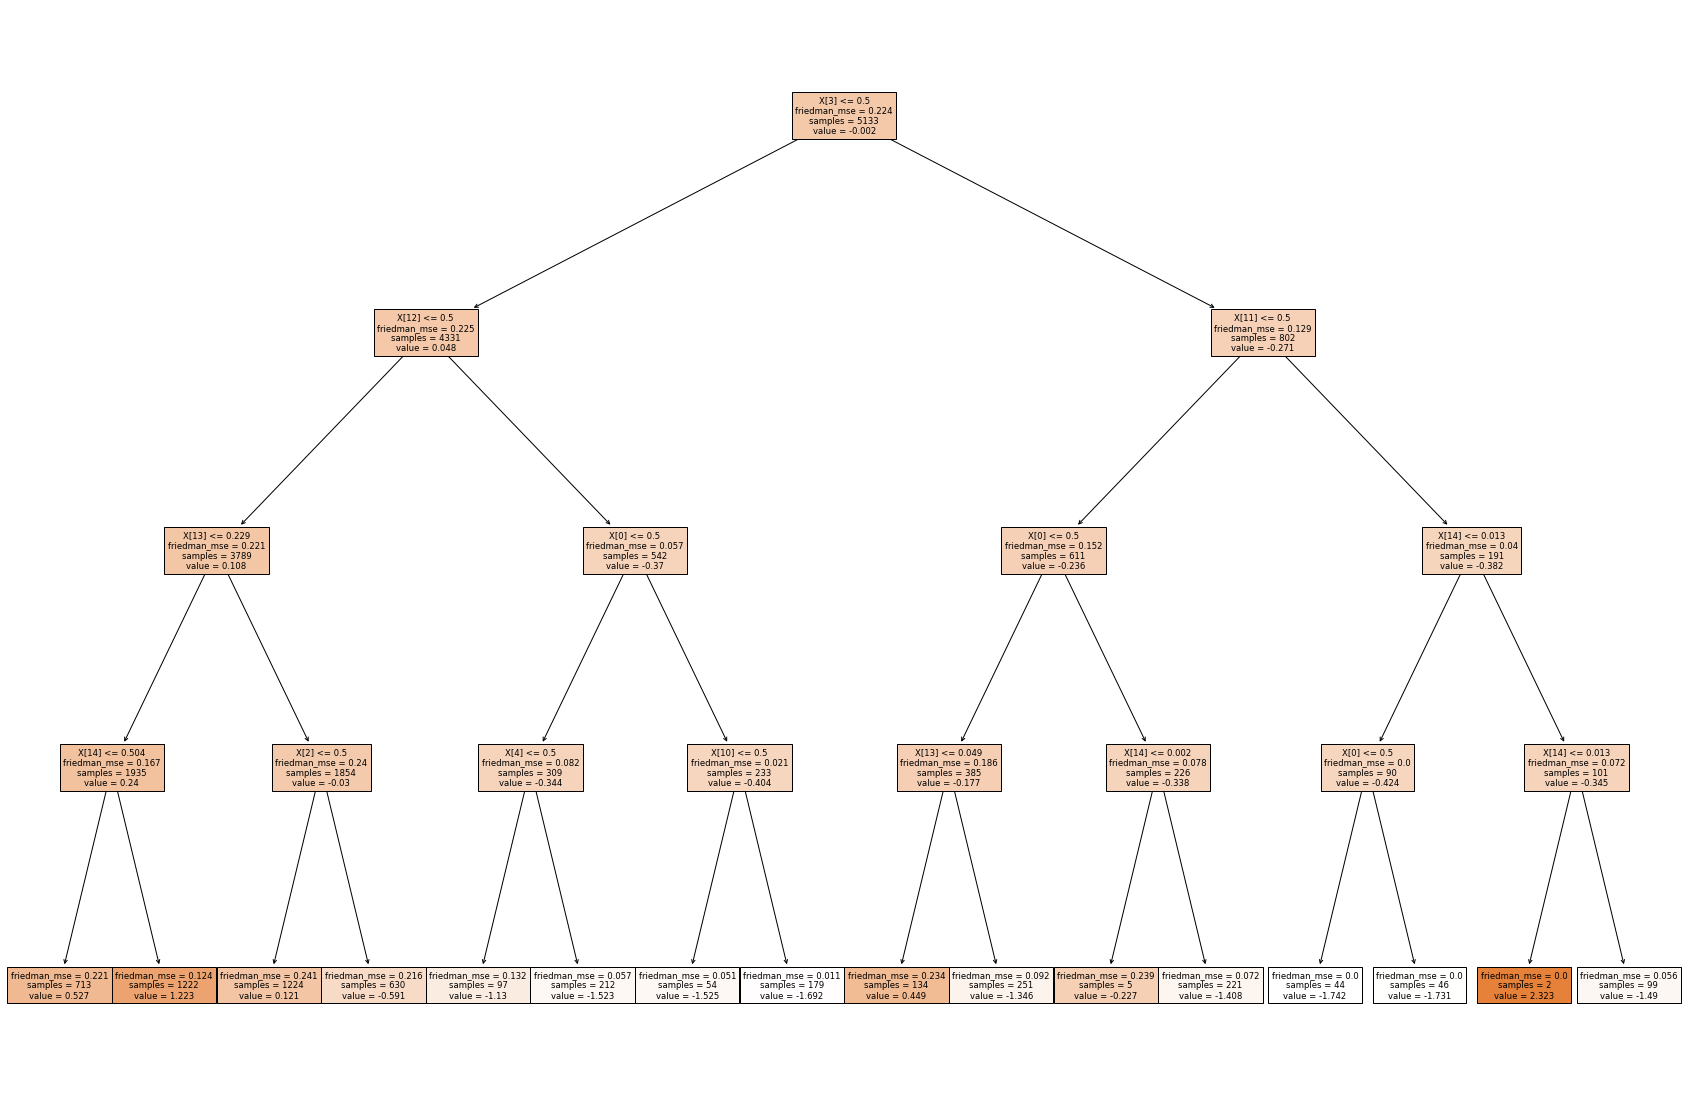

In [88]:
# Plot tree dibawah ini hanya untuk keperluan explorasi saja.

# mendapatkan salah satu estimator
estimator_instance = gb_grid_Search.best_estimator_[2].estimators_[20][0]

# kita plotkan tree salah satu estimator yang beruntung terpilih tadi
plt.figure(figsize = (30,20))
plot_tree(estimator_instance, filled = True, class_names = ["A", "B"])
plt.show()

In [89]:
# model default sebelum hyperparameter tuning
gb_pipe

# mendapatkan model GradientBoost dengan parameter terbaik (gridsearch)
gb_best_model = gb_grid_Search.best_estimator_

# melihat kelas yang ada
gb_best_model.classes_

array([0, 1], dtype=int64)

In [90]:
# training model default 
gb_pipe.fit(X_train, Y_train)

# training gb tuned 
gb_best_model.fit(X_train, Y_train)

# mendapatkan hasil prediksi GradientBoost default
Y_pred_class_gb_default = gb_pipe.predict(X_test)
Y_pred_proba_gb_default = gb_pipe.predict_proba(X_test)

# mendapatkan hasil prediksi GB tuned
Y_pred_class_gb_tuned = gb_best_model.predict(X_test)
Y_pred_proba_gb_tuned = gb_best_model.predict_proba(X_test)

# keluarkan recall untuk GradientBoost Default dan Tuned
print("recall_score GB default : ", recall_score(Y_test, Y_pred_class_gb_default))
print("recall score GB tuned : ",recall_score(Y_test, Y_pred_class_gb_tuned), "\n")

# keluarkan AveragePrecision untuk GradientBoost Default dan Tuned
ap_score_gb_default = average_precision_score(Y_test, Y_pred_proba_gb_default[:,1])
ap_score_gb_tuned = average_precision_score(Y_test, Y_pred_proba_gb_tuned[:,1])

# keluarkan AveragePrecision untuk GradientBoost Default dan Tuned
print("Average Precision GB default : ", ap_score_gb_default)
print("Average Precision GB tuned : ", ap_score_gb_tuned)

recall_score GB default :  0.7829457364341085
recall score GB tuned :  0.8294573643410853 

Average Precision GB default :  0.6547171245059997
Average Precision GB tuned :  0.6412152056200839


<a id="4.6.3"></a>
<font color="lightseagreen" size=+2><b>4.6.3. HYPERPARAMETER TUNING OUTPUT RECAP</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

***MODEL LOGISTIC REGRESSION***<br>
recall_score LogReg default :  0.7829457364341085<br>
recall score LogReg tuned :  0.813953488372093<br>

Average Precision LogReg default :  0.6514887329062968<br>
Average Precision LogReg tuned :  0.6393769386321753<br><br>

***GRADIENTBOOST***<br>
recall_score GB default :  0.7829457364341085<br>
recall score GB tuned :  0.8294573643410853<br>

Average Precision GB default :  0.6547171245059997<br>
Average Precision GB tuned :  0.6412152056200839

---

Berdasarkan output yang telah diberikan diatas, model dengan score terbaik diperoleh oleh *classifier* GradientBoost. Maka untuk tahapan selanjutnya saya akan melanjutkan dengan menggunakan GradientBoost

<a id="4.7"></a>
<font color="lightseagreen" size=+2><b>4.7. FEATURE IMPORTANCE</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

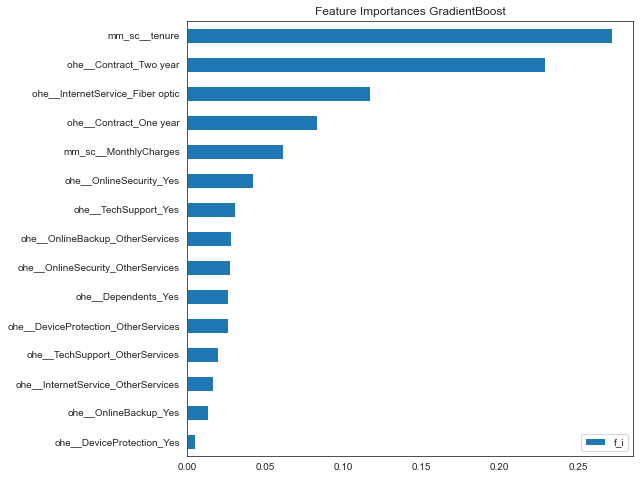

In [91]:
# mendapatkan feature names
feature_names = gb_best_model[1].get_feature_names_out()

# feature importances
f_i_data = gb_best_model[2].feature_importances_

# dibuat dalam bentuk dataframe
df__f_i = pd.DataFrame(data = f_i_data, index = feature_names, columns = ["f_i"]).sort_values(by = ["f_i"], ascending = True)

# kita plotkan hasilnya
sns.set_style("white")
df__f_i.plot(kind = "barh", figsize = (8,8), title = "Feature Importances GradientBoost")
plt.show()

<a id="4.9_featureimportante"></a>
***FEATURE IMPORTANCES | GRADIENT BOOST***
* Dari grafik diatas *feature* yang penting adalah sebagai berikut : 
    - Tenure
    - Contract
    - InternetServices
* Mengapa saya memilih fitur - fitur tersebut ? karena setelah mm_sc__MonthlyCharge, besar koefisiennya tidak terlalu signifikan.
* Dan berdasarkan hasil korelasi, ohe__internet_service_fiber optic berkorelasi kuat dengan mm_sc__MonthlyCharge (kuat korelasi 0.8, bisa lihat [***heatmap ini***](#3.2.3.heatmap)), jadi cukup salah satu saja yang diperhitungkan<br><br>
   
***NOTES***
* Saya akan coba melakukan pemodelan menggunakan 3 *feature* terpenting saja. 
* Hasilnya akan dibandingkan dengan model yang menggunakan seluruh *feature* yang tersedia (kecuali *paperlessbilling* seperti yang sudah distate pada [***bagian ini***](#4.1))

<a id="4.7.1"></a>
<font color="lightseagreen" size=+2><b>4.7.1. BEST MODEL WITH CURRENT FEATURE</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

Pada bagian ini saya memunculkan kembali data awal sebelum kita *feature selection* (ingat tanpa *paperlessbilling* seperti yang telah distate pada [***bagian ini***](#4.1))

In [92]:
# menampilkan dataframe secara keseluruhan untuk X dan Y
display_side_by_side(X.head(5), pd.DataFrame(Y, columns = ["Churn"]).head(5), titles = ["X for features", "Y for target"])

X for features 
 
 
 
 Dependents 
 OnlineSecurity 
 OnlineBackup 
 InternetService 
 DeviceProtection 
 TechSupport 
 Contract 
 tenure 
 MonthlyCharges 
 
 
 
 
 0 
 Yes 
 No 
 No 
 DSL 
 Yes 
 Yes 
 Month-to-month 
 9 
 72.90 
 
 
 1 
 No 
 No 
 Yes 
 Fiber optic 
 Yes 
 No 
 Month-to-month 
 14 
 82.65 
 
 
 2 
 No 
 Yes 
 No 
 DSL 
 Yes 
 Yes 
 Two year 
 64 
 47.85 
 
 
 3 
 No 
 Yes 
 Yes 
 DSL 
 Yes 
 Yes 
 Two year 
 72 
 69.65 
 
 
 4 
 No 
 OtherServices 
 OtherServices 
 OtherServices 
 OtherServices 
 OtherServices 
 Month-to-month 
 3 
 23.60 
 
 
 Y for target 
 
 
 
 Churn 
 
 
 
 
 0 
 1 
 
 
 1 
 0 
 
 
 2 
 1 
 
 
 3 
 0 
 
 
 4 
 0

*Train Test Split* yang telah dilakukan sebelumnya pada [***bagian ini***](#4.2)

In [93]:
# menampilkan hasil train test split
display_side_by_side(X_train.head(5), X_test.head(5), titles = ["X Data Train", "X Data Test"])
display_side_by_side(pd.DataFrame(Y_train, columns = ["Churn"]).head(5), pd.DataFrame(Y_test, columns = ["Churn"]).head(5), titles = ["TargetTrain", "TargetTest"])

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,tenure,MonthlyCharges
246,No,Yes,No,DSL,Yes,Yes,Month-to-month,15,58.95
2331,No,Yes,No,DSL,Yes,Yes,One year,49,84.35
1376,No,No,No,DSL,Yes,No,Month-to-month,45,50.25
1086,No,OtherServices,OtherServices,OtherServices,OtherServices,OtherServices,Two year,6,19.55
461,No,OtherServices,OtherServices,OtherServices,OtherServices,OtherServices,Two year,40,20.60
,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,tenure,MonthlyCharges
353,No,No,Yes,Fiber optic,No,No,One year,69,95.65
269,No,No,No,Fiber optic,Yes,No,Month-to-month,29,98.60
4425,Yes,No,No,DSL,Yes,Yes,One year,18,54.40
3977,Yes,Yes,Yes,DSL,Yes,No,Two year,72,70.65


,Churn
246,0
2331,1
1376,0
1086,0
461,0
,Churn
353,0
269,1
4425,0
3977,0


In [94]:
# kembali buat pipeline dengan best model yang telah di tuning pada tahap sebelumnya.
# parameter oversampling dan transformer tidak ada yang berubah. bisa kita gunakan kembali.
gb_pipe_f = Pipeline([
    ("oversampling", smote_nc),
    ("preprocessing",transformer),
    ("gb_best_model", gb_best_model[2])
    ])

In [95]:
# kita kembali training datanya.
gb_pipe_f.fit(X_train, Y_train)

# kita keluarkan kelas prediksinya
Y_pred_class_final = gb_pipe_f.predict(X_test)

# keluarkan classification reportnya untuk nanti dibandingkan dengan yang telah difeature selection.
print("GB Tuned Final model : GradientBoost Classifier with best parameter")
print("--"*32,"\nGB Tuned Final model - No Feature Selection\n","--"*32, "\n", classification_report(Y_test, Y_pred_class_final))

GB Tuned Final model : GradientBoost Classifier with best parameter
---------------------------------------------------------------- 
GB Tuned Final model - No Feature Selection
 ---------------------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.92      0.71      0.80       713
           1       0.51      0.83      0.63       258

    accuracy                           0.74       971
   macro avg       0.72      0.77      0.72       971
weighted avg       0.81      0.74      0.76       971



<a id="4.7.2"></a>
<font color="lightseagreen" size=+2><b>4.7.2. BEST MODEL WITH SELECTED FEATURE</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

Kita perlu persiapkan data menggunakan *selected feature* berdasarkan *feature importance* nya. Untuk detailnya agar melihat [***bagian ini***](#4.9_featureimportante)

In [96]:
# Menyiapkan data X dan Y. X hanya feature terpilih saja.
# Y sama. tapi kita beri nama variabel yang berbeda saja agar seragam dengan X nya.
X_fs = df[["InternetService", "Contract", "tenure"]]
Y_fs = df["Churn"]

In [97]:
# menampilkan data untuk data yang telah difeature selection
display_side_by_side(X_fs.head(5), pd.DataFrame(Y_fs, columns = ["Churn"]).head(5), titles = ["X_fs for selected features", "Y_fs for target"])

X_fs for selected features 
 
 
 
 InternetService 
 Contract 
 tenure 
 
 
 
 
 0 
 DSL 
 Month-to-month 
 9 
 
 
 1 
 Fiber optic 
 Month-to-month 
 14 
 
 
 2 
 DSL 
 Two year 
 64 
 
 
 3 
 DSL 
 Two year 
 72 
 
 
 4 
 OtherServices 
 Month-to-month 
 3 
 
 
 Y_fs for target 
 
 
 
 Churn 
 
 
 
 
 0 
 1 
 
 
 1 
 0 
 
 
 2 
 1 
 
 
 3 
 0 
 
 
 4 
 0

Kita perlu kembali melakukan splitting data untuk feature terpilih ini. untuk parameter sama, hanya datanya menggunakan *feature* terpilih

In [98]:
# Split data untuk data training dan testing
# parameter trantestsplit adalah sama dengan yang dilakukan pada data dengan full feature
X_fs_train, X_fs_test, Y_fs_train, Y_fs_test = train_test_split(X_fs, Y_fs, test_size = 0.2, stratify = Y, random_state = 8888)

In [99]:
# hanya menampilkan output hasil splitting
display_side_by_side(X_fs_train.head(5), X_fs_test.head(5), titles = ["X_train with selected feature", "X_test with selected feature"])
display_side_by_side(pd.DataFrame(Y_fs_train, columns = ["Churn"]).head(5), pd.DataFrame(Y_fs_test, columns = ["Churn"]).head(5), titles = ["TargetTrain", "TargetTest"])

,InternetService,Contract,tenure
246,DSL,Month-to-month,15
2331,DSL,One year,49
1376,DSL,Month-to-month,45
1086,OtherServices,Two year,6
461,OtherServices,Two year,40
,InternetService,Contract,tenure
353,Fiber optic,One year,69
269,Fiber optic,Month-to-month,29
4425,DSL,One year,18
3977,DSL,Two year,72


,Churn
246,0
2331,1
1376,0
1086,0
461,0
,Churn
353,0
269,1
4425,0
3977,0


In [100]:
# karena feature selection, ada beberapa penyesuaian untuk proses preprocessingnya. akan dijelaskan dibawah ini

# metode resampling : oversampling - SMOTENC
# karena jumlah feature berkurang. perlu didefinisikan ulang.

# untuk parameter categorical_feature, hanya ada yaitu InternetService dan Contract,
# parameter categorical_feature diisikan dengan index kolom kategorical feature tersebut.
smote_nc_fs = SMOTENC(categorical_features = [0, 1], random_state = 8888) 

# transformer perlu kita definsikan ulang karena jumlah feature yang berbeda. kita definisikan kembali dibawah ini. 
transformer_fs = ColumnTransformer([
    ("ohe_fs", OneHotEncoder(drop = "first"), ["InternetService", "Contract"]),
    ("mm_sc_fs", MinMaxScaler(), ["tenure"])]
    , remainder = "passthrough")

# selanjutnya kita bisa mendefinisikan pipeline kembali dengan preprocessing yang sudah mengakomodir feature selection
gb_pipe_f_fs = Pipeline([
    ("oversampling_fs", smote_nc_fs),
    ("preprocessing_fs",transformer_fs),
    ("gb_best_model", gb_best_model[2])
    ])

In [101]:
# kita training pipeline feature selection, ingat pipeline adalah berdasarkan feature selection
# perhatikan juga data yang digunakan adalah yang telah di feature select.
gb_pipe_f_fs.fit(X_fs_train, Y_fs_train)

# kita keluarkan kelas prediksinya
Y_pred_class_final_fs = gb_pipe_f_fs.predict(X_fs_test)

# keluarkan classification reportnya untuk nanti dibandingkan dengan yang telah difeature selection.
print("GB Tuned Final model : GradientBoost Classifier with best parameter")
print("--"*32,"\nGB Tuned Final model - With Feature Selection\n","--"*32, "\n", classification_report(Y_fs_test, Y_pred_class_final_fs))

GB Tuned Final model : GradientBoost Classifier with best parameter
---------------------------------------------------------------- 
GB Tuned Final model - With Feature Selection
 ---------------------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.92      0.70      0.80       713
           1       0.50      0.83      0.63       258

    accuracy                           0.74       971
   macro avg       0.71      0.77      0.71       971
weighted avg       0.81      0.74      0.75       971



<a id="4.7.3"></a>
<font color="lightseagreen" size=+2><b>4.7.3. RECAP FOR FEATURE IMPORTANCE & FEATURE SELECTION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

In [102]:
# print default classification report to validate custom dataframe class.report
print("\n\nDefault classification report to validate dataframe above")
print("--"*32)
print("GB Tuned Final model - No Feature Selection")
print("--"*32)
print(classification_report(Y_test, Y_pred_class_final), "\n\n")

print("--"*32)
print("GB Tuned Final model - With Feature Selection")
print("--"*32)
print(classification_report(Y_fs_test, Y_pred_class_final_fs))



Default classification report to validate dataframe above
----------------------------------------------------------------
GB Tuned Final model - No Feature Selection
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       713
           1       0.51      0.83      0.63       258

    accuracy                           0.74       971
   macro avg       0.72      0.77      0.72       971
weighted avg       0.81      0.74      0.76       971
 


----------------------------------------------------------------
GB Tuned Final model - With Feature Selection
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.70      0.80       713
           1       0.50      0.83      0.63       258

    accuracy                           0.74       971
   macro avg       0.71      0.77      0.7

***INSIGHT FOR FEATURE IMPORTANCE & FEATURE SELECTION***
* *Classifier* yang digunakan adalah GradientBoost yang telah melalui proses seleksi via *Hyperparameter Tuning*
* Model yang menggunakan hanya fitur terpilih saja output score nya sama dengan model yang menggunakan seluruh fitur.
* Berdasarkan penjelasan diatas, untuk *deployment* model, saya hanya akan menggunakan fitur - fitur terpilih saja.
* Fitur - fitur terpilih yang akan digunakan adalah sebagai berikut : 
    * `Tenure`
    * `Contract`
    * `InternetService`

<a id="5"></a>
<font color="lightseagreen" size=+3><b>5. CONCLUSION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>
---
<h2 align = "center"><b><i>CONCLUSION ABOUT OUR DATA</i></b></h2><br>

---

* Sebenarnya dari pemahaman saya *churn* adalah hal yang wajar terjadi JIKA jumlah *churn* nya ada pada rasio tertentu.
* *Churn* diatas mungkin saya asumsikan karena :
    - *customer* berpindah *region* / kawasan yang dimana tidak terjangkau services TELCO
    - *customer* berencana tidak menggunakan layanan dalam jangka waktu tertentu karena alasan tertentu
    - dan lain sebagainya.
* Tapi jika rasio *churn* nya sudah cukup tinggi (ini sebenarnya relatif), berarti saya asumsikan bahwa *customer* tidak puas dengan pelayanan yang diberikan atau tidak sesuai dengan preferensi atau ekspektasi mereka.<br><br>

* Tidak ditemukan missing value pada data, data sudah baik. 
* Dari hasil explorasi data yang kita lakukan, Data kita *imbalance* (73% : 27%). Nanti akan ada *treatment* terhadap data pada bagian pemodelan
* Dari explorasi data yang dilakukan pada [***bagian ini***](#3.2.4), ada pola yang dapat terlihat bahwa *customer* yang *churn* memiliki `karakteristik` sebagai berikut :
    - didominasi pengguna layanan *fiber optik* (terlihat dari julmah *customer churn* baik *customer* baru maupun *customer* lama. hal ini dapat diamati dari *feature tenure*)
    - Untuk pengguna layanan *fiber optic* DSL dan *OtherServices* banyak *churn* di 5 bulan pertama.
    - Kontrak bulanan<br><br>
* Sehingga saya tarik kesimpulan `penyebab churn` adalah sebagai berikut :  
    - *Customer* tidak puas dengan *services* layanan *fiber optic*, ATAU *customer* tau kompetitor yang dapat memberikan pelayanan yang lebih baik.
    - Biaya berlangganan juga relatif tinggi (bila dibandingkan dengan *services* lain yang disediakan TELCO), mungkin ada kompetitor yang memberikan harga yang lebih kompetitif.
    - Pada point `karakteristik` disebutkan point bahwa baik *customer* baru maupun lama banyak yang *churn* dari produk *fiber optik* yang mengindikasikan memang *services* layanan *fiber optic* sepertinya kurang memuaskan dan permasalahan ini sudah terjadi cukup lama. 
    - *Services* pada *customer* baru kurang baik atau ada hal yang tidak sesuai prefrensi *customer* pada 5 bulan pertama, menyebabkan banyak *customer* baru yang  *churn*
    - Hal hal yang telah disebutkan diatas, ditambah dengan mayoritas *customer* menggunakan kontrak bulanan membuat mereka mudah untuk *churn*. *Nothing to lose* dari sisi *customer*.
    - Berbeda dengan *customer* yang sudah kontrak tahunan atau 2 tahunan, jika mereka berhenti ditengah jalan ada kerugian berupa sisa layanan yang belum expired sampai denda karena berhenti berlangganan di waktu yang tidak ditentukan.

---
<h2 align = "center"><b><i>MACHINE LEARNING MODEL</i></b></h2><br>

---
* Berdasarkan penjelasan yang telah diberikan pada bagian [***BusinessUnderstanding - Confussion Matrix***](#1.confussionmatrix) Metric yang menjadi perhatian utama adalah adalah *recall*.
* Maka pemilihan model akan melihat *recall score* yang bisa dihasilkan
* Berdasarkan hasil pemodelan, kandidat model dengan parameter terbaik ada pada *GradientBoost* dan *LogisticRegression*
* Setelah dilakukan proses *Hyperparameter Tuning* dan beberapa pertimbangan yang telah dijelaskan sebelumnya dipilihlah `GradientBoost`
* Berdasarkan *feature importance* yang ada dari *GradientBoost*, fitur *contract, tenure, dan InternetService* merupakan fitur dengan nilai koefisien terbesar.<br><br>
* Pada tahap selanjutnya, saya membandingkan *GradientBoost* yang menggunakan seluruh fitur, dibandingkan dengan *GradientBoost* yang menggunakan fitur terpilih saja (*contract, tenure, InternetServices*). Hasilnya, *GradientBoost* dengan fitur terpilih memberikan *recall score* yang sama dengan *GradientBoost* dengan seluruh fitur (tidak ada perubahan yang signifikan). Dari output tersebut, saya putuskan bahwa feature yang akan digunakan adalah *contract, tenure, InternetServices. 
* *Feature Importance* yang didapat sudah *inline* dengan hasil temuan dari explorasi data yang dilakukan pada bagian [***Data Understanding***](#3). *Contract, tenure, InternetServices* memiliki pengaruh kuat terhadap *customer churn* 

In [103]:
print("--"*32)
print("GB Tuned Final model - With Feature Selection")
print("--"*32)
print(classification_report(Y_fs_test, Y_pred_class_final_fs))

----------------------------------------------------------------
GB Tuned Final model - With Feature Selection
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.70      0.80       713
           1       0.50      0.83      0.63       258

    accuracy                           0.74       971
   macro avg       0.71      0.77      0.71       971
weighted avg       0.81      0.74      0.75       971



---

<h2 align = "center"><b><i>CLASSIFICATION REPORT INTERPRETATION</i></b></h2><br>

---

Berdasarkan hasil classification report dari model kita, kita dapat menyimpulkan/mengambil konklusi bahwa bila seandainya nanti kita menggunakan model kita untuk memfilter/menyaring customer mana yang akan *churn*, maka model kita dapat mengetahui 70% kandidat yang TIDAK akan *churn* dan 83% *customer* yang *churn*

Model kita ini memiliki ketepatan prediksi *customer churn* sebesar 50% (precisionnya), jadi setiap model kita memprediksi bahwa seorang *customer* itu *churn* dengam kemungkinan tebakannya benar itu sebesar 50% kurang lebih. Maka masih akan ada *customer* TIDAK *churn* tetapi diprediksi sebagai *customer churn* sekitar 30% dari keseluruhan *customer* TIDAK *churn* (berdasarkan recall).

Bila seandainya biaya berlangganan TELCO tiap bulannya adalah sebesar \\$29.99, dan andaikan jumlah *customer* yang kita miliki untuk suatu kurun waktu sebanyak 971 orang (dimana andaikan 258 *customer churn* dan 713 *customer* TIDAK *churn*), maka hitungannya kurang lebih akan seperti ini :

Tanpa Model
- Total Lost => 258 x \\$ 29.99 USD = \\$ 7737.42 (karena 258 *customer churn*, dan TELCO tidak melakukan tindakan apapun untuk memberhentikan *customer churn*)

Dengan Model :
- Kita dapat mengetahui 214 *customer* yang AKTUAL nya akan *churn* (258 * 83%, *based on recall*)
- sebanyak 44 *customer churn* salah tebak (258 * (1 - 83%), (1 - *recall score*))
- Disini saya sedikit berasumsi bahwa dengan langkah - langkah yang dilakukan TELCO, TELCO mempertahankan 100 *customer* dari 258 *customer* yang seharusnya *churn*
- Sehingga perbandingan antara *customer churn* dengan yang tidak adalah sebagai berikut : 
    - 158 *customer churn* dari yang awalnya 258
    - 813 *customer* TIDAK *churn* dari yang awalnya 713
- Berdasarkan perhitungan sederhana tersebut, dari yang awalnya TELCO kehilangan sebesar \\$ 7737.42, setelah dilakukan tindakan, kehilangan yang terjadi menjadi sebesar 158 x \\$ 29.99 USD = \\$ 4738.42. Artinya ada *loss reduction* sebesar \\$ 2999. Dan dengan laporan yang komperhensif diatas, TELCO jadi tau tindakan apa yang harus dilakukan untuk mereduksi terjadinya *customer churn*.

<a id="6"></a>
<font color="lightseagreen" size=+3><b>6. RECOMMENDATION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

***RECOMMENDATION FOR TELCO***<br>

---
Hal-hal yang bisa dilakukan TELCO untuk mengembangkan layanannya dari data - data yang ada adalah sebagai berikut: 
- Agar TELCO mencari tahu penyebab mengapa *customer* dengan layanan *fiber optic*, baik *customer* lama dan baru relatif banyak yang *churn*. *customer churn* jangan dibiarkan begitu saja, coba gali informasi dari *customer churn* tersebut dengan mengisi survey kepuasan dan berbagai cara lain agar diketahui kenapa *customer churn*.
- Selain itu juga ada ditemukan pola *customer churn* pada 5 bulan awal pelanggan berlangganan. Hal ini juga sama seperti diatas. Agar ditelusuri kenapa *customer* banyak yang *churn*. 
- *customer churn* diatas, dari data yang ada juga menunjukan bahwa *customer* menggunakan kontrak *bulanan*, berarti *services* yang diberikan TELCO tidak sesuai dengan ekspektasi atau preferensi mereka. faktor - faktor yang telah disebutkan diatas, ditambah dengan *customer* yang cenderung leluasa, menyebabkan *customer churn*. 
- Berdasarkan informasi pada [***web ini***](https://blog.hubspot.com/service/netflix-customer-service-and-churn-rate), *churn rate* NETFLIX ada di angka 2.3% - 2.4%. Saya paham perbandingan ini tidak *apple to apple* dengan TELCO. tapi setidaknya ada usaha yang dapat dilakukan TELCO untuk mereduksi angka *churn* yang ada di angka 26%, mungkin bisa dibuat milestone bertahap ke angka 25%, 20%, 15% dan seterusnya. Karena perbaikan dan *improvement* juga butuh proses dan waktu. 
- Dengan perbaikan dan *improvement* diharapkan dapat memenuhi ekspektasi dan preferensi *customer* dan akhirnya *customer* baik kontrak bulanan dan tahunan pun *churn* nya dapat direduksi.
- Mendorong seluruh *customer* untuk dapat menggunakan *paperless billing* karena memang jauh sangat convinient baik untuk *customer* dan juga TELCO, disini saya asumsikan *paperless billing* adalah billing elektornik yang dikirim via email.
- Diakhir tagihan elektronik disediakanlah survey kepuasan pelanggan untuk dapat memonitor *customer* dengan lebih intense lagi. Lalu reward bagi *customer* yang mengisi layanan tersebut adalah bebas biaya administrasi ataupun diskon dengan nominal tertentu untuk bulan selanjutnya.
- Dengan langkah ini diharapkan permasalahan atau hal hal yang tidak sesuai dengan preferensi dan ekspektasi *customer* bisa lebih cepat muncul dan diatasi sehingga *customer* churn dapat direduksi.<br><br><br>

***RECOMMENDATION FOR MODEL IMPROVEMENT***<br>

---
- Mencoba `learning rate` yang lebih kecil lagi untuk `GradientBoostingClassifier` seperti 0.001, dan 0.0001 (Jason Brownlee - XGBoost with Python Gradient Boosted Trees wwith XGBoost and Scikit - Learn) 
- Mencoba mengaplikasikan `power - transform` pada data numerical agar distribusi data mendekati distribusi normal (diharapkan ada peningkatan performa jika datanya terdistribusi normal)
- Mencoba menggunakan algoritma *machine learning* lain yang belum dicover pada *notebook* ini, dan menerapkan langkah langkah seperti : *hyperparameter tuning* dan *feature select by feature importances / coef*
- Mencoba metode *oversampling* dan *undersampling* lain seperti *RandomOversampling* dan *Nearmiss* dan dibandingkan dengan metode resampling pada notebook ini.
- Menganalisa data data dari model yang masih salah tebak untuk mengetahui alasan dan karakteristiknya seperti apa.

<a id="7"></a>
<font color="lightseagreen" size=+3><b>7. DEPLOYMENT</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

---
<h2 align = "center"><b><i>BEFORE CONTINUING ANY FURTHER</i></b></h2><br>

---

***MACHINE LEARNING MODELING***
* Data yang diberikan hanya data training saya, `data training itu saya split menjadi training + validation set dan test set.`
* Dengan *schema* yang demikian, saya dapat melatih model dan memvalidasi hasilnya.
* Proses *resampling*, *preprocessing* (*Encoding* dan *scaling*) dan model sudah disiapkan dalam bentuk *pipeline*, sehingga proses yang terjadi untuk validasi dan prediksi *end to end* untuk mencegah *data leakage*.
* Dengan menggunakan *pipeline* kita tidak hanya memvalidasi model, tapi keseluruhan prosesnya.
* Setelah memvalidasi model dengan *cross validasi* dan *datatest* dan hasilnya baik, kita akan masuk ke deployment.
* `Ingat, keseluruhan proses validasi sebelumnya menggunakan validation set dan test set dari DATA TRAINING` sehingga data training hanya 80%. <br><br>

***DEPLOYMENT***
* Maka untuk deployment, saya akan mengembalikan bentuk semua data training menjadi *training + validation set*
* Dengan proses ini, model dapat belajar data lebih banyak (dibandingkan jika saya langsung deploy dari tahap *Machine learning Modeling* karena ada data yang tidak digunakan yaitu *test set*)
* Dengan model mempelajari data lebih banyak diharapkan hasil prediksinya juga akan lebih baik.
* Berdasarkan penjelasan tersebut, kita awali dengan persiapan *deployment*<br><br>

---
<h2 align = "center"><b><i>DEPLOYMENT PREPARATION</i></b></h2><br>

---

***DATA PREP***

---

In [104]:
# Menyiapkan data X dan Y. 
# X hanya feature terpilih saja.
X_train_dep = df[["InternetService", "Contract", "tenure"]]
Y_train_dep = df["Churn"]

In [105]:
# pada bagian ini saya hanya memperlihatkan datanya saja
print("Shape Data X = ", X_train_dep.shape)
print("Shape Data Y = ", Y_train_dep.shape)
display_side_by_side(X_train_dep.head(5), pd.DataFrame(Y_train_dep, columns = ["Churn"]).head(5), titles = ["X_train_deployment", "Y_train_deployment"])

Shape Data X =  (4853, 3)
Shape Data Y =  (4853,)


X_train_deployment 
 
 
 
 InternetService 
 Contract 
 tenure 
 
 
 
 
 0 
 DSL 
 Month-to-month 
 9 
 
 
 1 
 Fiber optic 
 Month-to-month 
 14 
 
 
 2 
 DSL 
 Two year 
 64 
 
 
 3 
 DSL 
 Two year 
 72 
 
 
 4 
 OtherServices 
 Month-to-month 
 3 
 
 
 Y_train_deployment 
 
 
 
 Churn 
 
 
 
 
 0 
 1 
 
 
 1 
 0 
 
 
 2 
 1 
 
 
 3 
 0 
 
 
 4 
 0

***PLEASE ADJUST CATEGORICAL VALUE FOR INTERNETSERVICE & CONTRACT LIKE SHOWN BELOW***

In [106]:
print("Unique Value for InternetServices : ", X_train_dep["InternetService"].unique())
print("Unique Value for Contract : ", X_train_dep["InternetService"].unique())

Unique Value for InternetServices :  ['DSL' 'Fiber optic' 'OtherServices']
Unique Value for Contract :  ['DSL' 'Fiber optic' 'OtherServices']


***ML MODEL***<br>


---
* Pada bagian ini, saya akan melakukan *hyperparameter tuning* kembali untuk model *gradientboost* dengan fitur terpilih berdasarkan *feature importance* nya. Saya ingin melihat apakah ada perubahan parameter yang terjadi akibat adanya penambahan data training. (`ingat, pada bagian sebelumnya telah dijelaskan bahwa sebagian data training digunakan sebagai test set`)
* beberapa step dibawah akan dipanggil kembali tahapan *preprocessing*, *resample* dan model yang akan digunakan

In [107]:
# proses resample menggunakan SMOTENC dengan fitur terpilih saja. sudah sesuai dengan data deployment yang dipersiapkan
smote_nc_fs

SMOTENC(categorical_features=[0, 1], random_state=8888)

In [108]:
# transformer dengan fitur terpilih saja. sudah sesuai dengan data deployment yang dipersiapkan
transformer_fs

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_fs', OneHotEncoder(drop='first'),
                                 ['InternetService', 'Contract']),
                                ('mm_sc_fs', MinMaxScaler(), ['tenure'])])

Tahapan resampling dan preprocessed sudah tepat untuk data yang kita gunakan.

In [109]:
# disini saya kembali definisikan modelnya
model_gb_dep = GradientBoostingClassifier(random_state = 8888)

# membuat pipeline
gb_pipe_dep = Pipeline([
    ("oversampling_fs_dep", smote_nc_fs),
    ("preprocessing_fs_dep",transformer_fs),
    ("gb_dep", model_gb_dep)
    ])

# membuat hyperparameter space, ingat parameter default harus ada di paramspace
# parameter ini sama dengan yang telah dilakukan sebelumnya. tapi tidak apa saya state ulang.
gb_param_space_dep = {
    "gb_dep__learning_rate" : [0.01, 0.05, 0.1, 0.2],
    "gb_dep__n_estimators" : [100, 150, 200, 300, 400],  
    "gb_dep__subsample" : [0.8, 0.9, 1],
    "gb_dep__random_state" : [8888],
    "gb_dep__max_depth" : [3, 4, 5],
    "gb_dep__max_features" : [2, 3, 4]
}

# membuat grid search CVnya
gb_grid_Search_dep = GridSearchCV(
                       gb_pipe_dep, 
                       param_grid = gb_param_space_dep,
                       cv = skfold,
                       scoring = "recall",
                       n_jobs = -1)

<IPython.core.display.Javascript object>

In [110]:
# Training Grid Search CV Gradient Boost dengan data deployment, ingat, data telah di feature select.
gb_grid_Search_dep.fit(X_train_dep, Y_train_dep)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('oversampling_fs_dep',
                                        SMOTENC(categorical_features=[0, 1],
                                                random_state=8888)),
                                       ('preprocessing_fs_dep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_fs',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['InternetService',
                                                                          'Contract']),
                                                                        ('mm_sc_fs',
                                                                         MinMaxScaler(),
                        

In [111]:
# best parameter untuk *Gradientboost* dengan data deployment
best_param_dep_data = pd.DataFrame(gb_grid_Search_dep.best_params_, index = [0]).T
best_param_dep_data.rename({0 : "params_value"}, axis = 1, inplace = True)

# best score untuk *GradientBoost* awal dengan 0.8 data train
print("best score GB - 0.8 data train - all features : ", gb_grid_Search.best_score_)

# best score untuk *GradientBoost* awal dengan 1 data train (data deployment)
print("best score GB - data deployment - featureselect: ", gb_grid_Search_dep.best_score_)

# kita bandingkan best parameter untuk *Gradientboost* pada saat hyperparameter tuning di awal tadi dengan data deployment 
display_side_by_side(gb_best_param_0_8_train, best_param_dep_data, titles = ["bestparam - all features - 0.8datatrain", "bestparam - selected features - data deployment"])

best score GB - 0.8 data train - all features :  0.8233009708737864
best score GB - data deployment - featureselect:  0.832328003875969


,parameter_value
gb__learning_rate,0.01
gb__max_depth,4.00
gb__max_features,3.00
gb__n_estimators,100.00
gb__random_state,8888.00
gb__subsample,0.90
,params_value
gb_dep__learning_rate,0.01
gb_dep__max_depth,3.00
gb_dep__max_features,3.00


***NOTES***<br>
* Dari hasil diatas, ternyata ada sedikit perbedaan pada *score* dan parameter `max_depth dan subsample` :
    * Dari score, ada peningkatan sebesar 0.9% (diungguli model dengan data deployment)
    * Dari parameter `max_depth` ada penurunan 1 tingkat (yang berarti model dengan data deployment tidak sekompleks model dengan 0.8 data training)
    * Dari parameter `subsample` ada perubahan koefisien menjadi 0.8

* Untuk deployment saya akan menggunakan model baru dengan parameter terbaik sebagai berikut : 
    * gb_dep__learning_rate	: 0.01
    * gb_dep__max_depth	: 3.00
    * gb_dep__max_features : 3.00
    * gb_dep__n_estimators	: 100.00
    * gb_dep__random_state	: 8888.00
    * gb_dep__subsample	: 1.00<br><br>
    
* untuk *hyperparameter* yang menggunakan 80% data train dengan model terpilih, sudah menangkap pola data yang ada (dilihat dari hasil *cv score* dan *hyperparameter* yang tidak berbeda jauh antara model dengan 80% data train dengan 100% data train (data *deployment*))
* Dengan menggunakan data *deployement*, model dapat belajar 20% lebih banyak dibandingkan dengan tahapan sebelumnya. Diharapkan hasil prediksi dengan data test yang sebenarnya juga akan semakin baik.

---
<h2 align = "center"><b><i>DEPLOYMENT</i></b></h2><br>

---

***SAVE MODEL***

---

In [112]:
gb_grid_Search_dep.best_params_

{'gb_dep__learning_rate': 0.01,
 'gb_dep__max_depth': 3,
 'gb_dep__max_features': 3,
 'gb_dep__n_estimators': 100,
 'gb_dep__random_state': 8888,
 'gb_dep__subsample': 0.8}

In [113]:
# siapkan bestestimatornya
# beberapa best parameter tidak terlihat, bisa melihat cell code diatasnya.
gb_grid_Search_dep.best_estimator_

Pipeline(steps=[('oversampling_fs_dep',
                 SMOTENC(categorical_features=[0, 1], random_state=8888)),
                ('preprocessing_fs_dep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_fs',
                                                  OneHotEncoder(drop='first'),
                                                  ['InternetService',
                                                   'Contract']),
                                                 ('mm_sc_fs', MinMaxScaler(),
                                                  ['tenure'])])),
                ('gb_dep',
                 GradientBoostingClassifier(learning_rate=0.01, max_features=3,
                                            random_state=8888,
                                            subsample=0.8))])

In [114]:
# penamaan file pickle
filename = "alfian_JCDSVL_5_13_pickleD.sav"

# export .sav sebagai file
pickle.dump(gb_grid_Search_dep.best_estimator_, open(filename, "wb"))

***LOAD MODEL***

---

In [115]:
# nama file pickle
filename = "alfian_JCDSVL_5_13_pickleD.sav"

# perintah untuk load model
loaded_model = pickle.load(open(filename, "rb"))

***DATA INPUT PREPARATION***
* Input format
* Adjust categorical value with the given example 

---

In [116]:
# Input format
print("Shape Data X = ", X_train_dep.shape)
print("Shape Data Y = ", Y_train_dep.shape)
display_side_by_side(X_train_dep.head(5), pd.DataFrame(Y_train_dep, columns = ["Churn"]).head(5), titles = ["X_train_deployment", "Y_train_deployment"])

Shape Data X =  (4853, 3)
Shape Data Y =  (4853,)


X_train_deployment 
 
 
 
 InternetService 
 Contract 
 tenure 
 
 
 
 
 0 
 DSL 
 Month-to-month 
 9 
 
 
 1 
 Fiber optic 
 Month-to-month 
 14 
 
 
 2 
 DSL 
 Two year 
 64 
 
 
 3 
 DSL 
 Two year 
 72 
 
 
 4 
 OtherServices 
 Month-to-month 
 3 
 
 
 Y_train_deployment 
 
 
 
 Churn 
 
 
 
 
 0 
 1 
 
 
 1 
 0 
 
 
 2 
 1 
 
 
 3 
 0 
 
 
 4 
 0

In [117]:
# Adjust categorical value with the given example
print("Data Deployment Features")
print("--"*32)
print("Unique Value for InternetServices : ", X_train_dep["InternetService"].unique(), "\n")
print("Unique Value for Contract : ", X_train_dep["Contract"].unique(),"\n")
print("min value for tenure : %.d", X_train_dep["tenure"].min())
print("max value for tenure : %.d", X_train_dep["tenure"].max(), "\n\n")
print("Data Deployment Target")
print("--"*32)
print("target 1 : churn customer")
print("target 0 : not churn customer")

Data Deployment Features
----------------------------------------------------------------
Unique Value for InternetServices :  ['DSL' 'Fiber optic' 'OtherServices'] 

Unique Value for Contract :  ['Month-to-month' 'Two year' 'One year'] 

min value for tenure : %.d 0
max value for tenure : %.d 72 


Data Deployment Target
----------------------------------------------------------------
target 1 : churn customer
target 0 : not churn customer


***PREDICT MODEL***

---
>***NOTES***
>* I'm focusing on *recall score* in this case
>* I'm focusing *recall score* on class 1 (*churned customer*)
>* Please adjust categorical value for InternetService & Contract as explained above
>* Below I try to do prediction with 1 dummy data & sample data test containing 822 rows of data.

>***FIRST PREDICTION USING 1 DUMMY DATA***
>* I create 1 dummy data to see sample prediction using model that had been saved in pickle (.sav)

In [118]:
# create 1 dummy data to predict
df_1_test = pd.DataFrame({
    "InternetService" : ["Fiber optic"],
    "Contract" : ["Month-to-month"],
    "tenure" : [5]})

# print sample data
display_side_by_side(df_1_test, titles = ["Dummy Customer Data"])

# predict that data
print("predict proba :",loaded_model.predict_proba(df_1_test))
print("predict class :",loaded_model.predict(df_1_test))

,InternetService,Contract,tenure
0,Fiber optic,Month-to-month,5


predict proba : [[0.30942726 0.69057274]]
predict class : [1]


Dari output diatas, dapat diambil kesimpulan bahwa customer dengan kriteria sebagai berikut : 
- Berlangganan layanan fiber optic,
- Menggunakan kontrak bulanan (Month - to - month)
- Baru berlangganan 5 bulan

Memiliki probabilitas *churn* sebesar 69.027%.

>***SECOND PREDICTION USING MY SAMPLE TEST DATA***
>* Predict of 822 rows of data test

In [119]:
# import datatest
df_test = pd.read_csv("Sample_test_TELCO_Churn.csv", usecols = ["InternetService", "Contract", "tenure", "Churn"])

# pada bagian ini saya hanya memperlihatkan datanya saja
display_side_by_side(df_test.head(5), titles = ["Sample Data Test X, Y"])

,InternetService,Contract,tenure,Churn
0,DSL,Month-to-month,9,1
1,Fiber optic,Month-to-month,14,0
2,DSL,Two year,64,1
3,DSL,Two year,72,0
4,OtherServices,Month-to-month,3,0


In [120]:
# split into X & Y
sample_X_test = df_test[["InternetService", "Contract", "tenure"]]
sample_Y_test = df_test["Churn"]

# pada bagian ini saya hanya memperlihatkan datanya saja
print("Shape Sample Test X = ", sample_X_test.shape)
print("Shape Sample Test Y = ", sample_Y_test.shape)
display_side_by_side(sample_X_test.head(5), pd.DataFrame(sample_Y_test, columns = ["Churn"]).head(5), titles = ["sample_X_test", "sample_Y_test"])

Shape Sample Test X =  (822, 3)
Shape Sample Test Y =  (822,)


sample_X_test 
 
 
 
 InternetService 
 Contract 
 tenure 
 
 
 
 
 0 
 DSL 
 Month-to-month 
 9 
 
 
 1 
 Fiber optic 
 Month-to-month 
 14 
 
 
 2 
 DSL 
 Two year 
 64 
 
 
 3 
 DSL 
 Two year 
 72 
 
 
 4 
 OtherServices 
 Month-to-month 
 3 
 
 
 sample_Y_test 
 
 
 
 Churn 
 
 
 
 
 0 
 1 
 
 
 1 
 0 
 
 
 2 
 1 
 
 
 3 
 0 
 
 
 4 
 0

In [121]:
# make sure the value in the datatest
print("Data Test Features")
print("--"*32)
print("Unique Value for InternetServices : ", sample_X_test["InternetService"].unique(), "\n")
print("Unique Value for Contract : ", sample_X_test["Contract"].unique(),"\n")
print("min value for tenure : %.d", sample_X_test["tenure"].min())
print("max value for tenure : %.d", sample_X_test["tenure"].max(), "\n\n")
print("Data Test Target")
print("--"*32)
print("target 1 : churn customer")
print("target 0 : not churn customer")

Data Test Features
----------------------------------------------------------------
Unique Value for InternetServices :  ['DSL' 'Fiber optic' 'OtherServices'] 

Unique Value for Contract :  ['Month-to-month' 'Two year' 'One year'] 

min value for tenure : %.d 0
max value for tenure : %.d 72 


Data Test Target
----------------------------------------------------------------
target 1 : churn customer
target 0 : not churn customer


In [122]:
# first predict proba
Y_predict_class = loaded_model.predict(sample_X_test)

print("\n",classification_report(sample_Y_test, Y_predict_class))


               precision    recall  f1-score   support

           0       0.74      0.82      0.77       563
           1       0.47      0.36      0.41       259

    accuracy                           0.67       822
   macro avg       0.61      0.59      0.59       822
weighted avg       0.65      0.67      0.66       822

